In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd ..

/


In [0]:
cd content/gdrive/'My Drive'

/content/gdrive/My Drive


In [0]:
cd train_data

/content/gdrive/My Drive/train_data


In [0]:
# Python 2.7
# By: Amin Mansouri

# Import libraries
import glob

import imageio as imageio
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split

tf.reset_default_graph()


def png2np(im_path):
    images = []
    for im_path in glob.glob(im_path):
        img = imageio.imread(im_path)
        # img = np.reshape(im_filtered, newshape=784)
        images.append(img)
    images = np.array(images)
    return images


Char2idx = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12,
            'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24,
            'Z': 25}

idx2char = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M',
            13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y',
            25: 'Z'}


In [0]:
# noinspection PyShadowingNames
def create_train_matrix(part_index):
    global n_classes

    Address = "./Data_Part0" + str(part_index)
    images = png2np(Address + "/" + idx2char[0] + "*.png")
    labels = np.full((len(images), 1), 0, dtype=int)
    one_hot_labels = np.zeros((len(labels), n_classes))
    one_hot_labels[np.arange(len(labels)), labels] = 1

    for i in range(1, 26):
        Address = "./Data_Part0" + str(part_index)
        temp = png2np(Address + "/" + idx2char[i] + "*.png")
        label_temp = np.full((len(temp), 1), i, dtype=int)
        one_hot_label = np.zeros((len(label_temp), n_classes))
        one_hot_label[np.arange(len(label_temp)), label_temp] = 1
        images = np.append(images, temp, axis=0)
        one_hot_labels = np.append(one_hot_labels, one_hot_label, axis=0)

    return {'data': images, 'labels': one_hot_labels}


# image data input (img shape: 28*28)
n_input = 32

n_classes = 26
std = 0.01
epsilon = 1e-4

training_iterations = 10
learning_rate = 0.001
batch_size = 64
keep_prob_input = 0.8

kernel_size = 3

weights = {
    'weight_conv_layer_1': tf.get_variable('W0', shape=(kernel_size, kernel_size, 1, 64),
                                           initializer=tf.initializers.random_normal(stddev=std)
                                           ),
#     'weight_conv_layer_2': tf.get_variable('W1', shape=(kernel_size, kernel_size, 64, 64),
#                                            initializer=tf.initializers.random_normal(stddev=std)),
    'weight_conv_layer_3': tf.get_variable('W2', shape=(kernel_size, kernel_size, 64, 128),
                                           initializer=tf.initializers.random_normal(stddev=std)),
#     'weight_conv_layer_4': tf.get_variable('W3', shape=(kernel_size, kernel_size, 128, 128),
#                                            initializer=tf.initializers.random_normal(stddev=std)),
    'weight_conv_layer_5': tf.get_variable('W4', shape=(kernel_size, kernel_size, 128, 256),
                                           initializer=tf.initializers.random_normal(stddev=std)),
    'weight_conv_layer_6': tf.get_variable('W5', shape=(kernel_size, kernel_size, 256, 256),
                                           initializer=tf.initializers.random_normal(stddev=std)),

    'w_fc': tf.get_variable('W_fc', shape=(8 * 8 * 256, 2048), initializer=tf.initializers.random_normal(stddev=std)),

    'w_fc2': tf.get_variable('W_fc2', shape=(2048, 512), initializer=tf.initializers.random_normal(stddev=std)),
    'w_fc3': tf.get_variable('W_fc3', shape=(512, 256), initializer=tf.initializers.random_normal(stddev=std)),
#     'w_fc4': tf.get_variable('W_fc4', shape=(1024, 512), initializer=tf.initializers.random_normal(stddev=std)),
#     'w_fc5': tf.get_variable('W_fc5', shape=(512, 256), initializer=tf.initializers.random_normal(stddev=std)),
    'out': tf.get_variable('W_out', shape=(256, n_classes), initializer=tf.initializers.random_normal(stddev=std)),
}
biases = {
    'bias_conv_layer_1': tf.get_variable('B0', shape=64, initializer=tf.initializers.random_normal(stddev=std)),
#     'bias_conv_layer_2': tf.get_variable('B1', shape=64, initializer=tf.initializers.random_normal(stddev=std)),
    'bias_conv_layer_3': tf.get_variable('B2', shape=128, initializer=tf.initializers.random_normal(stddev=std)),
#     'bias_conv_layer_4': tf.get_variable('B3', shape=128, initializer=tf.initializers.random_normal(stddev=std)),
    'bias_conv_layer_5': tf.get_variable('B4', shape=256, initializer=tf.initializers.random_normal(stddev=std)),
    'bias_conv_layer_6': tf.get_variable('B5', shape=256, initializer=tf.initializers.random_normal(stddev=std)),
    # 'bias_conv_layer_3': tf.get_variable('B2', shape=128, initializer=tf.contrib.layers.xavier_initializer()),
    'b_fc': tf.get_variable('B_fc', shape=2048, initializer=tf.initializers.random_normal(stddev=std)),
    'b_fc2': tf.get_variable('B_fc2', shape=512, initializer=tf.initializers.random_normal(stddev=std)),
    'b_fc3': tf.get_variable('B_fc3', shape=256, initializer=tf.initializers.random_normal(stddev=std)),
#     'b_fc4': tf.get_variable('B_fc4', shape=512, initializer=tf.initializers.random_normal(stddev=std)),
#     'b_fc5': tf.get_variable('B_fc5', shape=256, initializer=tf.initializers.random_normal(stddev=std)),
    'out': tf.get_variable('B_out', shape=n_classes, initializer=tf.initializers.random_normal(stddev=std)),
}


In [0]:
import pickle
pickle_in = open("train_data.pickle", "rb")
train_data = pickle.load(pickle_in)

In [0]:
len(train_data['data'])

208000

In [0]:
# noinspection PyShadowingNames
def next_batch(num, data, labels):
    """Return a total of `num` random samples and labels."""
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)


# noinspection PyShadowingNames
def conv2d(x, w, b, strides=1):
    # Conv2D wrapper, with bias and ReLU activation
    x = tf.nn.conv2d(x, w, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


# noinspection PyShadowingNames
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')


In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(train_data['data'], train_data['labels'], test_size=0.1)

In [0]:
# both placeholders are of type float
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

keep_prob = tf.placeholder("float")

batch_mean_0, batch_var_0 = tf.nn.moments(x, [0])
beta_0 = tf.Variable(tf.zeros(x.get_shape().as_list()[1:]))
scale_0 = tf.Variable(tf.zeros(x.get_shape().as_list()[1:]))
x_in = tf.nn.batch_normalization(x, batch_mean_0, batch_var_0, offset=beta_0, scale=scale_0,
                                          variance_epsilon=epsilon)

# Dropout
x_input = tf.nn.dropout(x_in, keep_prob=keep_prob_input)

# here we call the conv2d function we had defined above and pass the input image x, weights weight_conv_layer_1
# and bias bias_conv_layer_1.
conv1 = conv2d(x_input, weights['weight_conv_layer_1'], biases['bias_conv_layer_1'], strides=1)
# Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
conv1_maxpool = maxpool2d(conv1, k=2)

batch_mean_1, batch_var_1 = tf.nn.moments(conv1_maxpool, [0])
beta_1 = tf.Variable(tf.zeros(conv1_maxpool.get_shape().as_list()[1:]))
scale_1 = tf.Variable(tf.zeros(conv1_maxpool.get_shape().as_list()[1:]))
conv1_maxpool = tf.nn.batch_normalization(conv1_maxpool, batch_mean_1, batch_var_1, offset=beta_1, scale=scale_1,
                                          variance_epsilon=epsilon)

# conv1_maxpool = tf.contrib.layers.batch_norm(conv1_maxpool, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn1')

# Dropout
conv1_maxpool = tf.nn.dropout(conv1_maxpool, keep_prob=keep_prob)

# conv2 = conv2d(conv1_maxpool, weights['weight_conv_layer_2'], biases['bias_conv_layer_2'], strides=2)
# conv2_maxpool = maxpool2d(conv2, k=1)
# batch_mean_2, batch_var_2 = tf.nn.moments(conv2_maxpool, [0])
# beta_2 = tf.Variable(tf.zeros(conv2_maxpool.get_shape().as_list()[1:]))
# scale_2 = tf.Variable(tf.zeros(conv2_maxpool.get_shape().as_list()[1:]))
# conv2_maxpool = tf.nn.batch_normalization(conv2_maxpool, batch_mean_2, batch_var_2, offset=beta_2, scale=scale_2,
#                                           variance_epsilon=epsilon)

# conv2_maxpool = tf.contrib.layers.batch_norm(conv2_maxpool, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn2')

# Dropout
# conv2_maxpool = tf.nn.dropout(conv2_maxpool, keep_prob=keep_prob)

conv3_ = conv2d(conv1_maxpool, weights['weight_conv_layer_3'], biases['bias_conv_layer_3'], strides=1)
conv3 = maxpool2d(conv3_, k=2)

batch_mean_3, batch_var_3 = tf.nn.moments(conv3, [0])
beta_3 = tf.Variable(tf.zeros(conv3.get_shape().as_list()[1:]))
scale_3 = tf.Variable(tf.zeros(conv3.get_shape().as_list()[1:]))
conv3 = tf.nn.batch_normalization(conv3, batch_mean_3, batch_var_3, offset=beta_3, scale=scale_3,
                                  variance_epsilon=epsilon)




# conv3 = tf.contrib.layers.batch_norm(conv3, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn3')

# Dropout
conv3 = tf.nn.dropout(conv3, keep_prob=keep_prob)

# conv4 = conv2d(conv3, weights['weight_conv_layer_4'], biases['bias_conv_layer_4'], strides=1)
# batch_mean_4, batch_var_4 = tf.nn.moments(conv4, [0])
# beta_4 = tf.Variable(tf.zeros(conv4.get_shape().as_list()[1:]))
# scale_4 = tf.Variable(tf.zeros(conv4.get_shape().as_list()[1:]))
# conv4 = tf.nn.batch_normalization(conv4, batch_mean_4, batch_var_4, offset=beta_4, scale=scale_4,
#                                   variance_epsilon=epsilon)


# conv4 = tf.contrib.layers.batch_norm(conv4, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn4')

# Dropout
# conv4 = tf.nn.dropout(conv4, keep_prob=keep_prob)

conv5 = conv2d(conv3, weights['weight_conv_layer_5'], biases['bias_conv_layer_5'], strides=1)
batch_mean_5, batch_var_5 = tf.nn.moments(conv5, [0])
beta_5 = tf.Variable(tf.zeros(conv5.get_shape().as_list()[1:]))
scale_5 = tf.Variable(tf.zeros(conv5.get_shape().as_list()[1:]))
conv5 = tf.nn.batch_normalization(conv5, batch_mean_5, batch_var_5, offset=beta_5, scale=scale_5,
                                  variance_epsilon=epsilon)

# conv5 = tf.contrib.layers.batch_norm(conv5, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn5')

# Dropout
conv5 = tf.nn.dropout(conv5, keep_prob=keep_prob)

conv6 = conv2d(conv5, weights['weight_conv_layer_6'], biases['bias_conv_layer_6'], strides=1)
batch_mean_6, batch_var_6 = tf.nn.moments(conv5, [0])
beta_6 = tf.Variable(tf.zeros(conv6.get_shape().as_list()[1:]))
scale_6 = tf.Variable(tf.zeros(conv6.get_shape().as_list()[1:]))
conv6 = tf.nn.batch_normalization(conv6, batch_mean_6, batch_var_6, offset=beta_6, scale=scale_6,
                                  variance_epsilon=epsilon)

# conv6 = tf.contrib.layers.batch_norm(conv6, center=True, scale=True, epsilon=epsilon, 
#                                           is_training=phase,
#                                           scope='bn6')

# Dropout
# conv6 = tf.nn.dropout(conv6, keep_prob=keep_prob)

# Fully connected layer
# Reshape conv6 output to fit fully connected layer input
fc1 = tf.reshape(conv6, [-1, weights['w_fc'].get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1, weights['w_fc']), biases['b_fc'])
fc1 = tf.nn.relu(fc1)

fc2 = tf.reshape(fc1, [-1, weights['w_fc2'].get_shape().as_list()[0]])
fc2 = tf.add(tf.matmul(fc2, weights['w_fc2']), biases['b_fc2'])
fc2 = tf.nn.relu(fc2)

fc3 = tf.reshape(fc2, [-1, weights['w_fc3'].get_shape().as_list()[0]])
fc3 = tf.add(tf.matmul(fc3, weights['w_fc3']), biases['b_fc3'])
fc3 = tf.nn.relu(fc3)

# fc4 = tf.reshape(fc3, [-1, weights['w_fc4'].get_shape().as_list()[0]])
# fc4 = tf.add(tf.matmul(fc4, weights['w_fc4']), biases['b_fc4'])
# fc4 = tf.nn.relu(fc4)

# fc5 = tf.reshape(fc4, [-1, weights['w_fc5'].get_shape().as_list()[0]])
# fc5 = tf.add(tf.matmul(fc4, weights['w_fc5']), biases['b_fc5'])
# fc5 = tf.nn.relu(fc5)

# Output, class prediction
# finally we multiply the fully connected layer with the weights and add a bias term.
out = tf.add(tf.matmul(fc3, weights['out']), biases['out'])


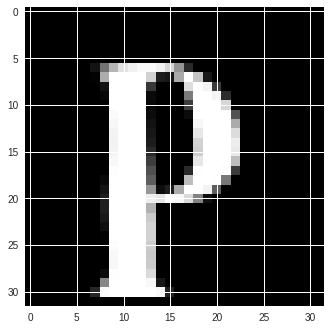

In [0]:
curr_img = np.reshape(x_train[1], (32, 32))
curr_lbl = np.argmax(y_train[1, :])
plt.imshow(curr_img)
plt.show()

In [0]:
# Reshape training and testing image
train_X = (x_train.reshape(-1, 32, 32, 1))
test_X = (x_validation.reshape(-1, 32, 32, 1))

# train_X = (train_X - np.mean(train_X))/(np.std(train_X))
# test_X = (test_X - np.mean(train_X))/(np.std(train_X))

print([train_X.shape, test_X.shape])

train_y = y_train
test_y = y_validation

print(train_y.shape, test_y.shape)

prediction = out

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image.
#  and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

confusion_matrix = tf.confusion_matrix(tf.argmax(prediction, 1), tf.argmax(y, 1), num_classes=n_classes)
# calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# summary settings:

train_loss_summary = tf.summary.scalar('loss_train', cost)
train_accuracy_summary = tf.summary.scalar('train_accuracy', accuracy)
train_summaries = tf.summary.merge([train_loss_summary, train_accuracy_summary])
# file_writer = tf.summary.FileWriter('./Output', sess.graph)

validation_loss_summary = tf.summary.scalar('loss_validation', cost)
validation_accuracy_summary = tf.summary.scalar('validation_accuracy', accuracy)
validation_summaries = tf.summary.merge([validation_loss_summary, validation_accuracy_summary])
# validation_file_writer = tf.summary.FileWriter(output_folder)

# Initializing the variables
init = tf.global_variables_initializer()

# Batch Mode Learning

counter = 0
disp_counter = 20

mis_classified_idx = []

saver = tf.train.Saver()

[(187200, 32, 32, 1), (20800, 32, 32, 1)]
(187200, 26) (20800, 26)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# session = tf.Session(config=config, ...)

with tf.Session(config=config) as sess:
    sess.run(init)

#     saver.restore(sess=sess, save_path='./tmp/model.ckpt')

    merge = tf.summary.merge_all()
    summary_writer_train = tf.summary.FileWriter('./Classifier_train_Complete2', sess.graph)
    summary_writer_validation = tf.summary.FileWriter('./Classifier_validation_Complete2', sess.graph)

    # ########################################## Training ########################################## #

    for i in range(training_iterations):
      
      # for batch in tqdm(range(len(train_X) // batch_size // training_iterations)):
      #
      #     counter += 1
      #     batch_x = train_X[(batch + i * len(train_X) // batch_size // training_iterations) *
      #                       batch_size:min((batch + 1 + i * len(train_X) // batch_size // training_iterations) *
      #                                      batch_size, len(train_X))]
      #     batch_y = train_y[(batch + i * len(train_X) // batch_size // training_iterations) *
      #                       batch_size:min((batch + 1 + i * len(train_X) // batch_size // training_iterations) *
      #                                      batch_size, len(train_y))]

      for batch in tqdm(range(len(train_X) // batch_size)):

          counter += 1
          batch_x, batch_y = next_batch(batch_size, train_X, train_y)
#           print(batch_x.shape, batch_y.shape)
          # Run optimization op (backprop).
          # Calculate batch loss and accuracy
          opt = sess.run(optimizer, feed_dict={x: batch_x,
                                               y: batch_y, keep_prob: 0.8})

          if counter % disp_counter == 0:
              loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                                y: batch_y, keep_prob: 0.8})

              print("Iter " + str(i) + ", Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(
                  acc)
                    )
              print("Optimization Finished!")
      if i % 4 == 0:
        save_path = saver.save(sess, './tmp2/model.ckpt')
      
      x_batch, y_batch = next_batch(batch_size, train_X, train_y)
      summary_writer_train.add_summary(
          (sess.run(train_summaries, feed_dict={x: x_batch, y: y_batch, keep_prob: 0.8})), i)

      x_batch, y_batch = next_batch(batch_size, test_X, y_validation)
      summary_writer_validation.add_summary(
          sess.run(validation_summaries, feed_dict={x: x_batch, y: y_batch, keep_prob: 1.0}), i)
        
    
        
    summary_writer_train.close()
    summary_writer_validation.close()
    
    
    
    sess.close()

  1%|          | 23/2925 [00:02<04:25, 10.91it/s]

Iter 0, Loss= 3.255125, Training Accuracy= 0.04688
Optimization Finished!


  1%|▏         | 43/2925 [00:03<02:38, 18.21it/s]

Iter 0, Loss= 3.256720, Training Accuracy= 0.01562
Optimization Finished!


  2%|▏         | 63/2925 [00:04<02:33, 18.60it/s]

Iter 0, Loss= 3.257300, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 83/2925 [00:06<02:33, 18.56it/s]

Iter 0, Loss= 3.254415, Training Accuracy= 0.03125
Optimization Finished!


  4%|▎         | 103/2925 [00:07<02:32, 18.51it/s]

Iter 0, Loss= 3.263073, Training Accuracy= 0.03125
Optimization Finished!


  4%|▍         | 123/2925 [00:08<02:31, 18.47it/s]

Iter 0, Loss= 3.254922, Training Accuracy= 0.00000
Optimization Finished!


  5%|▍         | 143/2925 [00:09<02:29, 18.61it/s]

Iter 0, Loss= 3.258041, Training Accuracy= 0.01562
Optimization Finished!


  6%|▌         | 163/2925 [00:10<02:28, 18.59it/s]

Iter 0, Loss= 3.256845, Training Accuracy= 0.01562
Optimization Finished!


  6%|▋         | 183/2925 [00:11<02:28, 18.45it/s]

Iter 0, Loss= 3.255832, Training Accuracy= 0.06250
Optimization Finished!


  7%|▋         | 203/2925 [00:12<02:27, 18.47it/s]

Iter 0, Loss= 3.258799, Training Accuracy= 0.04688
Optimization Finished!


  8%|▊         | 223/2925 [00:13<02:28, 18.18it/s]

Iter 0, Loss= 3.259185, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 243/2925 [00:14<02:28, 18.00it/s]

Iter 0, Loss= 3.259163, Training Accuracy= 0.01562
Optimization Finished!


  9%|▉         | 263/2925 [00:15<02:28, 17.87it/s]

Iter 0, Loss= 3.253518, Training Accuracy= 0.04688
Optimization Finished!


 10%|▉         | 283/2925 [00:16<02:25, 18.11it/s]

Iter 0, Loss= 3.257246, Training Accuracy= 0.07812
Optimization Finished!


 10%|█         | 303/2925 [00:17<02:24, 18.14it/s]

Iter 0, Loss= 3.262630, Training Accuracy= 0.00000
Optimization Finished!


 11%|█         | 323/2925 [00:18<02:23, 18.16it/s]

Iter 0, Loss= 3.260384, Training Accuracy= 0.03125
Optimization Finished!


 12%|█▏        | 343/2925 [00:19<02:19, 18.58it/s]

Iter 0, Loss= 3.261393, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 363/2925 [00:21<02:18, 18.54it/s]

Iter 0, Loss= 3.257135, Training Accuracy= 0.07812
Optimization Finished!


 13%|█▎        | 383/2925 [00:22<02:16, 18.58it/s]

Iter 0, Loss= 3.259657, Training Accuracy= 0.06250
Optimization Finished!


 14%|█▍        | 403/2925 [00:23<02:16, 18.44it/s]

Iter 0, Loss= 3.255025, Training Accuracy= 0.06250
Optimization Finished!


 14%|█▍        | 423/2925 [00:24<02:15, 18.44it/s]

Iter 0, Loss= 3.259645, Training Accuracy= 0.09375
Optimization Finished!


 15%|█▌        | 443/2925 [00:25<02:14, 18.42it/s]

Iter 0, Loss= 3.261080, Training Accuracy= 0.00000
Optimization Finished!


 16%|█▌        | 463/2925 [00:26<02:12, 18.63it/s]

Iter 0, Loss= 3.260737, Training Accuracy= 0.00000
Optimization Finished!


 17%|█▋        | 483/2925 [00:27<02:12, 18.50it/s]

Iter 0, Loss= 3.261170, Training Accuracy= 0.03125
Optimization Finished!


 17%|█▋        | 503/2925 [00:28<02:10, 18.53it/s]

Iter 0, Loss= 3.258213, Training Accuracy= 0.03125
Optimization Finished!


 18%|█▊        | 523/2925 [00:29<02:09, 18.48it/s]

Iter 0, Loss= 3.260900, Training Accuracy= 0.00000
Optimization Finished!


 19%|█▊        | 543/2925 [00:30<02:08, 18.49it/s]

Iter 0, Loss= 3.257712, Training Accuracy= 0.09375
Optimization Finished!


 19%|█▉        | 563/2925 [00:31<02:07, 18.48it/s]

Iter 0, Loss= 3.256970, Training Accuracy= 0.03125
Optimization Finished!


 20%|█▉        | 583/2925 [00:32<02:06, 18.45it/s]

Iter 0, Loss= 3.256958, Training Accuracy= 0.06250
Optimization Finished!


 21%|██        | 603/2925 [00:33<02:06, 18.41it/s]

Iter 0, Loss= 3.261405, Training Accuracy= 0.06250
Optimization Finished!


 21%|██▏       | 623/2925 [00:34<02:04, 18.42it/s]

Iter 0, Loss= 3.259473, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 643/2925 [00:36<02:03, 18.42it/s]

Iter 0, Loss= 3.258340, Training Accuracy= 0.07812
Optimization Finished!


 23%|██▎       | 663/2925 [00:37<02:02, 18.42it/s]

Iter 0, Loss= 3.259732, Training Accuracy= 0.04688
Optimization Finished!


 23%|██▎       | 683/2925 [00:38<02:05, 17.89it/s]

Iter 0, Loss= 3.260211, Training Accuracy= 0.04688
Optimization Finished!


 24%|██▍       | 703/2925 [00:39<02:03, 17.96it/s]

Iter 0, Loss= 3.257290, Training Accuracy= 0.06250
Optimization Finished!


 25%|██▍       | 723/2925 [00:40<02:02, 17.95it/s]

Iter 0, Loss= 3.257933, Training Accuracy= 0.04688
Optimization Finished!


 25%|██▌       | 743/2925 [00:41<02:02, 17.85it/s]

Iter 0, Loss= 3.255692, Training Accuracy= 0.03125
Optimization Finished!


 26%|██▌       | 763/2925 [00:42<02:00, 17.96it/s]

Iter 0, Loss= 3.259015, Training Accuracy= 0.00000
Optimization Finished!


 27%|██▋       | 783/2925 [00:43<02:00, 17.84it/s]

Iter 0, Loss= 3.259623, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 803/2925 [00:44<01:55, 18.37it/s]

Iter 0, Loss= 3.256249, Training Accuracy= 0.00000
Optimization Finished!


 28%|██▊       | 823/2925 [00:45<01:53, 18.50it/s]

Iter 0, Loss= 3.258972, Training Accuracy= 0.03125
Optimization Finished!


 29%|██▉       | 843/2925 [00:46<01:52, 18.45it/s]

Iter 0, Loss= 3.260885, Training Accuracy= 0.01562
Optimization Finished!


 30%|██▉       | 863/2925 [00:47<01:51, 18.42it/s]

Iter 0, Loss= 3.258194, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 883/2925 [00:49<01:51, 18.36it/s]

Iter 0, Loss= 3.258755, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 903/2925 [00:50<01:50, 18.24it/s]

Iter 0, Loss= 3.257667, Training Accuracy= 0.01562
Optimization Finished!


 32%|███▏      | 923/2925 [00:51<01:48, 18.41it/s]

Iter 0, Loss= 3.257924, Training Accuracy= 0.03125
Optimization Finished!


 32%|███▏      | 943/2925 [00:52<01:47, 18.45it/s]

Iter 0, Loss= 3.260290, Training Accuracy= 0.03125
Optimization Finished!


 33%|███▎      | 963/2925 [00:53<01:46, 18.39it/s]

Iter 0, Loss= 3.257438, Training Accuracy= 0.04688
Optimization Finished!


 34%|███▎      | 983/2925 [00:54<01:43, 18.72it/s]

Iter 0, Loss= 3.258647, Training Accuracy= 0.03125
Optimization Finished!


 34%|███▍      | 1003/2925 [00:55<01:45, 18.25it/s]

Iter 0, Loss= 3.256832, Training Accuracy= 0.03125
Optimization Finished!


 35%|███▍      | 1023/2925 [00:56<01:42, 18.59it/s]

Iter 0, Loss= 3.255515, Training Accuracy= 0.04688
Optimization Finished!


 36%|███▌      | 1043/2925 [00:57<01:41, 18.49it/s]

Iter 0, Loss= 3.257681, Training Accuracy= 0.03125
Optimization Finished!


 36%|███▋      | 1063/2925 [00:58<01:40, 18.59it/s]

Iter 0, Loss= 3.262447, Training Accuracy= 0.00000
Optimization Finished!


 37%|███▋      | 1083/2925 [00:59<01:39, 18.58it/s]

Iter 0, Loss= 3.261283, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1103/2925 [01:00<01:38, 18.56it/s]

Iter 0, Loss= 3.254893, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1123/2925 [01:01<01:37, 18.47it/s]

Iter 0, Loss= 3.259197, Training Accuracy= 0.03125
Optimization Finished!


 39%|███▉      | 1143/2925 [01:02<01:36, 18.50it/s]

Iter 0, Loss= 3.257987, Training Accuracy= 0.07812
Optimization Finished!


 40%|███▉      | 1163/2925 [01:03<01:35, 18.47it/s]

Iter 0, Loss= 3.257173, Training Accuracy= 0.06250
Optimization Finished!


 40%|████      | 1183/2925 [01:05<01:35, 18.32it/s]

Iter 0, Loss= 3.257926, Training Accuracy= 0.01562
Optimization Finished!


 41%|████      | 1203/2925 [01:06<01:33, 18.41it/s]

Iter 0, Loss= 3.259602, Training Accuracy= 0.03125
Optimization Finished!


 42%|████▏     | 1223/2925 [01:07<01:32, 18.43it/s]

Iter 0, Loss= 3.256658, Training Accuracy= 0.01562
Optimization Finished!


 42%|████▏     | 1243/2925 [01:08<01:31, 18.47it/s]

Iter 0, Loss= 3.261227, Training Accuracy= 0.03125
Optimization Finished!


 43%|████▎     | 1263/2925 [01:09<01:29, 18.49it/s]

Iter 0, Loss= 3.260111, Training Accuracy= 0.00000
Optimization Finished!


 44%|████▍     | 1283/2925 [01:10<01:28, 18.49it/s]

Iter 0, Loss= 3.258166, Training Accuracy= 0.03125
Optimization Finished!


 45%|████▍     | 1303/2925 [01:11<01:28, 18.36it/s]

Iter 0, Loss= 3.257156, Training Accuracy= 0.07812
Optimization Finished!


 45%|████▌     | 1323/2925 [01:12<01:26, 18.51it/s]

Iter 0, Loss= 3.261148, Training Accuracy= 0.00000
Optimization Finished!


 46%|████▌     | 1343/2925 [01:13<01:26, 18.35it/s]

Iter 0, Loss= 3.257156, Training Accuracy= 0.06250
Optimization Finished!


 47%|████▋     | 1363/2925 [01:14<01:24, 18.38it/s]

Iter 0, Loss= 3.256381, Training Accuracy= 0.04688
Optimization Finished!


 47%|████▋     | 1383/2925 [01:15<01:24, 18.24it/s]

Iter 0, Loss= 3.257825, Training Accuracy= 0.03125
Optimization Finished!


 48%|████▊     | 1403/2925 [01:16<01:21, 18.58it/s]

Iter 0, Loss= 3.255658, Training Accuracy= 0.01562
Optimization Finished!


 49%|████▊     | 1423/2925 [01:17<01:21, 18.48it/s]

Iter 0, Loss= 3.257353, Training Accuracy= 0.03125
Optimization Finished!


 49%|████▉     | 1443/2925 [01:18<01:20, 18.47it/s]

Iter 0, Loss= 3.255743, Training Accuracy= 0.03125
Optimization Finished!


 50%|█████     | 1463/2925 [01:19<01:17, 18.75it/s]

Iter 0, Loss= 3.256472, Training Accuracy= 0.01562
Optimization Finished!


 51%|█████     | 1483/2925 [01:21<01:17, 18.65it/s]

Iter 0, Loss= 3.254090, Training Accuracy= 0.06250
Optimization Finished!


 51%|█████▏    | 1503/2925 [01:22<01:16, 18.54it/s]

Iter 0, Loss= 3.253692, Training Accuracy= 0.03125
Optimization Finished!


 52%|█████▏    | 1523/2925 [01:23<01:14, 18.73it/s]

Iter 0, Loss= 3.257271, Training Accuracy= 0.03125
Optimization Finished!


 53%|█████▎    | 1543/2925 [01:24<01:14, 18.62it/s]

Iter 0, Loss= 3.260242, Training Accuracy= 0.03125
Optimization Finished!


 53%|█████▎    | 1563/2925 [01:25<01:13, 18.65it/s]

Iter 0, Loss= 3.260160, Training Accuracy= 0.01562
Optimization Finished!


 54%|█████▍    | 1583/2925 [01:26<01:12, 18.58it/s]

Iter 0, Loss= 3.256822, Training Accuracy= 0.07812
Optimization Finished!


 55%|█████▍    | 1603/2925 [01:27<01:10, 18.64it/s]

Iter 0, Loss= 3.257374, Training Accuracy= 0.00000
Optimization Finished!


 55%|█████▌    | 1623/2925 [01:28<01:10, 18.56it/s]

Iter 0, Loss= 3.258036, Training Accuracy= 0.00000
Optimization Finished!


 56%|█████▌    | 1643/2925 [01:29<01:09, 18.56it/s]

Iter 0, Loss= 3.263032, Training Accuracy= 0.01562
Optimization Finished!


 57%|█████▋    | 1663/2925 [01:30<01:08, 18.51it/s]

Iter 0, Loss= 3.263453, Training Accuracy= 0.04688
Optimization Finished!


 58%|█████▊    | 1683/2925 [01:31<01:06, 18.60it/s]

Iter 0, Loss= 3.256246, Training Accuracy= 0.03125
Optimization Finished!


 58%|█████▊    | 1703/2925 [01:32<01:05, 18.57it/s]

Iter 0, Loss= 3.262084, Training Accuracy= 0.00000
Optimization Finished!


 59%|█████▉    | 1723/2925 [01:33<01:04, 18.69it/s]

Iter 0, Loss= 3.256950, Training Accuracy= 0.06250
Optimization Finished!


 60%|█████▉    | 1743/2925 [01:34<01:03, 18.56it/s]

Iter 0, Loss= 3.259521, Training Accuracy= 0.01562
Optimization Finished!


 60%|██████    | 1763/2925 [01:35<01:02, 18.47it/s]

Iter 0, Loss= 3.257652, Training Accuracy= 0.01562
Optimization Finished!


 61%|██████    | 1783/2925 [01:36<01:01, 18.43it/s]

Iter 0, Loss= 3.257609, Training Accuracy= 0.01562
Optimization Finished!


 62%|██████▏   | 1803/2925 [01:38<01:00, 18.44it/s]

Iter 0, Loss= 3.260478, Training Accuracy= 0.04688
Optimization Finished!


 62%|██████▏   | 1823/2925 [01:39<01:00, 18.34it/s]

Iter 0, Loss= 3.258574, Training Accuracy= 0.01562
Optimization Finished!


 63%|██████▎   | 1843/2925 [01:40<00:58, 18.43it/s]

Iter 0, Loss= 3.258866, Training Accuracy= 0.01562
Optimization Finished!


 64%|██████▎   | 1863/2925 [01:41<00:57, 18.43it/s]

Iter 0, Loss= 3.255585, Training Accuracy= 0.00000
Optimization Finished!


 64%|██████▍   | 1883/2925 [01:42<00:56, 18.52it/s]

Iter 0, Loss= 3.258627, Training Accuracy= 0.03125
Optimization Finished!


 65%|██████▌   | 1903/2925 [01:43<00:55, 18.40it/s]

Iter 0, Loss= 3.262299, Training Accuracy= 0.04688
Optimization Finished!


 66%|██████▌   | 1923/2925 [01:44<00:53, 18.71it/s]

Iter 0, Loss= 3.260712, Training Accuracy= 0.04688
Optimization Finished!


 66%|██████▋   | 1943/2925 [01:45<00:53, 18.29it/s]

Iter 0, Loss= 3.258394, Training Accuracy= 0.06250
Optimization Finished!


 67%|██████▋   | 1963/2925 [01:46<00:51, 18.58it/s]

Iter 0, Loss= 3.254105, Training Accuracy= 0.06250
Optimization Finished!


 68%|██████▊   | 1983/2925 [01:47<00:51, 18.43it/s]

Iter 0, Loss= 3.255255, Training Accuracy= 0.04688
Optimization Finished!


 68%|██████▊   | 2003/2925 [01:48<00:50, 18.41it/s]

Iter 0, Loss= 3.253643, Training Accuracy= 0.06250
Optimization Finished!


 69%|██████▉   | 2023/2925 [01:49<00:49, 18.29it/s]

Iter 0, Loss= 3.255278, Training Accuracy= 0.06250
Optimization Finished!


 70%|██████▉   | 2043/2925 [01:50<00:47, 18.50it/s]

Iter 0, Loss= 3.259961, Training Accuracy= 0.00000
Optimization Finished!


 71%|███████   | 2063/2925 [01:51<00:46, 18.49it/s]

Iter 0, Loss= 3.257963, Training Accuracy= 0.01562
Optimization Finished!


 71%|███████   | 2083/2925 [01:52<00:45, 18.57it/s]

Iter 0, Loss= 3.258700, Training Accuracy= 0.03125
Optimization Finished!


 72%|███████▏  | 2103/2925 [01:53<00:44, 18.49it/s]

Iter 0, Loss= 3.261815, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2123/2925 [01:55<00:43, 18.53it/s]

Iter 0, Loss= 3.257019, Training Accuracy= 0.03125
Optimization Finished!


 73%|███████▎  | 2143/2925 [01:56<00:42, 18.38it/s]

Iter 0, Loss= 3.257856, Training Accuracy= 0.01562
Optimization Finished!


 74%|███████▍  | 2163/2925 [01:57<00:41, 18.40it/s]

Iter 0, Loss= 3.258097, Training Accuracy= 0.03125
Optimization Finished!


 75%|███████▍  | 2183/2925 [01:58<00:39, 18.59it/s]

Iter 0, Loss= 3.256749, Training Accuracy= 0.03125
Optimization Finished!


 75%|███████▌  | 2203/2925 [01:59<00:39, 18.27it/s]

Iter 0, Loss= 3.258867, Training Accuracy= 0.04688
Optimization Finished!


 76%|███████▌  | 2223/2925 [02:00<00:38, 18.36it/s]

Iter 0, Loss= 3.259384, Training Accuracy= 0.04688
Optimization Finished!


 77%|███████▋  | 2243/2925 [02:01<00:36, 18.53it/s]

Iter 0, Loss= 3.261024, Training Accuracy= 0.01562
Optimization Finished!


 77%|███████▋  | 2263/2925 [02:02<00:35, 18.50it/s]

Iter 0, Loss= 3.257516, Training Accuracy= 0.06250
Optimization Finished!


 78%|███████▊  | 2283/2925 [02:03<00:34, 18.47it/s]

Iter 0, Loss= 3.258980, Training Accuracy= 0.01562
Optimization Finished!


 79%|███████▊  | 2303/2925 [02:04<00:33, 18.52it/s]

Iter 0, Loss= 3.256910, Training Accuracy= 0.04688
Optimization Finished!


 79%|███████▉  | 2323/2925 [02:05<00:32, 18.47it/s]

Iter 0, Loss= 3.258500, Training Accuracy= 0.01562
Optimization Finished!


 80%|████████  | 2343/2925 [02:06<00:31, 18.57it/s]

Iter 0, Loss= 3.255990, Training Accuracy= 0.09375
Optimization Finished!


 81%|████████  | 2363/2925 [02:07<00:30, 18.56it/s]

Iter 0, Loss= 3.256403, Training Accuracy= 0.06250
Optimization Finished!


 81%|████████▏ | 2383/2925 [02:08<00:29, 18.51it/s]

Iter 0, Loss= 3.262616, Training Accuracy= 0.04688
Optimization Finished!


 82%|████████▏ | 2403/2925 [02:10<00:28, 18.51it/s]

Iter 0, Loss= 3.259982, Training Accuracy= 0.06250
Optimization Finished!


 83%|████████▎ | 2423/2925 [02:11<00:27, 18.57it/s]

Iter 0, Loss= 3.254880, Training Accuracy= 0.06250
Optimization Finished!


 84%|████████▎ | 2443/2925 [02:12<00:25, 18.56it/s]

Iter 0, Loss= 3.263961, Training Accuracy= 0.01562
Optimization Finished!


 84%|████████▍ | 2463/2925 [02:13<00:25, 18.30it/s]

Iter 0, Loss= 3.258071, Training Accuracy= 0.01562
Optimization Finished!


 85%|████████▍ | 2483/2925 [02:14<00:23, 18.68it/s]

Iter 0, Loss= 3.258914, Training Accuracy= 0.04688
Optimization Finished!


 86%|████████▌ | 2503/2925 [02:15<00:22, 18.52it/s]

Iter 0, Loss= 3.261508, Training Accuracy= 0.03125
Optimization Finished!


 86%|████████▋ | 2523/2925 [02:16<00:21, 18.62it/s]

Iter 0, Loss= 3.257268, Training Accuracy= 0.03125
Optimization Finished!


 87%|████████▋ | 2543/2925 [02:17<00:20, 18.46it/s]

Iter 0, Loss= 3.262442, Training Accuracy= 0.06250
Optimization Finished!


 88%|████████▊ | 2563/2925 [02:18<00:19, 18.31it/s]

Iter 0, Loss= 3.256871, Training Accuracy= 0.04688
Optimization Finished!


 88%|████████▊ | 2583/2925 [02:19<00:18, 18.45it/s]

Iter 0, Loss= 3.258597, Training Accuracy= 0.03125
Optimization Finished!


 89%|████████▉ | 2603/2925 [02:20<00:17, 18.52it/s]

Iter 0, Loss= 3.256070, Training Accuracy= 0.07812
Optimization Finished!


 90%|████████▉ | 2623/2925 [02:21<00:16, 18.40it/s]

Iter 0, Loss= 3.256588, Training Accuracy= 0.07812
Optimization Finished!


 90%|█████████ | 2643/2925 [02:22<00:15, 18.50it/s]

Iter 0, Loss= 3.260085, Training Accuracy= 0.00000
Optimization Finished!


 91%|█████████ | 2663/2925 [02:23<00:14, 18.57it/s]

Iter 0, Loss= 3.256173, Training Accuracy= 0.10938
Optimization Finished!


 92%|█████████▏| 2683/2925 [02:24<00:13, 18.54it/s]

Iter 0, Loss= 3.259899, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2703/2925 [02:25<00:12, 18.39it/s]

Iter 0, Loss= 3.258844, Training Accuracy= 0.01562
Optimization Finished!


 93%|█████████▎| 2723/2925 [02:27<00:10, 18.45it/s]

Iter 0, Loss= 3.262228, Training Accuracy= 0.03125
Optimization Finished!


 94%|█████████▍| 2743/2925 [02:28<00:09, 18.43it/s]

Iter 0, Loss= 3.258074, Training Accuracy= 0.00000
Optimization Finished!


 94%|█████████▍| 2763/2925 [02:29<00:08, 18.34it/s]

Iter 0, Loss= 3.258159, Training Accuracy= 0.01562
Optimization Finished!


 95%|█████████▌| 2783/2925 [02:30<00:07, 18.50it/s]

Iter 0, Loss= 3.259676, Training Accuracy= 0.04688
Optimization Finished!


 96%|█████████▌| 2803/2925 [02:31<00:06, 18.41it/s]

Iter 0, Loss= 3.263017, Training Accuracy= 0.03125
Optimization Finished!


 97%|█████████▋| 2823/2925 [02:32<00:05, 18.57it/s]

Iter 0, Loss= 3.257518, Training Accuracy= 0.06250
Optimization Finished!


 97%|█████████▋| 2843/2925 [02:33<00:04, 18.59it/s]

Iter 0, Loss= 3.260139, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2863/2925 [02:34<00:03, 18.61it/s]

Iter 0, Loss= 3.262387, Training Accuracy= 0.01562
Optimization Finished!


 99%|█████████▊| 2883/2925 [02:35<00:02, 18.60it/s]

Iter 0, Loss= 3.256317, Training Accuracy= 0.03125
Optimization Finished!


 99%|█████████▉| 2903/2925 [02:36<00:01, 18.62it/s]

Iter 0, Loss= 3.256593, Training Accuracy= 0.04688
Optimization Finished!


100%|█████████▉| 2923/2925 [02:37<00:00, 18.54it/s]

Iter 0, Loss= 3.259741, Training Accuracy= 0.06250
Optimization Finished!


  1%|          | 18/2925 [00:01<02:47, 17.39it/s]

Iter 1, Loss= 3.262300, Training Accuracy= 0.01562
Optimization Finished!


  1%|▏         | 38/2925 [00:02<02:36, 18.43it/s]

Iter 1, Loss= 3.257357, Training Accuracy= 0.01562
Optimization Finished!


  2%|▏         | 58/2925 [00:03<02:34, 18.54it/s]

Iter 1, Loss= 3.260335, Training Accuracy= 0.01562
Optimization Finished!


  3%|▎         | 78/2925 [00:04<02:33, 18.50it/s]

Iter 1, Loss= 3.257627, Training Accuracy= 0.03125
Optimization Finished!


  3%|▎         | 98/2925 [00:05<02:32, 18.54it/s]

Iter 1, Loss= 3.259012, Training Accuracy= 0.01562
Optimization Finished!


  4%|▍         | 118/2925 [00:06<02:32, 18.36it/s]

Iter 1, Loss= 3.254909, Training Accuracy= 0.01562
Optimization Finished!


  5%|▍         | 138/2925 [00:07<02:31, 18.46it/s]

Iter 1, Loss= 3.257437, Training Accuracy= 0.04688
Optimization Finished!


  5%|▌         | 158/2925 [00:08<02:29, 18.47it/s]

Iter 1, Loss= 3.252811, Training Accuracy= 0.04688
Optimization Finished!


  6%|▌         | 178/2925 [00:09<02:28, 18.52it/s]

Iter 1, Loss= 3.256427, Training Accuracy= 0.01562
Optimization Finished!


  7%|▋         | 198/2925 [00:10<02:27, 18.54it/s]

Iter 1, Loss= 3.258517, Training Accuracy= 0.03125
Optimization Finished!


  7%|▋         | 218/2925 [00:11<02:26, 18.49it/s]

Iter 1, Loss= 3.258446, Training Accuracy= 0.04688
Optimization Finished!


  8%|▊         | 238/2925 [00:12<02:24, 18.58it/s]

Iter 1, Loss= 3.257414, Training Accuracy= 0.04688
Optimization Finished!


  9%|▉         | 258/2925 [00:13<02:23, 18.58it/s]

Iter 1, Loss= 3.260840, Training Accuracy= 0.04688
Optimization Finished!


 10%|▉         | 278/2925 [00:14<02:22, 18.58it/s]

Iter 1, Loss= 3.256593, Training Accuracy= 0.04688
Optimization Finished!


 10%|█         | 298/2925 [00:16<02:23, 18.33it/s]

Iter 1, Loss= 3.259457, Training Accuracy= 0.04688
Optimization Finished!


 11%|█         | 318/2925 [00:17<02:21, 18.48it/s]

Iter 1, Loss= 3.255929, Training Accuracy= 0.06250
Optimization Finished!


 12%|█▏        | 338/2925 [00:18<02:19, 18.59it/s]

Iter 1, Loss= 3.261821, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 358/2925 [00:19<02:24, 17.74it/s]

Iter 1, Loss= 3.258674, Training Accuracy= 0.04688
Optimization Finished!


 13%|█▎        | 378/2925 [00:20<02:21, 17.95it/s]

Iter 1, Loss= 3.258331, Training Accuracy= 0.01562
Optimization Finished!


 14%|█▎        | 398/2925 [00:21<02:21, 17.81it/s]

Iter 1, Loss= 3.258453, Training Accuracy= 0.07812
Optimization Finished!


 14%|█▍        | 418/2925 [00:22<02:19, 17.92it/s]

Iter 1, Loss= 3.259516, Training Accuracy= 0.01562
Optimization Finished!


 15%|█▍        | 438/2925 [00:23<02:19, 17.86it/s]

Iter 1, Loss= 3.255935, Training Accuracy= 0.03125
Optimization Finished!


 16%|█▌        | 458/2925 [00:24<02:14, 18.29it/s]

Iter 1, Loss= 3.260697, Training Accuracy= 0.03125
Optimization Finished!


 16%|█▋        | 478/2925 [00:25<02:13, 18.33it/s]

Iter 1, Loss= 3.258081, Training Accuracy= 0.01562
Optimization Finished!


 17%|█▋        | 498/2925 [00:26<02:11, 18.49it/s]

Iter 1, Loss= 3.258085, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 518/2925 [00:27<02:09, 18.52it/s]

Iter 1, Loss= 3.257921, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 538/2925 [00:29<02:08, 18.58it/s]

Iter 1, Loss= 3.255409, Training Accuracy= 0.03125
Optimization Finished!


 19%|█▉        | 558/2925 [00:30<02:07, 18.61it/s]

Iter 1, Loss= 3.255411, Training Accuracy= 0.03125
Optimization Finished!


 20%|█▉        | 578/2925 [00:31<02:07, 18.39it/s]

Iter 1, Loss= 3.257483, Training Accuracy= 0.10938
Optimization Finished!


 20%|██        | 598/2925 [00:32<02:06, 18.45it/s]

Iter 1, Loss= 3.257988, Training Accuracy= 0.07812
Optimization Finished!


 21%|██        | 618/2925 [00:33<02:04, 18.59it/s]

Iter 1, Loss= 3.260291, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 638/2925 [00:34<02:04, 18.39it/s]

Iter 1, Loss= 3.257318, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 658/2925 [00:35<02:04, 18.15it/s]

Iter 1, Loss= 3.258527, Training Accuracy= 0.01562
Optimization Finished!


 23%|██▎       | 678/2925 [00:36<02:03, 18.20it/s]

Iter 1, Loss= 3.258815, Training Accuracy= 0.09375
Optimization Finished!


 24%|██▍       | 698/2925 [00:37<02:03, 18.07it/s]

Iter 1, Loss= 3.259294, Training Accuracy= 0.04688
Optimization Finished!


 25%|██▍       | 718/2925 [00:38<02:00, 18.38it/s]

Iter 1, Loss= 3.258772, Training Accuracy= 0.01562
Optimization Finished!


 25%|██▌       | 738/2925 [00:39<02:02, 17.90it/s]

Iter 1, Loss= 3.254897, Training Accuracy= 0.10938
Optimization Finished!


 26%|██▌       | 758/2925 [00:40<02:00, 18.01it/s]

Iter 1, Loss= 3.255353, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 778/2925 [00:41<01:56, 18.38it/s]

Iter 1, Loss= 3.257856, Training Accuracy= 0.01562
Optimization Finished!


 27%|██▋       | 798/2925 [00:43<01:55, 18.40it/s]

Iter 1, Loss= 3.253112, Training Accuracy= 0.06250
Optimization Finished!


 28%|██▊       | 818/2925 [00:44<01:54, 18.35it/s]

Iter 1, Loss= 3.259555, Training Accuracy= 0.03125
Optimization Finished!


 29%|██▊       | 838/2925 [00:45<01:52, 18.52it/s]

Iter 1, Loss= 3.258949, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▉       | 858/2925 [00:46<01:51, 18.47it/s]

Iter 1, Loss= 3.256526, Training Accuracy= 0.01562
Optimization Finished!


 30%|███       | 878/2925 [00:47<01:50, 18.56it/s]

Iter 1, Loss= 3.257470, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 898/2925 [00:48<01:49, 18.47it/s]

Iter 1, Loss= 3.260779, Training Accuracy= 0.03125
Optimization Finished!


 31%|███▏      | 918/2925 [00:49<01:48, 18.51it/s]

Iter 1, Loss= 3.256778, Training Accuracy= 0.01562
Optimization Finished!


 32%|███▏      | 938/2925 [00:50<01:47, 18.50it/s]

Iter 1, Loss= 3.257868, Training Accuracy= 0.06250
Optimization Finished!


 33%|███▎      | 958/2925 [00:51<01:47, 18.38it/s]

Iter 1, Loss= 3.258499, Training Accuracy= 0.06250
Optimization Finished!


 33%|███▎      | 978/2925 [00:52<01:45, 18.50it/s]

Iter 1, Loss= 3.256896, Training Accuracy= 0.06250
Optimization Finished!


 34%|███▍      | 998/2925 [00:53<01:44, 18.35it/s]

Iter 1, Loss= 3.257801, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▍      | 1018/2925 [00:54<01:43, 18.48it/s]

Iter 1, Loss= 3.257632, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▌      | 1038/2925 [00:55<01:42, 18.47it/s]

Iter 1, Loss= 3.256502, Training Accuracy= 0.07812
Optimization Finished!


 36%|███▌      | 1058/2925 [00:56<01:41, 18.41it/s]

Iter 1, Loss= 3.256458, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1078/2925 [00:57<01:39, 18.49it/s]

Iter 1, Loss= 3.257084, Training Accuracy= 0.07812
Optimization Finished!


 38%|███▊      | 1098/2925 [00:59<01:38, 18.61it/s]

Iter 1, Loss= 3.257567, Training Accuracy= 0.07812
Optimization Finished!


 38%|███▊      | 1118/2925 [01:00<01:37, 18.57it/s]

Iter 1, Loss= 3.257723, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▉      | 1138/2925 [01:01<01:36, 18.56it/s]

Iter 1, Loss= 3.259499, Training Accuracy= 0.00000
Optimization Finished!


 40%|███▉      | 1158/2925 [01:02<01:35, 18.53it/s]

Iter 1, Loss= 3.256476, Training Accuracy= 0.03125
Optimization Finished!


 40%|████      | 1178/2925 [01:03<01:34, 18.47it/s]

Iter 1, Loss= 3.258178, Training Accuracy= 0.04688
Optimization Finished!


 41%|████      | 1198/2925 [01:04<01:33, 18.49it/s]

Iter 1, Loss= 3.257759, Training Accuracy= 0.01562
Optimization Finished!


 42%|████▏     | 1218/2925 [01:05<01:33, 18.31it/s]

Iter 1, Loss= 3.256216, Training Accuracy= 0.09375
Optimization Finished!


 42%|████▏     | 1238/2925 [01:06<01:31, 18.42it/s]

Iter 1, Loss= 3.262116, Training Accuracy= 0.00000
Optimization Finished!


 43%|████▎     | 1258/2925 [01:07<01:29, 18.55it/s]

Iter 1, Loss= 3.258019, Training Accuracy= 0.03125
Optimization Finished!


 44%|████▎     | 1278/2925 [01:08<01:28, 18.62it/s]

Iter 1, Loss= 3.257349, Training Accuracy= 0.01562
Optimization Finished!


 44%|████▍     | 1298/2925 [01:09<01:28, 18.47it/s]

Iter 1, Loss= 3.257259, Training Accuracy= 0.04688
Optimization Finished!


 45%|████▌     | 1318/2925 [01:10<01:27, 18.45it/s]

Iter 1, Loss= 3.256994, Training Accuracy= 0.09375
Optimization Finished!


 46%|████▌     | 1338/2925 [01:11<01:26, 18.34it/s]

Iter 1, Loss= 3.260379, Training Accuracy= 0.03125
Optimization Finished!


 46%|████▋     | 1358/2925 [01:12<01:24, 18.50it/s]

Iter 1, Loss= 3.262506, Training Accuracy= 0.04688
Optimization Finished!


 47%|████▋     | 1378/2925 [01:13<01:23, 18.43it/s]

Iter 1, Loss= 3.259593, Training Accuracy= 0.03125
Optimization Finished!


 48%|████▊     | 1398/2925 [01:15<01:22, 18.46it/s]

Iter 1, Loss= 3.262215, Training Accuracy= 0.01562
Optimization Finished!


 48%|████▊     | 1418/2925 [01:16<01:22, 18.25it/s]

Iter 1, Loss= 3.259098, Training Accuracy= 0.03125
Optimization Finished!


 49%|████▉     | 1438/2925 [01:17<01:20, 18.55it/s]

Iter 1, Loss= 3.258755, Training Accuracy= 0.03125
Optimization Finished!


 50%|████▉     | 1458/2925 [01:18<01:19, 18.51it/s]

Iter 1, Loss= 3.263976, Training Accuracy= 0.01562
Optimization Finished!


 51%|█████     | 1478/2925 [01:19<01:18, 18.45it/s]

Iter 1, Loss= 3.258423, Training Accuracy= 0.01562
Optimization Finished!


 51%|█████     | 1498/2925 [01:20<01:17, 18.46it/s]

Iter 1, Loss= 3.258799, Training Accuracy= 0.06250
Optimization Finished!


 52%|█████▏    | 1518/2925 [01:21<01:15, 18.52it/s]

Iter 1, Loss= 3.258968, Training Accuracy= 0.00000
Optimization Finished!


 53%|█████▎    | 1538/2925 [01:22<01:15, 18.42it/s]

Iter 1, Loss= 3.259749, Training Accuracy= 0.04688
Optimization Finished!


 53%|█████▎    | 1558/2925 [01:23<01:13, 18.49it/s]

Iter 1, Loss= 3.259226, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▍    | 1578/2925 [01:24<01:12, 18.50it/s]

Iter 1, Loss= 3.257722, Training Accuracy= 0.03125
Optimization Finished!


 55%|█████▍    | 1598/2925 [01:25<01:12, 18.37it/s]

Iter 1, Loss= 3.257424, Training Accuracy= 0.06250
Optimization Finished!


 55%|█████▌    | 1618/2925 [01:26<01:10, 18.61it/s]

Iter 1, Loss= 3.256196, Training Accuracy= 0.07812
Optimization Finished!


 56%|█████▌    | 1638/2925 [01:27<01:09, 18.49it/s]

Iter 1, Loss= 3.256062, Training Accuracy= 0.06250
Optimization Finished!


 57%|█████▋    | 1658/2925 [01:28<01:08, 18.55it/s]

Iter 1, Loss= 3.261391, Training Accuracy= 0.01562
Optimization Finished!


 57%|█████▋    | 1678/2925 [01:29<01:07, 18.52it/s]

Iter 1, Loss= 3.260964, Training Accuracy= 0.01562
Optimization Finished!


 58%|█████▊    | 1698/2925 [01:30<01:06, 18.36it/s]

Iter 1, Loss= 3.258062, Training Accuracy= 0.04688
Optimization Finished!


 59%|█████▊    | 1718/2925 [01:32<01:05, 18.50it/s]

Iter 1, Loss= 3.260784, Training Accuracy= 0.00000
Optimization Finished!


 59%|█████▉    | 1738/2925 [01:33<01:04, 18.53it/s]

Iter 1, Loss= 3.256722, Training Accuracy= 0.04688
Optimization Finished!


 60%|██████    | 1758/2925 [01:34<01:02, 18.59it/s]

Iter 1, Loss= 3.255792, Training Accuracy= 0.04688
Optimization Finished!


 61%|██████    | 1778/2925 [01:35<01:01, 18.52it/s]

Iter 1, Loss= 3.256376, Training Accuracy= 0.01562
Optimization Finished!


 61%|██████▏   | 1798/2925 [01:36<01:00, 18.56it/s]

Iter 1, Loss= 3.257061, Training Accuracy= 0.04688
Optimization Finished!


 62%|██████▏   | 1818/2925 [01:37<00:59, 18.53it/s]

Iter 1, Loss= 3.257813, Training Accuracy= 0.03125
Optimization Finished!


 63%|██████▎   | 1838/2925 [01:38<00:58, 18.46it/s]

Iter 1, Loss= 3.256709, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▎   | 1858/2925 [01:39<00:57, 18.44it/s]

Iter 1, Loss= 3.260507, Training Accuracy= 0.00000
Optimization Finished!


 64%|██████▍   | 1878/2925 [01:40<00:56, 18.54it/s]

Iter 1, Loss= 3.259303, Training Accuracy= 0.04688
Optimization Finished!


 65%|██████▍   | 1898/2925 [01:41<00:55, 18.39it/s]

Iter 1, Loss= 3.257594, Training Accuracy= 0.06250
Optimization Finished!


 66%|██████▌   | 1918/2925 [01:42<00:54, 18.35it/s]

Iter 1, Loss= 3.256389, Training Accuracy= 0.04688
Optimization Finished!


 66%|██████▋   | 1938/2925 [01:43<00:53, 18.58it/s]

Iter 1, Loss= 3.258952, Training Accuracy= 0.04688
Optimization Finished!


 67%|██████▋   | 1958/2925 [01:44<00:52, 18.47it/s]

Iter 1, Loss= 3.256919, Training Accuracy= 0.04688
Optimization Finished!


 68%|██████▊   | 1978/2925 [01:45<00:51, 18.29it/s]

Iter 1, Loss= 3.257759, Training Accuracy= 0.06250
Optimization Finished!


 68%|██████▊   | 1998/2925 [01:46<00:49, 18.58it/s]

Iter 1, Loss= 3.258579, Training Accuracy= 0.04688
Optimization Finished!


 69%|██████▉   | 2018/2925 [01:48<00:49, 18.42it/s]

Iter 1, Loss= 3.258122, Training Accuracy= 0.07812
Optimization Finished!


 70%|██████▉   | 2038/2925 [01:49<00:48, 18.47it/s]

Iter 1, Loss= 3.256339, Training Accuracy= 0.04688
Optimization Finished!


 70%|███████   | 2058/2925 [01:50<00:46, 18.53it/s]

Iter 1, Loss= 3.251451, Training Accuracy= 0.09375
Optimization Finished!


 71%|███████   | 2078/2925 [01:51<00:45, 18.56it/s]

Iter 1, Loss= 3.258860, Training Accuracy= 0.03125
Optimization Finished!


 72%|███████▏  | 2098/2925 [01:52<00:44, 18.58it/s]

Iter 1, Loss= 3.260294, Training Accuracy= 0.04688
Optimization Finished!


 72%|███████▏  | 2118/2925 [01:53<00:43, 18.49it/s]

Iter 1, Loss= 3.259159, Training Accuracy= 0.06250
Optimization Finished!


 73%|███████▎  | 2138/2925 [01:54<00:42, 18.43it/s]

Iter 1, Loss= 3.261248, Training Accuracy= 0.04688
Optimization Finished!


 74%|███████▍  | 2158/2925 [01:55<00:41, 18.43it/s]

Iter 1, Loss= 3.262110, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▍  | 2178/2925 [01:56<00:40, 18.60it/s]

Iter 1, Loss= 3.254813, Training Accuracy= 0.04688
Optimization Finished!


 75%|███████▌  | 2198/2925 [01:57<00:39, 18.51it/s]

Iter 1, Loss= 3.261875, Training Accuracy= 0.00000
Optimization Finished!


 76%|███████▌  | 2218/2925 [01:58<00:37, 18.64it/s]

Iter 1, Loss= 3.256299, Training Accuracy= 0.09375
Optimization Finished!


 77%|███████▋  | 2238/2925 [01:59<00:36, 18.72it/s]

Iter 1, Loss= 3.259493, Training Accuracy= 0.00000
Optimization Finished!


 77%|███████▋  | 2258/2925 [02:00<00:35, 18.69it/s]

Iter 1, Loss= 3.257845, Training Accuracy= 0.03125
Optimization Finished!


 78%|███████▊  | 2278/2925 [02:01<00:34, 18.60it/s]

Iter 1, Loss= 3.259795, Training Accuracy= 0.01562
Optimization Finished!


 79%|███████▊  | 2298/2925 [02:02<00:34, 18.29it/s]

Iter 1, Loss= 3.255298, Training Accuracy= 0.00000
Optimization Finished!


 79%|███████▉  | 2318/2925 [02:03<00:32, 18.67it/s]

Iter 1, Loss= 3.254941, Training Accuracy= 0.04688
Optimization Finished!


 80%|███████▉  | 2338/2925 [02:05<00:31, 18.80it/s]

Iter 1, Loss= 3.258325, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████  | 2358/2925 [02:06<00:30, 18.66it/s]

Iter 1, Loss= 3.258461, Training Accuracy= 0.04688
Optimization Finished!


 81%|████████▏ | 2378/2925 [02:07<00:29, 18.63it/s]

Iter 1, Loss= 3.256447, Training Accuracy= 0.04688
Optimization Finished!


 82%|████████▏ | 2398/2925 [02:08<00:28, 18.74it/s]

Iter 1, Loss= 3.256302, Training Accuracy= 0.04688
Optimization Finished!


 83%|████████▎ | 2418/2925 [02:09<00:27, 18.52it/s]

Iter 1, Loss= 3.257868, Training Accuracy= 0.04688
Optimization Finished!


 83%|████████▎ | 2438/2925 [02:10<00:26, 18.71it/s]

Iter 1, Loss= 3.259605, Training Accuracy= 0.03125
Optimization Finished!


 84%|████████▍ | 2458/2925 [02:11<00:24, 18.74it/s]

Iter 1, Loss= 3.260547, Training Accuracy= 0.01562
Optimization Finished!


 85%|████████▍ | 2478/2925 [02:12<00:23, 18.72it/s]

Iter 1, Loss= 3.254969, Training Accuracy= 0.01562
Optimization Finished!


 85%|████████▌ | 2498/2925 [02:13<00:22, 18.70it/s]

Iter 1, Loss= 3.262124, Training Accuracy= 0.03125
Optimization Finished!


 86%|████████▌ | 2518/2925 [02:14<00:21, 18.64it/s]

Iter 1, Loss= 3.257884, Training Accuracy= 0.03125
Optimization Finished!


 87%|████████▋ | 2538/2925 [02:15<00:20, 18.71it/s]

Iter 1, Loss= 3.258365, Training Accuracy= 0.01562
Optimization Finished!


 87%|████████▋ | 2558/2925 [02:16<00:19, 18.54it/s]

Iter 1, Loss= 3.257043, Training Accuracy= 0.01562
Optimization Finished!


 88%|████████▊ | 2578/2925 [02:17<00:18, 18.62it/s]

Iter 1, Loss= 3.258975, Training Accuracy= 0.03125
Optimization Finished!


 89%|████████▉ | 2598/2925 [02:18<00:17, 18.58it/s]

Iter 1, Loss= 3.259520, Training Accuracy= 0.00000
Optimization Finished!


 90%|████████▉ | 2618/2925 [02:19<00:16, 18.61it/s]

Iter 1, Loss= 3.255875, Training Accuracy= 0.01562
Optimization Finished!


 90%|█████████ | 2638/2925 [02:20<00:15, 18.72it/s]

Iter 1, Loss= 3.263177, Training Accuracy= 0.03125
Optimization Finished!


 91%|█████████ | 2658/2925 [02:21<00:14, 18.61it/s]

Iter 1, Loss= 3.257831, Training Accuracy= 0.04688
Optimization Finished!


 92%|█████████▏| 2678/2925 [02:23<00:13, 18.55it/s]

Iter 1, Loss= 3.257565, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2698/2925 [02:24<00:12, 18.58it/s]

Iter 1, Loss= 3.256712, Training Accuracy= 0.00000
Optimization Finished!


 93%|█████████▎| 2718/2925 [02:25<00:11, 18.52it/s]

Iter 1, Loss= 3.256166, Training Accuracy= 0.01562
Optimization Finished!


 94%|█████████▎| 2738/2925 [02:26<00:10, 18.51it/s]

Iter 1, Loss= 3.258120, Training Accuracy= 0.03125
Optimization Finished!


 94%|█████████▍| 2758/2925 [02:27<00:09, 18.43it/s]

Iter 1, Loss= 3.255207, Training Accuracy= 0.06250
Optimization Finished!


 95%|█████████▍| 2778/2925 [02:28<00:07, 18.43it/s]

Iter 1, Loss= 3.258219, Training Accuracy= 0.06250
Optimization Finished!


 96%|█████████▌| 2798/2925 [02:29<00:06, 18.63it/s]

Iter 1, Loss= 3.255885, Training Accuracy= 0.04688
Optimization Finished!


 96%|█████████▋| 2818/2925 [02:30<00:05, 18.46it/s]

Iter 1, Loss= 3.253318, Training Accuracy= 0.04688
Optimization Finished!


 97%|█████████▋| 2838/2925 [02:31<00:04, 18.59it/s]

Iter 1, Loss= 3.256671, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2858/2925 [02:32<00:03, 18.58it/s]

Iter 1, Loss= 3.258627, Training Accuracy= 0.00000
Optimization Finished!


 98%|█████████▊| 2878/2925 [02:33<00:02, 18.55it/s]

Iter 1, Loss= 3.260383, Training Accuracy= 0.00000
Optimization Finished!


 99%|█████████▉| 2898/2925 [02:34<00:01, 18.58it/s]

Iter 1, Loss= 3.260347, Training Accuracy= 0.01562
Optimization Finished!


100%|█████████▉| 2918/2925 [02:35<00:00, 18.52it/s]

Iter 1, Loss= 3.258980, Training Accuracy= 0.03125
Optimization Finished!


  0%|          | 12/2925 [00:00<02:36, 18.66it/s]

Iter 2, Loss= 3.255660, Training Accuracy= 0.03125
Optimization Finished!


  1%|          | 32/2925 [00:01<02:35, 18.60it/s]

Iter 2, Loss= 3.260628, Training Accuracy= 0.00000
Optimization Finished!


  2%|▏         | 52/2925 [00:02<02:35, 18.50it/s]

Iter 2, Loss= 3.258640, Training Accuracy= 0.07812
Optimization Finished!


  2%|▏         | 72/2925 [00:03<02:33, 18.63it/s]

Iter 2, Loss= 3.261969, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 92/2925 [00:04<02:33, 18.50it/s]

Iter 2, Loss= 3.260303, Training Accuracy= 0.01562
Optimization Finished!


  4%|▍         | 112/2925 [00:05<02:29, 18.83it/s]

Iter 2, Loss= 3.255213, Training Accuracy= 0.06250
Optimization Finished!


  5%|▍         | 132/2925 [00:07<02:29, 18.68it/s]

Iter 2, Loss= 3.258990, Training Accuracy= 0.01562
Optimization Finished!


  5%|▌         | 152/2925 [00:08<02:29, 18.53it/s]

Iter 2, Loss= 3.258700, Training Accuracy= 0.00000
Optimization Finished!


  6%|▌         | 172/2925 [00:09<02:27, 18.61it/s]

Iter 2, Loss= 3.260576, Training Accuracy= 0.03125
Optimization Finished!


  7%|▋         | 192/2925 [00:10<02:27, 18.55it/s]

Iter 2, Loss= 3.262078, Training Accuracy= 0.03125
Optimization Finished!


  7%|▋         | 212/2925 [00:11<02:26, 18.52it/s]

Iter 2, Loss= 3.258139, Training Accuracy= 0.04688
Optimization Finished!


  8%|▊         | 232/2925 [00:12<02:24, 18.59it/s]

Iter 2, Loss= 3.260915, Training Accuracy= 0.03125
Optimization Finished!


  9%|▊         | 252/2925 [00:13<02:25, 18.42it/s]

Iter 2, Loss= 3.257168, Training Accuracy= 0.06250
Optimization Finished!


  9%|▉         | 272/2925 [00:14<02:23, 18.53it/s]

Iter 2, Loss= 3.260103, Training Accuracy= 0.01562
Optimization Finished!


 10%|▉         | 292/2925 [00:15<02:22, 18.49it/s]

Iter 2, Loss= 3.262863, Training Accuracy= 0.04688
Optimization Finished!


 11%|█         | 312/2925 [00:16<02:21, 18.43it/s]

Iter 2, Loss= 3.260738, Training Accuracy= 0.06250
Optimization Finished!


 11%|█▏        | 332/2925 [00:17<02:19, 18.57it/s]

Iter 2, Loss= 3.258902, Training Accuracy= 0.03125
Optimization Finished!


 12%|█▏        | 352/2925 [00:18<02:19, 18.42it/s]

Iter 2, Loss= 3.261999, Training Accuracy= 0.04688
Optimization Finished!


 13%|█▎        | 372/2925 [00:19<02:20, 18.22it/s]

Iter 2, Loss= 3.262162, Training Accuracy= 0.01562
Optimization Finished!


 13%|█▎        | 392/2925 [00:20<02:15, 18.63it/s]

Iter 2, Loss= 3.258806, Training Accuracy= 0.01562
Optimization Finished!


 14%|█▍        | 412/2925 [00:21<02:14, 18.67it/s]

Iter 2, Loss= 3.263532, Training Accuracy= 0.01562
Optimization Finished!


 15%|█▍        | 432/2925 [00:22<02:15, 18.42it/s]

Iter 2, Loss= 3.258205, Training Accuracy= 0.01562
Optimization Finished!


 15%|█▌        | 452/2925 [00:24<02:14, 18.37it/s]

Iter 2, Loss= 3.256993, Training Accuracy= 0.06250
Optimization Finished!


 16%|█▌        | 472/2925 [00:25<02:11, 18.60it/s]

Iter 2, Loss= 3.256323, Training Accuracy= 0.01562
Optimization Finished!


 17%|█▋        | 492/2925 [00:26<02:10, 18.69it/s]

Iter 2, Loss= 3.256747, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 512/2925 [00:27<02:10, 18.48it/s]

Iter 2, Loss= 3.260001, Training Accuracy= 0.03125
Optimization Finished!


 18%|█▊        | 532/2925 [00:28<02:09, 18.50it/s]

Iter 2, Loss= 3.257585, Training Accuracy= 0.04688
Optimization Finished!


 19%|█▉        | 552/2925 [00:29<02:08, 18.40it/s]

Iter 2, Loss= 3.254046, Training Accuracy= 0.07812
Optimization Finished!


 20%|█▉        | 572/2925 [00:30<02:07, 18.45it/s]

Iter 2, Loss= 3.258361, Training Accuracy= 0.00000
Optimization Finished!


 20%|██        | 592/2925 [00:31<02:06, 18.39it/s]

Iter 2, Loss= 3.259124, Training Accuracy= 0.07812
Optimization Finished!


 21%|██        | 612/2925 [00:32<02:05, 18.48it/s]

Iter 2, Loss= 3.258407, Training Accuracy= 0.06250
Optimization Finished!


 22%|██▏       | 632/2925 [00:33<02:03, 18.49it/s]

Iter 2, Loss= 3.256071, Training Accuracy= 0.06250
Optimization Finished!


 22%|██▏       | 652/2925 [00:34<02:02, 18.51it/s]

Iter 2, Loss= 3.259122, Training Accuracy= 0.01562
Optimization Finished!


 23%|██▎       | 672/2925 [00:35<02:02, 18.45it/s]

Iter 2, Loss= 3.258108, Training Accuracy= 0.03125
Optimization Finished!


 24%|██▎       | 692/2925 [00:36<02:00, 18.54it/s]

Iter 2, Loss= 3.260851, Training Accuracy= 0.03125
Optimization Finished!


 24%|██▍       | 712/2925 [00:37<02:00, 18.44it/s]

Iter 2, Loss= 3.262037, Training Accuracy= 0.01562
Optimization Finished!


 25%|██▌       | 732/2925 [00:38<01:57, 18.63it/s]

Iter 2, Loss= 3.255042, Training Accuracy= 0.03125
Optimization Finished!


 26%|██▌       | 752/2925 [00:39<01:57, 18.44it/s]

Iter 2, Loss= 3.256919, Training Accuracy= 0.04688
Optimization Finished!


 26%|██▋       | 772/2925 [00:41<01:56, 18.53it/s]

Iter 2, Loss= 3.255978, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 792/2925 [00:42<01:55, 18.43it/s]

Iter 2, Loss= 3.257738, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 812/2925 [00:43<01:54, 18.48it/s]

Iter 2, Loss= 3.254575, Training Accuracy= 0.09375
Optimization Finished!


 28%|██▊       | 832/2925 [00:44<01:52, 18.61it/s]

Iter 2, Loss= 3.257071, Training Accuracy= 0.03125
Optimization Finished!


 29%|██▉       | 852/2925 [00:45<01:52, 18.49it/s]

Iter 2, Loss= 3.259188, Training Accuracy= 0.04688
Optimization Finished!


 30%|██▉       | 872/2925 [00:46<01:52, 18.25it/s]

Iter 2, Loss= 3.259247, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 892/2925 [00:47<01:49, 18.57it/s]

Iter 2, Loss= 3.257399, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 912/2925 [00:48<01:48, 18.56it/s]

Iter 2, Loss= 3.257718, Training Accuracy= 0.01562
Optimization Finished!


 32%|███▏      | 932/2925 [00:49<01:47, 18.56it/s]

Iter 2, Loss= 3.258917, Training Accuracy= 0.04688
Optimization Finished!


 33%|███▎      | 952/2925 [00:50<01:46, 18.54it/s]

Iter 2, Loss= 3.259525, Training Accuracy= 0.01562
Optimization Finished!


 33%|███▎      | 972/2925 [00:51<01:45, 18.52it/s]

Iter 2, Loss= 3.259106, Training Accuracy= 0.07812
Optimization Finished!


 34%|███▍      | 992/2925 [00:52<01:44, 18.52it/s]

Iter 2, Loss= 3.261122, Training Accuracy= 0.01562
Optimization Finished!


 35%|███▍      | 1012/2925 [00:53<01:43, 18.47it/s]

Iter 2, Loss= 3.259167, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▌      | 1032/2925 [00:54<01:42, 18.54it/s]

Iter 2, Loss= 3.258042, Training Accuracy= 0.03125
Optimization Finished!


 36%|███▌      | 1052/2925 [00:55<01:40, 18.60it/s]

Iter 2, Loss= 3.254076, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1072/2925 [00:56<01:40, 18.39it/s]

Iter 2, Loss= 3.261896, Training Accuracy= 0.01562
Optimization Finished!


 37%|███▋      | 1092/2925 [00:58<01:39, 18.40it/s]

Iter 2, Loss= 3.258051, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1112/2925 [00:59<01:38, 18.34it/s]

Iter 2, Loss= 3.260756, Training Accuracy= 0.03125
Optimization Finished!


 39%|███▊      | 1132/2925 [01:00<01:38, 18.25it/s]

Iter 2, Loss= 3.259970, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▉      | 1152/2925 [01:01<01:36, 18.34it/s]

Iter 2, Loss= 3.255300, Training Accuracy= 0.03125
Optimization Finished!


 40%|████      | 1172/2925 [01:02<01:34, 18.46it/s]

Iter 2, Loss= 3.259726, Training Accuracy= 0.01562
Optimization Finished!


 41%|████      | 1192/2925 [01:03<01:34, 18.35it/s]

Iter 2, Loss= 3.253726, Training Accuracy= 0.07812
Optimization Finished!


 41%|████▏     | 1212/2925 [01:04<01:32, 18.43it/s]

Iter 2, Loss= 3.259001, Training Accuracy= 0.03125
Optimization Finished!


 42%|████▏     | 1232/2925 [01:05<01:31, 18.43it/s]

Iter 2, Loss= 3.256223, Training Accuracy= 0.03125
Optimization Finished!


 43%|████▎     | 1252/2925 [01:06<01:30, 18.41it/s]

Iter 2, Loss= 3.259199, Training Accuracy= 0.07812
Optimization Finished!


 43%|████▎     | 1272/2925 [01:07<01:29, 18.50it/s]

Iter 2, Loss= 3.259133, Training Accuracy= 0.04688
Optimization Finished!


 44%|████▍     | 1292/2925 [01:08<01:28, 18.47it/s]

Iter 2, Loss= 3.258413, Training Accuracy= 0.03125
Optimization Finished!


 45%|████▍     | 1312/2925 [01:09<01:26, 18.55it/s]

Iter 2, Loss= 3.257895, Training Accuracy= 0.00000
Optimization Finished!


 46%|████▌     | 1332/2925 [01:10<01:24, 18.76it/s]

Iter 2, Loss= 3.258842, Training Accuracy= 0.01562
Optimization Finished!


 46%|████▋     | 1353/2925 [01:11<01:23, 18.84it/s]

Iter 2, Loss= 3.260089, Training Accuracy= 0.04688
Optimization Finished!


 47%|████▋     | 1373/2925 [01:12<01:22, 18.74it/s]

Iter 2, Loss= 3.258471, Training Accuracy= 0.01562
Optimization Finished!


 48%|████▊     | 1393/2925 [01:14<01:22, 18.58it/s]

Iter 2, Loss= 3.253751, Training Accuracy= 0.06250
Optimization Finished!


 48%|████▊     | 1413/2925 [01:15<01:21, 18.59it/s]

Iter 2, Loss= 3.258834, Training Accuracy= 0.06250
Optimization Finished!


 49%|████▉     | 1433/2925 [01:16<01:19, 18.68it/s]

Iter 2, Loss= 3.254685, Training Accuracy= 0.07812
Optimization Finished!


 50%|████▉     | 1453/2925 [01:17<01:19, 18.50it/s]

Iter 2, Loss= 3.254801, Training Accuracy= 0.04688
Optimization Finished!


 50%|█████     | 1473/2925 [01:18<01:17, 18.71it/s]

Iter 2, Loss= 3.260898, Training Accuracy= 0.03125
Optimization Finished!


 51%|█████     | 1493/2925 [01:19<01:17, 18.51it/s]

Iter 2, Loss= 3.259715, Training Accuracy= 0.01562
Optimization Finished!


 52%|█████▏    | 1513/2925 [01:20<01:16, 18.52it/s]

Iter 2, Loss= 3.257499, Training Accuracy= 0.03125
Optimization Finished!


 52%|█████▏    | 1533/2925 [01:21<01:15, 18.41it/s]

Iter 2, Loss= 3.253098, Training Accuracy= 0.12500
Optimization Finished!


 53%|█████▎    | 1553/2925 [01:22<01:13, 18.64it/s]

Iter 2, Loss= 3.258842, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▍    | 1573/2925 [01:23<01:12, 18.58it/s]

Iter 2, Loss= 3.255280, Training Accuracy= 0.04688
Optimization Finished!


 54%|█████▍    | 1593/2925 [01:24<01:11, 18.59it/s]

Iter 2, Loss= 3.253992, Training Accuracy= 0.04688
Optimization Finished!


 55%|█████▌    | 1613/2925 [01:25<01:10, 18.54it/s]

Iter 2, Loss= 3.257297, Training Accuracy= 0.06250
Optimization Finished!


 56%|█████▌    | 1633/2925 [01:26<01:10, 18.41it/s]

Iter 2, Loss= 3.258612, Training Accuracy= 0.04688
Optimization Finished!


 57%|█████▋    | 1653/2925 [01:27<01:09, 18.43it/s]

Iter 2, Loss= 3.256280, Training Accuracy= 0.07812
Optimization Finished!


 57%|█████▋    | 1673/2925 [01:28<01:07, 18.64it/s]

Iter 2, Loss= 3.258990, Training Accuracy= 0.06250
Optimization Finished!


 58%|█████▊    | 1693/2925 [01:29<01:06, 18.40it/s]

Iter 2, Loss= 3.255730, Training Accuracy= 0.03125
Optimization Finished!


 59%|█████▊    | 1713/2925 [01:31<01:05, 18.54it/s]

Iter 2, Loss= 3.262399, Training Accuracy= 0.01562
Optimization Finished!


 59%|█████▉    | 1733/2925 [01:32<01:04, 18.49it/s]

Iter 2, Loss= 3.258100, Training Accuracy= 0.03125
Optimization Finished!


 60%|█████▉    | 1753/2925 [01:33<01:03, 18.53it/s]

Iter 2, Loss= 3.257322, Training Accuracy= 0.03125
Optimization Finished!


 61%|██████    | 1773/2925 [01:34<01:02, 18.44it/s]

Iter 2, Loss= 3.255268, Training Accuracy= 0.01562
Optimization Finished!


 61%|██████▏   | 1793/2925 [01:35<01:01, 18.33it/s]

Iter 2, Loss= 3.258226, Training Accuracy= 0.03125
Optimization Finished!


 62%|██████▏   | 1813/2925 [01:36<00:59, 18.65it/s]

Iter 2, Loss= 3.252238, Training Accuracy= 0.04688
Optimization Finished!


 63%|██████▎   | 1833/2925 [01:37<00:58, 18.52it/s]

Iter 2, Loss= 3.253253, Training Accuracy= 0.07812
Optimization Finished!


 63%|██████▎   | 1853/2925 [01:38<00:57, 18.55it/s]

Iter 2, Loss= 3.260040, Training Accuracy= 0.01562
Optimization Finished!


 64%|██████▍   | 1873/2925 [01:39<00:56, 18.50it/s]

Iter 2, Loss= 3.255394, Training Accuracy= 0.07812
Optimization Finished!


 65%|██████▍   | 1893/2925 [01:40<00:55, 18.66it/s]

Iter 2, Loss= 3.255734, Training Accuracy= 0.07812
Optimization Finished!


 65%|██████▌   | 1913/2925 [01:41<00:55, 18.34it/s]

Iter 2, Loss= 3.261095, Training Accuracy= 0.01562
Optimization Finished!


 66%|██████▌   | 1933/2925 [01:42<00:53, 18.53it/s]

Iter 2, Loss= 3.252747, Training Accuracy= 0.04688
Optimization Finished!


 67%|██████▋   | 1953/2925 [01:43<00:52, 18.54it/s]

Iter 2, Loss= 3.259412, Training Accuracy= 0.03125
Optimization Finished!


 67%|██████▋   | 1973/2925 [01:44<00:51, 18.56it/s]

Iter 2, Loss= 3.256860, Training Accuracy= 0.09375
Optimization Finished!


 68%|██████▊   | 1993/2925 [01:45<00:50, 18.51it/s]

Iter 2, Loss= 3.252531, Training Accuracy= 0.06250
Optimization Finished!


 69%|██████▉   | 2013/2925 [01:46<00:48, 18.62it/s]

Iter 2, Loss= 3.257592, Training Accuracy= 0.03125
Optimization Finished!


 70%|██████▉   | 2033/2925 [01:48<00:47, 18.60it/s]

Iter 2, Loss= 3.257892, Training Accuracy= 0.01562
Optimization Finished!


 70%|███████   | 2053/2925 [01:49<00:47, 18.41it/s]

Iter 2, Loss= 3.260162, Training Accuracy= 0.07812
Optimization Finished!


 71%|███████   | 2073/2925 [01:50<00:46, 18.46it/s]

Iter 2, Loss= 3.258684, Training Accuracy= 0.01562
Optimization Finished!


 72%|███████▏  | 2093/2925 [01:51<00:45, 18.26it/s]

Iter 2, Loss= 3.260388, Training Accuracy= 0.03125
Optimization Finished!


 72%|███████▏  | 2113/2925 [01:52<00:43, 18.62it/s]

Iter 2, Loss= 3.263192, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2133/2925 [01:53<00:42, 18.49it/s]

Iter 2, Loss= 3.257420, Training Accuracy= 0.06250
Optimization Finished!


 74%|███████▎  | 2153/2925 [01:54<00:41, 18.56it/s]

Iter 2, Loss= 3.257304, Training Accuracy= 0.04688
Optimization Finished!


 74%|███████▍  | 2173/2925 [01:55<00:40, 18.57it/s]

Iter 2, Loss= 3.257194, Training Accuracy= 0.03125
Optimization Finished!


 75%|███████▍  | 2193/2925 [01:56<00:39, 18.65it/s]

Iter 2, Loss= 3.257338, Training Accuracy= 0.06250
Optimization Finished!


 76%|███████▌  | 2213/2925 [01:57<00:38, 18.64it/s]

Iter 2, Loss= 3.259706, Training Accuracy= 0.01562
Optimization Finished!


 76%|███████▋  | 2233/2925 [01:58<00:37, 18.62it/s]

Iter 2, Loss= 3.260111, Training Accuracy= 0.01562
Optimization Finished!


 77%|███████▋  | 2253/2925 [01:59<00:36, 18.34it/s]

Iter 2, Loss= 3.259830, Training Accuracy= 0.03125
Optimization Finished!


 78%|███████▊  | 2273/2925 [02:00<00:35, 18.37it/s]

Iter 2, Loss= 3.258632, Training Accuracy= 0.01562
Optimization Finished!


 78%|███████▊  | 2293/2925 [02:01<00:34, 18.46it/s]

Iter 2, Loss= 3.259750, Training Accuracy= 0.00000
Optimization Finished!


 79%|███████▉  | 2313/2925 [02:02<00:33, 18.38it/s]

Iter 2, Loss= 3.257678, Training Accuracy= 0.04688
Optimization Finished!


 80%|███████▉  | 2333/2925 [02:04<00:31, 18.56it/s]

Iter 2, Loss= 3.260332, Training Accuracy= 0.06250
Optimization Finished!


 80%|████████  | 2353/2925 [02:05<00:31, 18.36it/s]

Iter 2, Loss= 3.256453, Training Accuracy= 0.07812
Optimization Finished!


 81%|████████  | 2373/2925 [02:06<00:29, 18.41it/s]

Iter 2, Loss= 3.259093, Training Accuracy= 0.00000
Optimization Finished!


 82%|████████▏ | 2393/2925 [02:07<00:28, 18.37it/s]

Iter 2, Loss= 3.258109, Training Accuracy= 0.04688
Optimization Finished!


 82%|████████▏ | 2413/2925 [02:08<00:27, 18.45it/s]

Iter 2, Loss= 3.254997, Training Accuracy= 0.00000
Optimization Finished!


 83%|████████▎ | 2433/2925 [02:09<00:26, 18.50it/s]

Iter 2, Loss= 3.256727, Training Accuracy= 0.06250
Optimization Finished!


 84%|████████▍ | 2453/2925 [02:10<00:25, 18.54it/s]

Iter 2, Loss= 3.257323, Training Accuracy= 0.03125
Optimization Finished!


 85%|████████▍ | 2473/2925 [02:11<00:24, 18.61it/s]

Iter 2, Loss= 3.257069, Training Accuracy= 0.04688
Optimization Finished!


 85%|████████▌ | 2493/2925 [02:12<00:23, 18.44it/s]

Iter 2, Loss= 3.257278, Training Accuracy= 0.03125
Optimization Finished!


 86%|████████▌ | 2513/2925 [02:13<00:22, 18.51it/s]

Iter 2, Loss= 3.256648, Training Accuracy= 0.09375
Optimization Finished!


 87%|████████▋ | 2533/2925 [02:14<00:21, 18.65it/s]

Iter 2, Loss= 3.257370, Training Accuracy= 0.00000
Optimization Finished!


 87%|████████▋ | 2553/2925 [02:15<00:20, 18.52it/s]

Iter 2, Loss= 3.257969, Training Accuracy= 0.03125
Optimization Finished!


 88%|████████▊ | 2573/2925 [02:16<00:18, 18.56it/s]

Iter 2, Loss= 3.256071, Training Accuracy= 0.03125
Optimization Finished!


 89%|████████▊ | 2593/2925 [02:17<00:17, 18.48it/s]

Iter 2, Loss= 3.259697, Training Accuracy= 0.07812
Optimization Finished!


 89%|████████▉ | 2613/2925 [02:18<00:16, 18.58it/s]

Iter 2, Loss= 3.259251, Training Accuracy= 0.01562
Optimization Finished!


 90%|█████████ | 2633/2925 [02:20<00:15, 18.65it/s]

Iter 2, Loss= 3.256114, Training Accuracy= 0.09375
Optimization Finished!


 91%|█████████ | 2653/2925 [02:21<00:14, 18.39it/s]

Iter 2, Loss= 3.257600, Training Accuracy= 0.04688
Optimization Finished!


 91%|█████████▏| 2673/2925 [02:22<00:13, 18.55it/s]

Iter 2, Loss= 3.258931, Training Accuracy= 0.01562
Optimization Finished!


 92%|█████████▏| 2693/2925 [02:23<00:12, 18.57it/s]

Iter 2, Loss= 3.256036, Training Accuracy= 0.01562
Optimization Finished!


 93%|█████████▎| 2713/2925 [02:24<00:11, 18.50it/s]

Iter 2, Loss= 3.257466, Training Accuracy= 0.03125
Optimization Finished!


 93%|█████████▎| 2733/2925 [02:25<00:10, 18.62it/s]

Iter 2, Loss= 3.260525, Training Accuracy= 0.03125
Optimization Finished!


 94%|█████████▍| 2753/2925 [02:26<00:09, 18.35it/s]

Iter 2, Loss= 3.259346, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▍| 2773/2925 [02:27<00:08, 18.54it/s]

Iter 2, Loss= 3.257036, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▌| 2793/2925 [02:28<00:07, 18.53it/s]

Iter 2, Loss= 3.253427, Training Accuracy= 0.04688
Optimization Finished!


 96%|█████████▌| 2813/2925 [02:29<00:06, 18.38it/s]

Iter 2, Loss= 3.258633, Training Accuracy= 0.01562
Optimization Finished!


 97%|█████████▋| 2833/2925 [02:30<00:04, 18.59it/s]

Iter 2, Loss= 3.261676, Training Accuracy= 0.00000
Optimization Finished!


 98%|█████████▊| 2853/2925 [02:31<00:03, 18.46it/s]

Iter 2, Loss= 3.260401, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2873/2925 [02:32<00:02, 18.55it/s]

Iter 2, Loss= 3.256449, Training Accuracy= 0.04688
Optimization Finished!


 99%|█████████▉| 2893/2925 [02:33<00:01, 18.38it/s]

Iter 2, Loss= 3.256749, Training Accuracy= 0.04688
Optimization Finished!


100%|█████████▉| 2913/2925 [02:34<00:00, 18.35it/s]

Iter 2, Loss= 3.256341, Training Accuracy= 0.06250
Optimization Finished!


  0%|          | 8/2925 [00:00<02:36, 18.70it/s]

Iter 3, Loss= 3.256708, Training Accuracy= 0.04688
Optimization Finished!


  1%|          | 28/2925 [00:01<02:38, 18.23it/s]

Iter 3, Loss= 3.259195, Training Accuracy= 0.04688
Optimization Finished!


  2%|▏         | 48/2925 [00:02<02:35, 18.55it/s]

Iter 3, Loss= 3.260612, Training Accuracy= 0.07812
Optimization Finished!


  2%|▏         | 68/2925 [00:03<02:34, 18.46it/s]

Iter 3, Loss= 3.259606, Training Accuracy= 0.01562
Optimization Finished!


  3%|▎         | 88/2925 [00:04<02:33, 18.52it/s]

Iter 3, Loss= 3.259086, Training Accuracy= 0.04688
Optimization Finished!


  4%|▎         | 108/2925 [00:05<02:31, 18.55it/s]

Iter 3, Loss= 3.260724, Training Accuracy= 0.06250
Optimization Finished!


  4%|▍         | 128/2925 [00:06<02:28, 18.86it/s]

Iter 3, Loss= 3.257290, Training Accuracy= 0.01562
Optimization Finished!


  5%|▌         | 148/2925 [00:07<02:30, 18.44it/s]

Iter 3, Loss= 3.257568, Training Accuracy= 0.06250
Optimization Finished!


  6%|▌         | 168/2925 [00:08<02:28, 18.59it/s]

Iter 3, Loss= 3.257864, Training Accuracy= 0.06250
Optimization Finished!


  6%|▋         | 188/2925 [00:09<02:27, 18.53it/s]

Iter 3, Loss= 3.255758, Training Accuracy= 0.01562
Optimization Finished!


  7%|▋         | 208/2925 [00:11<02:27, 18.47it/s]

Iter 3, Loss= 3.260703, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 228/2925 [00:12<02:24, 18.61it/s]

Iter 3, Loss= 3.258533, Training Accuracy= 0.06250
Optimization Finished!


  8%|▊         | 248/2925 [00:13<02:24, 18.58it/s]

Iter 3, Loss= 3.254746, Training Accuracy= 0.03125
Optimization Finished!


  9%|▉         | 268/2925 [00:14<02:24, 18.42it/s]

Iter 3, Loss= 3.261591, Training Accuracy= 0.01562
Optimization Finished!


 10%|▉         | 288/2925 [00:15<02:20, 18.72it/s]

Iter 3, Loss= 3.257888, Training Accuracy= 0.01562
Optimization Finished!


 11%|█         | 308/2925 [00:16<02:21, 18.53it/s]

Iter 3, Loss= 3.261816, Training Accuracy= 0.03125
Optimization Finished!


 11%|█         | 328/2925 [00:17<02:20, 18.51it/s]

Iter 3, Loss= 3.255608, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 348/2925 [00:18<02:18, 18.60it/s]

Iter 3, Loss= 3.258962, Training Accuracy= 0.06250
Optimization Finished!


 13%|█▎        | 368/2925 [00:19<02:18, 18.49it/s]

Iter 3, Loss= 3.256163, Training Accuracy= 0.01562
Optimization Finished!


 13%|█▎        | 388/2925 [00:20<02:16, 18.55it/s]

Iter 3, Loss= 3.257968, Training Accuracy= 0.03125
Optimization Finished!


 14%|█▍        | 408/2925 [00:21<02:17, 18.26it/s]

Iter 3, Loss= 3.261302, Training Accuracy= 0.03125
Optimization Finished!


 15%|█▍        | 428/2925 [00:22<02:16, 18.35it/s]

Iter 3, Loss= 3.259399, Training Accuracy= 0.00000
Optimization Finished!


 15%|█▌        | 448/2925 [00:23<02:14, 18.46it/s]

Iter 3, Loss= 3.261598, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▌        | 468/2925 [00:24<02:12, 18.49it/s]

Iter 3, Loss= 3.260266, Training Accuracy= 0.03125
Optimization Finished!


 17%|█▋        | 488/2925 [00:25<02:11, 18.47it/s]

Iter 3, Loss= 3.256690, Training Accuracy= 0.07812
Optimization Finished!


 17%|█▋        | 508/2925 [00:27<02:11, 18.35it/s]

Iter 3, Loss= 3.260223, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 528/2925 [00:28<02:09, 18.57it/s]

Iter 3, Loss= 3.257790, Training Accuracy= 0.00000
Optimization Finished!


 19%|█▊        | 548/2925 [00:29<02:09, 18.29it/s]

Iter 3, Loss= 3.257575, Training Accuracy= 0.04688
Optimization Finished!


 19%|█▉        | 568/2925 [00:30<02:06, 18.63it/s]

Iter 3, Loss= 3.255310, Training Accuracy= 0.06250
Optimization Finished!


 20%|██        | 588/2925 [00:31<02:07, 18.35it/s]

Iter 3, Loss= 3.256901, Training Accuracy= 0.06250
Optimization Finished!


 21%|██        | 608/2925 [00:32<02:05, 18.53it/s]

Iter 3, Loss= 3.253042, Training Accuracy= 0.04688
Optimization Finished!


 21%|██▏       | 628/2925 [00:33<02:03, 18.55it/s]

Iter 3, Loss= 3.257593, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 648/2925 [00:34<02:03, 18.38it/s]

Iter 3, Loss= 3.259305, Training Accuracy= 0.01562
Optimization Finished!


 23%|██▎       | 668/2925 [00:35<02:01, 18.52it/s]

Iter 3, Loss= 3.257508, Training Accuracy= 0.04688
Optimization Finished!


 24%|██▎       | 688/2925 [00:36<02:01, 18.36it/s]

Iter 3, Loss= 3.260079, Training Accuracy= 0.06250
Optimization Finished!


 24%|██▍       | 708/2925 [00:37<01:59, 18.50it/s]

Iter 3, Loss= 3.259322, Training Accuracy= 0.04688
Optimization Finished!


 25%|██▍       | 728/2925 [00:38<01:58, 18.51it/s]

Iter 3, Loss= 3.257849, Training Accuracy= 0.01562
Optimization Finished!


 26%|██▌       | 748/2925 [00:39<01:57, 18.53it/s]

Iter 3, Loss= 3.254418, Training Accuracy= 0.06250
Optimization Finished!


 26%|██▋       | 768/2925 [00:40<01:55, 18.68it/s]

Iter 3, Loss= 3.258437, Training Accuracy= 0.09375
Optimization Finished!


 27%|██▋       | 788/2925 [00:41<01:55, 18.57it/s]

Iter 3, Loss= 3.255680, Training Accuracy= 0.01562
Optimization Finished!


 28%|██▊       | 808/2925 [00:42<01:53, 18.66it/s]

Iter 3, Loss= 3.257934, Training Accuracy= 0.04688
Optimization Finished!


 28%|██▊       | 828/2925 [00:44<01:53, 18.47it/s]

Iter 3, Loss= 3.258934, Training Accuracy= 0.06250
Optimization Finished!


 29%|██▉       | 848/2925 [00:45<01:52, 18.49it/s]

Iter 3, Loss= 3.258492, Training Accuracy= 0.06250
Optimization Finished!


 30%|██▉       | 868/2925 [00:46<01:50, 18.62it/s]

Iter 3, Loss= 3.256355, Training Accuracy= 0.04688
Optimization Finished!


 30%|███       | 888/2925 [00:47<01:50, 18.43it/s]

Iter 3, Loss= 3.260058, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 908/2925 [00:48<01:47, 18.68it/s]

Iter 3, Loss= 3.259739, Training Accuracy= 0.07812
Optimization Finished!


 32%|███▏      | 928/2925 [00:49<01:48, 18.37it/s]

Iter 3, Loss= 3.258842, Training Accuracy= 0.06250
Optimization Finished!


 32%|███▏      | 948/2925 [00:50<01:46, 18.59it/s]

Iter 3, Loss= 3.256272, Training Accuracy= 0.00000
Optimization Finished!


 33%|███▎      | 968/2925 [00:51<01:46, 18.39it/s]

Iter 3, Loss= 3.258806, Training Accuracy= 0.04688
Optimization Finished!


 34%|███▍      | 988/2925 [00:52<01:44, 18.49it/s]

Iter 3, Loss= 3.259493, Training Accuracy= 0.07812
Optimization Finished!


 34%|███▍      | 1008/2925 [00:53<01:44, 18.42it/s]

Iter 3, Loss= 3.255885, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▌      | 1028/2925 [00:54<01:43, 18.37it/s]

Iter 3, Loss= 3.259870, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▌      | 1048/2925 [00:55<01:41, 18.54it/s]

Iter 3, Loss= 3.255211, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1068/2925 [00:56<01:39, 18.70it/s]

Iter 3, Loss= 3.257303, Training Accuracy= 0.03125
Optimization Finished!


 37%|███▋      | 1088/2925 [00:57<01:38, 18.62it/s]

Iter 3, Loss= 3.257322, Training Accuracy= 0.07812
Optimization Finished!


 38%|███▊      | 1108/2925 [00:58<01:37, 18.60it/s]

Iter 3, Loss= 3.259648, Training Accuracy= 0.04688
Optimization Finished!


 39%|███▊      | 1128/2925 [01:00<01:36, 18.56it/s]

Iter 3, Loss= 3.260335, Training Accuracy= 0.06250
Optimization Finished!


 39%|███▉      | 1148/2925 [01:01<01:35, 18.52it/s]

Iter 3, Loss= 3.258179, Training Accuracy= 0.04688
Optimization Finished!


 40%|███▉      | 1168/2925 [01:02<01:35, 18.42it/s]

Iter 3, Loss= 3.260781, Training Accuracy= 0.03125
Optimization Finished!


 41%|████      | 1188/2925 [01:03<01:34, 18.43it/s]

Iter 3, Loss= 3.260762, Training Accuracy= 0.03125
Optimization Finished!


 41%|████▏     | 1208/2925 [01:04<01:33, 18.28it/s]

Iter 3, Loss= 3.256402, Training Accuracy= 0.07812
Optimization Finished!


 42%|████▏     | 1228/2925 [01:05<01:31, 18.51it/s]

Iter 3, Loss= 3.258574, Training Accuracy= 0.03125
Optimization Finished!


 43%|████▎     | 1248/2925 [01:06<01:31, 18.23it/s]

Iter 3, Loss= 3.255561, Training Accuracy= 0.04688
Optimization Finished!


 43%|████▎     | 1268/2925 [01:07<01:30, 18.40it/s]

Iter 3, Loss= 3.258936, Training Accuracy= 0.04688
Optimization Finished!


 44%|████▍     | 1288/2925 [01:08<01:29, 18.39it/s]

Iter 3, Loss= 3.257689, Training Accuracy= 0.01562
Optimization Finished!


 45%|████▍     | 1308/2925 [01:09<01:27, 18.41it/s]

Iter 3, Loss= 3.254948, Training Accuracy= 0.10938
Optimization Finished!


 45%|████▌     | 1328/2925 [01:10<01:25, 18.60it/s]

Iter 3, Loss= 3.259467, Training Accuracy= 0.01562
Optimization Finished!


 46%|████▌     | 1348/2925 [01:11<01:25, 18.47it/s]

Iter 3, Loss= 3.259984, Training Accuracy= 0.01562
Optimization Finished!


 47%|████▋     | 1368/2925 [01:12<01:23, 18.58it/s]

Iter 3, Loss= 3.255849, Training Accuracy= 0.09375
Optimization Finished!


 47%|████▋     | 1388/2925 [01:13<01:23, 18.51it/s]

Iter 3, Loss= 3.257159, Training Accuracy= 0.03125
Optimization Finished!


 48%|████▊     | 1408/2925 [01:14<01:21, 18.53it/s]

Iter 3, Loss= 3.258201, Training Accuracy= 0.00000
Optimization Finished!


 49%|████▉     | 1428/2925 [01:16<01:19, 18.74it/s]

Iter 3, Loss= 3.263920, Training Accuracy= 0.01562
Optimization Finished!


 50%|████▉     | 1448/2925 [01:17<01:20, 18.46it/s]

Iter 3, Loss= 3.253618, Training Accuracy= 0.06250
Optimization Finished!


 50%|█████     | 1468/2925 [01:18<01:18, 18.66it/s]

Iter 3, Loss= 3.258696, Training Accuracy= 0.04688
Optimization Finished!


 51%|█████     | 1488/2925 [01:19<01:17, 18.52it/s]

Iter 3, Loss= 3.260109, Training Accuracy= 0.03125
Optimization Finished!


 52%|█████▏    | 1508/2925 [01:20<01:16, 18.56it/s]

Iter 3, Loss= 3.262540, Training Accuracy= 0.01562
Optimization Finished!


 52%|█████▏    | 1528/2925 [01:21<01:15, 18.50it/s]

Iter 3, Loss= 3.257946, Training Accuracy= 0.03125
Optimization Finished!


 53%|█████▎    | 1548/2925 [01:22<01:14, 18.55it/s]

Iter 3, Loss= 3.256840, Training Accuracy= 0.04688
Optimization Finished!


 54%|█████▎    | 1568/2925 [01:23<01:12, 18.61it/s]

Iter 3, Loss= 3.258660, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▍    | 1588/2925 [01:24<01:12, 18.52it/s]

Iter 3, Loss= 3.256280, Training Accuracy= 0.04688
Optimization Finished!


 55%|█████▍    | 1608/2925 [01:25<01:10, 18.56it/s]

Iter 3, Loss= 3.260990, Training Accuracy= 0.04688
Optimization Finished!


 56%|█████▌    | 1628/2925 [01:26<01:09, 18.60it/s]

Iter 3, Loss= 3.252528, Training Accuracy= 0.06250
Optimization Finished!


 56%|█████▋    | 1648/2925 [01:27<01:08, 18.53it/s]

Iter 3, Loss= 3.257312, Training Accuracy= 0.06250
Optimization Finished!


 57%|█████▋    | 1668/2925 [01:28<01:07, 18.58it/s]

Iter 3, Loss= 3.258159, Training Accuracy= 0.04688
Optimization Finished!


 58%|█████▊    | 1688/2925 [01:29<01:07, 18.42it/s]

Iter 3, Loss= 3.256916, Training Accuracy= 0.04688
Optimization Finished!


 58%|█████▊    | 1708/2925 [01:30<01:05, 18.63it/s]

Iter 3, Loss= 3.257698, Training Accuracy= 0.00000
Optimization Finished!


 59%|█████▉    | 1728/2925 [01:31<01:04, 18.50it/s]

Iter 3, Loss= 3.256263, Training Accuracy= 0.04688
Optimization Finished!


 60%|█████▉    | 1748/2925 [01:33<01:03, 18.67it/s]

Iter 3, Loss= 3.259222, Training Accuracy= 0.04688
Optimization Finished!


 60%|██████    | 1768/2925 [01:34<01:03, 18.30it/s]

Iter 3, Loss= 3.262727, Training Accuracy= 0.00000
Optimization Finished!


 61%|██████    | 1788/2925 [01:35<01:01, 18.60it/s]

Iter 3, Loss= 3.256126, Training Accuracy= 0.07812
Optimization Finished!


 62%|██████▏   | 1808/2925 [01:36<01:00, 18.45it/s]

Iter 3, Loss= 3.257125, Training Accuracy= 0.04688
Optimization Finished!


 62%|██████▏   | 1828/2925 [01:37<00:59, 18.53it/s]

Iter 3, Loss= 3.259728, Training Accuracy= 0.04688
Optimization Finished!


 63%|██████▎   | 1848/2925 [01:38<00:58, 18.52it/s]

Iter 3, Loss= 3.259161, Training Accuracy= 0.04688
Optimization Finished!


 64%|██████▍   | 1868/2925 [01:39<00:57, 18.48it/s]

Iter 3, Loss= 3.259060, Training Accuracy= 0.01562
Optimization Finished!


 65%|██████▍   | 1888/2925 [01:40<00:56, 18.38it/s]

Iter 3, Loss= 3.256289, Training Accuracy= 0.06250
Optimization Finished!


 65%|██████▌   | 1908/2925 [01:41<00:55, 18.32it/s]

Iter 3, Loss= 3.255496, Training Accuracy= 0.04688
Optimization Finished!


 66%|██████▌   | 1928/2925 [01:42<00:53, 18.59it/s]

Iter 3, Loss= 3.261475, Training Accuracy= 0.01562
Optimization Finished!


 67%|██████▋   | 1948/2925 [01:43<00:52, 18.57it/s]

Iter 3, Loss= 3.257050, Training Accuracy= 0.03125
Optimization Finished!


 67%|██████▋   | 1968/2925 [01:44<00:51, 18.53it/s]

Iter 3, Loss= 3.264184, Training Accuracy= 0.01562
Optimization Finished!


 68%|██████▊   | 1988/2925 [01:45<00:50, 18.51it/s]

Iter 3, Loss= 3.258781, Training Accuracy= 0.04688
Optimization Finished!


 69%|██████▊   | 2008/2925 [01:46<00:49, 18.46it/s]

Iter 3, Loss= 3.259931, Training Accuracy= 0.06250
Optimization Finished!


 69%|██████▉   | 2028/2925 [01:47<00:48, 18.65it/s]

Iter 3, Loss= 3.255884, Training Accuracy= 0.03125
Optimization Finished!


 70%|███████   | 2048/2925 [01:48<00:46, 18.71it/s]

Iter 3, Loss= 3.260859, Training Accuracy= 0.01562
Optimization Finished!


 71%|███████   | 2068/2925 [01:50<00:46, 18.50it/s]

Iter 3, Loss= 3.256553, Training Accuracy= 0.03125
Optimization Finished!


 71%|███████▏  | 2088/2925 [01:51<00:44, 18.67it/s]

Iter 3, Loss= 3.256083, Training Accuracy= 0.01562
Optimization Finished!


 72%|███████▏  | 2108/2925 [01:52<00:43, 18.62it/s]

Iter 3, Loss= 3.260162, Training Accuracy= 0.04688
Optimization Finished!


 73%|███████▎  | 2128/2925 [01:53<00:43, 18.49it/s]

Iter 3, Loss= 3.257611, Training Accuracy= 0.07812
Optimization Finished!


 73%|███████▎  | 2148/2925 [01:54<00:41, 18.67it/s]

Iter 3, Loss= 3.255821, Training Accuracy= 0.06250
Optimization Finished!


 74%|███████▍  | 2168/2925 [01:55<00:40, 18.76it/s]

Iter 3, Loss= 3.256045, Training Accuracy= 0.07812
Optimization Finished!


 75%|███████▍  | 2188/2925 [01:56<00:39, 18.66it/s]

Iter 3, Loss= 3.257974, Training Accuracy= 0.07812
Optimization Finished!


 75%|███████▌  | 2208/2925 [01:57<00:38, 18.48it/s]

Iter 3, Loss= 3.255899, Training Accuracy= 0.06250
Optimization Finished!


 76%|███████▌  | 2228/2925 [01:58<00:37, 18.53it/s]

Iter 3, Loss= 3.257105, Training Accuracy= 0.09375
Optimization Finished!


 77%|███████▋  | 2248/2925 [01:59<00:36, 18.46it/s]

Iter 3, Loss= 3.260892, Training Accuracy= 0.04688
Optimization Finished!


 78%|███████▊  | 2268/2925 [02:00<00:35, 18.59it/s]

Iter 3, Loss= 3.261201, Training Accuracy= 0.03125
Optimization Finished!


 78%|███████▊  | 2288/2925 [02:01<00:34, 18.55it/s]

Iter 3, Loss= 3.255493, Training Accuracy= 0.06250
Optimization Finished!


 79%|███████▉  | 2308/2925 [02:02<00:33, 18.54it/s]

Iter 3, Loss= 3.258286, Training Accuracy= 0.01562
Optimization Finished!


 80%|███████▉  | 2328/2925 [02:03<00:32, 18.42it/s]

Iter 3, Loss= 3.262164, Training Accuracy= 0.00000
Optimization Finished!


 80%|████████  | 2348/2925 [02:04<00:30, 18.65it/s]

Iter 3, Loss= 3.257473, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████  | 2368/2925 [02:05<00:30, 18.57it/s]

Iter 3, Loss= 3.256225, Training Accuracy= 0.07812
Optimization Finished!


 82%|████████▏ | 2388/2925 [02:07<00:29, 18.44it/s]

Iter 3, Loss= 3.260740, Training Accuracy= 0.00000
Optimization Finished!


 82%|████████▏ | 2408/2925 [02:08<00:28, 18.43it/s]

Iter 3, Loss= 3.260623, Training Accuracy= 0.04688
Optimization Finished!


 83%|████████▎ | 2428/2925 [02:09<00:27, 18.33it/s]

Iter 3, Loss= 3.256176, Training Accuracy= 0.03125
Optimization Finished!


 84%|████████▎ | 2448/2925 [02:10<00:25, 18.52it/s]

Iter 3, Loss= 3.254019, Training Accuracy= 0.01562
Optimization Finished!


 84%|████████▍ | 2468/2925 [02:11<00:24, 18.45it/s]

Iter 3, Loss= 3.259862, Training Accuracy= 0.01562
Optimization Finished!


 85%|████████▌ | 2488/2925 [02:12<00:23, 18.57it/s]

Iter 3, Loss= 3.259564, Training Accuracy= 0.06250
Optimization Finished!


 86%|████████▌ | 2508/2925 [02:13<00:22, 18.49it/s]

Iter 3, Loss= 3.253788, Training Accuracy= 0.03125
Optimization Finished!


 86%|████████▋ | 2528/2925 [02:14<00:21, 18.44it/s]

Iter 3, Loss= 3.257048, Training Accuracy= 0.07812
Optimization Finished!


 87%|████████▋ | 2548/2925 [02:15<00:20, 18.40it/s]

Iter 3, Loss= 3.257959, Training Accuracy= 0.03125
Optimization Finished!


 88%|████████▊ | 2568/2925 [02:16<00:19, 18.47it/s]

Iter 3, Loss= 3.259606, Training Accuracy= 0.01562
Optimization Finished!


 88%|████████▊ | 2588/2925 [02:17<00:18, 18.52it/s]

Iter 3, Loss= 3.258730, Training Accuracy= 0.00000
Optimization Finished!


 89%|████████▉ | 2608/2925 [02:18<00:17, 18.52it/s]

Iter 3, Loss= 3.251557, Training Accuracy= 0.07812
Optimization Finished!


 90%|████████▉ | 2628/2925 [02:19<00:16, 18.50it/s]

Iter 3, Loss= 3.261561, Training Accuracy= 0.00000
Optimization Finished!


 91%|█████████ | 2648/2925 [02:20<00:14, 18.56it/s]

Iter 3, Loss= 3.255272, Training Accuracy= 0.03125
Optimization Finished!


 91%|█████████ | 2668/2925 [02:21<00:13, 18.45it/s]

Iter 3, Loss= 3.261412, Training Accuracy= 0.01562
Optimization Finished!


 92%|█████████▏| 2688/2925 [02:23<00:12, 18.58it/s]

Iter 3, Loss= 3.257779, Training Accuracy= 0.06250
Optimization Finished!


 93%|█████████▎| 2708/2925 [02:24<00:11, 18.53it/s]

Iter 3, Loss= 3.257029, Training Accuracy= 0.01562
Optimization Finished!


 93%|█████████▎| 2728/2925 [02:25<00:10, 18.57it/s]

Iter 3, Loss= 3.255712, Training Accuracy= 0.04688
Optimization Finished!


 94%|█████████▍| 2748/2925 [02:26<00:09, 18.54it/s]

Iter 3, Loss= 3.256520, Training Accuracy= 0.10938
Optimization Finished!


 95%|█████████▍| 2768/2925 [02:27<00:08, 18.69it/s]

Iter 3, Loss= 3.258590, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▌| 2788/2925 [02:28<00:07, 18.24it/s]

Iter 3, Loss= 3.258345, Training Accuracy= 0.09375
Optimization Finished!


 96%|█████████▌| 2808/2925 [02:29<00:06, 18.44it/s]

Iter 3, Loss= 3.259808, Training Accuracy= 0.03125
Optimization Finished!


 97%|█████████▋| 2828/2925 [02:30<00:05, 18.52it/s]

Iter 3, Loss= 3.254192, Training Accuracy= 0.06250
Optimization Finished!


 97%|█████████▋| 2848/2925 [02:31<00:04, 18.41it/s]

Iter 3, Loss= 3.258190, Training Accuracy= 0.03125
Optimization Finished!


 98%|█████████▊| 2868/2925 [02:32<00:03, 18.49it/s]

Iter 3, Loss= 3.256618, Training Accuracy= 0.04688
Optimization Finished!


 99%|█████████▊| 2888/2925 [02:33<00:01, 18.51it/s]

Iter 3, Loss= 3.260746, Training Accuracy= 0.03125
Optimization Finished!


 99%|█████████▉| 2908/2925 [02:34<00:00, 18.67it/s]

Iter 3, Loss= 3.259302, Training Accuracy= 0.10938
Optimization Finished!


  0%|          | 2/2925 [00:00<02:30, 19.44it/s]

Iter 3, Loss= 3.256223, Training Accuracy= 0.03125
Optimization Finished!


  1%|          | 22/2925 [00:01<02:35, 18.62it/s]

Iter 4, Loss= 3.259304, Training Accuracy= 0.03125
Optimization Finished!


  1%|▏         | 42/2925 [00:02<02:34, 18.62it/s]

Iter 4, Loss= 3.260355, Training Accuracy= 0.01562
Optimization Finished!


  2%|▏         | 62/2925 [00:03<02:33, 18.64it/s]

Iter 4, Loss= 3.258158, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 82/2925 [00:04<02:33, 18.51it/s]

Iter 4, Loss= 3.258531, Training Accuracy= 0.09375
Optimization Finished!


  3%|▎         | 102/2925 [00:05<02:31, 18.61it/s]

Iter 4, Loss= 3.258344, Training Accuracy= 0.01562
Optimization Finished!


  4%|▍         | 122/2925 [00:06<02:32, 18.38it/s]

Iter 4, Loss= 3.261241, Training Accuracy= 0.01562
Optimization Finished!


  5%|▍         | 142/2925 [00:07<02:29, 18.58it/s]

Iter 4, Loss= 3.258084, Training Accuracy= 0.03125
Optimization Finished!


  6%|▌         | 162/2925 [00:08<02:30, 18.41it/s]

Iter 4, Loss= 3.255895, Training Accuracy= 0.01562
Optimization Finished!


  6%|▌         | 182/2925 [00:09<02:29, 18.32it/s]

Iter 4, Loss= 3.255275, Training Accuracy= 0.09375
Optimization Finished!


  7%|▋         | 202/2925 [00:10<02:26, 18.56it/s]

Iter 4, Loss= 3.256378, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 222/2925 [00:11<02:25, 18.54it/s]

Iter 4, Loss= 3.258611, Training Accuracy= 0.07812
Optimization Finished!


  8%|▊         | 242/2925 [00:12<02:24, 18.55it/s]

Iter 4, Loss= 3.256447, Training Accuracy= 0.04688
Optimization Finished!


  9%|▉         | 262/2925 [00:13<02:24, 18.44it/s]

Iter 4, Loss= 3.262103, Training Accuracy= 0.03125
Optimization Finished!


 10%|▉         | 282/2925 [00:14<02:23, 18.46it/s]

Iter 4, Loss= 3.263422, Training Accuracy= 0.00000
Optimization Finished!


 10%|█         | 302/2925 [00:16<02:21, 18.47it/s]

Iter 4, Loss= 3.259246, Training Accuracy= 0.03125
Optimization Finished!


 11%|█         | 322/2925 [00:17<02:21, 18.46it/s]

Iter 4, Loss= 3.262132, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 342/2925 [00:18<02:19, 18.54it/s]

Iter 4, Loss= 3.257951, Training Accuracy= 0.04688
Optimization Finished!


 12%|█▏        | 362/2925 [00:19<02:18, 18.53it/s]

Iter 4, Loss= 3.258107, Training Accuracy= 0.01562
Optimization Finished!


 13%|█▎        | 382/2925 [00:20<02:16, 18.66it/s]

Iter 4, Loss= 3.260396, Training Accuracy= 0.01562
Optimization Finished!


 14%|█▎        | 402/2925 [00:21<02:16, 18.51it/s]

Iter 4, Loss= 3.260300, Training Accuracy= 0.00000
Optimization Finished!


 14%|█▍        | 422/2925 [00:22<02:15, 18.47it/s]

Iter 4, Loss= 3.256020, Training Accuracy= 0.07812
Optimization Finished!


 15%|█▌        | 442/2925 [00:23<02:13, 18.59it/s]

Iter 4, Loss= 3.265495, Training Accuracy= 0.03125
Optimization Finished!


 16%|█▌        | 462/2925 [00:24<02:13, 18.50it/s]

Iter 4, Loss= 3.257850, Training Accuracy= 0.03125
Optimization Finished!


 16%|█▋        | 482/2925 [00:25<02:11, 18.52it/s]

Iter 4, Loss= 3.257892, Training Accuracy= 0.04688
Optimization Finished!


 17%|█▋        | 502/2925 [00:26<02:10, 18.58it/s]

Iter 4, Loss= 3.258556, Training Accuracy= 0.03125
Optimization Finished!


 18%|█▊        | 522/2925 [00:27<02:09, 18.58it/s]

Iter 4, Loss= 3.254750, Training Accuracy= 0.06250
Optimization Finished!


 19%|█▊        | 542/2925 [00:28<02:07, 18.65it/s]

Iter 4, Loss= 3.258624, Training Accuracy= 0.01562
Optimization Finished!


 19%|█▉        | 562/2925 [00:29<02:08, 18.38it/s]

Iter 4, Loss= 3.256950, Training Accuracy= 0.04688
Optimization Finished!


 20%|█▉        | 582/2925 [00:30<02:06, 18.52it/s]

Iter 4, Loss= 3.259183, Training Accuracy= 0.04688
Optimization Finished!


 21%|██        | 602/2925 [00:31<02:05, 18.53it/s]

Iter 4, Loss= 3.256624, Training Accuracy= 0.03125
Optimization Finished!


 21%|██▏       | 622/2925 [00:33<02:03, 18.58it/s]

Iter 4, Loss= 3.258713, Training Accuracy= 0.01562
Optimization Finished!


 22%|██▏       | 642/2925 [00:34<02:02, 18.67it/s]

Iter 4, Loss= 3.258968, Training Accuracy= 0.07812
Optimization Finished!


 23%|██▎       | 662/2925 [00:35<02:02, 18.53it/s]

Iter 4, Loss= 3.254721, Training Accuracy= 0.01562
Optimization Finished!


 23%|██▎       | 682/2925 [00:36<02:00, 18.64it/s]

Iter 4, Loss= 3.252738, Training Accuracy= 0.09375
Optimization Finished!


 24%|██▍       | 702/2925 [00:37<02:00, 18.51it/s]

Iter 4, Loss= 3.262905, Training Accuracy= 0.00000
Optimization Finished!


 25%|██▍       | 722/2925 [00:38<01:58, 18.53it/s]

Iter 4, Loss= 3.259495, Training Accuracy= 0.07812
Optimization Finished!


 25%|██▌       | 742/2925 [00:39<01:58, 18.50it/s]

Iter 4, Loss= 3.255800, Training Accuracy= 0.06250
Optimization Finished!


 26%|██▌       | 762/2925 [00:40<01:56, 18.58it/s]

Iter 4, Loss= 3.260412, Training Accuracy= 0.07812
Optimization Finished!


 27%|██▋       | 782/2925 [00:41<01:54, 18.65it/s]

Iter 4, Loss= 3.262228, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 802/2925 [00:42<01:54, 18.56it/s]

Iter 4, Loss= 3.260281, Training Accuracy= 0.01562
Optimization Finished!


 28%|██▊       | 822/2925 [00:43<01:53, 18.52it/s]

Iter 4, Loss= 3.258867, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▉       | 842/2925 [00:44<01:53, 18.41it/s]

Iter 4, Loss= 3.254652, Training Accuracy= 0.01562
Optimization Finished!


 29%|██▉       | 862/2925 [00:45<01:52, 18.40it/s]

Iter 4, Loss= 3.260087, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 882/2925 [00:46<01:50, 18.50it/s]

Iter 4, Loss= 3.256601, Training Accuracy= 0.03125
Optimization Finished!


 31%|███       | 902/2925 [00:47<01:49, 18.41it/s]

Iter 4, Loss= 3.259225, Training Accuracy= 0.01562
Optimization Finished!


 32%|███▏      | 922/2925 [00:48<01:49, 18.36it/s]

Iter 4, Loss= 3.258075, Training Accuracy= 0.04688
Optimization Finished!


 32%|███▏      | 942/2925 [00:50<01:47, 18.36it/s]

Iter 4, Loss= 3.260887, Training Accuracy= 0.03125
Optimization Finished!


 33%|███▎      | 962/2925 [00:51<01:46, 18.49it/s]

Iter 4, Loss= 3.258145, Training Accuracy= 0.07812
Optimization Finished!


 34%|███▎      | 982/2925 [00:52<01:45, 18.47it/s]

Iter 4, Loss= 3.259718, Training Accuracy= 0.07812
Optimization Finished!


 34%|███▍      | 1002/2925 [00:53<01:43, 18.63it/s]

Iter 4, Loss= 3.254859, Training Accuracy= 0.06250
Optimization Finished!


 35%|███▍      | 1022/2925 [00:54<01:42, 18.48it/s]

Iter 4, Loss= 3.260513, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▌      | 1042/2925 [00:55<01:41, 18.48it/s]

Iter 4, Loss= 3.259115, Training Accuracy= 0.03125
Optimization Finished!


 36%|███▋      | 1062/2925 [00:56<01:40, 18.54it/s]

Iter 4, Loss= 3.256655, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1082/2925 [00:57<01:39, 18.48it/s]

Iter 4, Loss= 3.254726, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1102/2925 [00:58<01:38, 18.50it/s]

Iter 4, Loss= 3.256132, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1122/2925 [00:59<01:36, 18.68it/s]

Iter 4, Loss= 3.257614, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▉      | 1142/2925 [01:00<01:35, 18.60it/s]

Iter 4, Loss= 3.258329, Training Accuracy= 0.03125
Optimization Finished!


 40%|███▉      | 1162/2925 [01:01<01:35, 18.51it/s]

Iter 4, Loss= 3.255662, Training Accuracy= 0.03125
Optimization Finished!


 40%|████      | 1182/2925 [01:02<01:33, 18.68it/s]

Iter 4, Loss= 3.257397, Training Accuracy= 0.03125
Optimization Finished!


 41%|████      | 1202/2925 [01:03<01:33, 18.43it/s]

Iter 4, Loss= 3.258447, Training Accuracy= 0.01562
Optimization Finished!


 42%|████▏     | 1222/2925 [01:04<01:30, 18.73it/s]

Iter 4, Loss= 3.262109, Training Accuracy= 0.03125
Optimization Finished!


 42%|████▏     | 1242/2925 [01:05<01:31, 18.44it/s]

Iter 4, Loss= 3.262053, Training Accuracy= 0.04688
Optimization Finished!


 43%|████▎     | 1262/2925 [01:07<01:29, 18.69it/s]

Iter 4, Loss= 3.256532, Training Accuracy= 0.03125
Optimization Finished!


 44%|████▍     | 1282/2925 [01:08<01:28, 18.48it/s]

Iter 4, Loss= 3.256815, Training Accuracy= 0.01562
Optimization Finished!


 45%|████▍     | 1302/2925 [01:09<01:27, 18.54it/s]

Iter 4, Loss= 3.258864, Training Accuracy= 0.01562
Optimization Finished!


 45%|████▌     | 1322/2925 [01:10<01:26, 18.59it/s]

Iter 4, Loss= 3.260613, Training Accuracy= 0.00000
Optimization Finished!


 46%|████▌     | 1342/2925 [01:11<01:24, 18.63it/s]

Iter 4, Loss= 3.259164, Training Accuracy= 0.01562
Optimization Finished!


 47%|████▋     | 1362/2925 [01:12<01:23, 18.69it/s]

Iter 4, Loss= 3.254951, Training Accuracy= 0.03125
Optimization Finished!


 47%|████▋     | 1382/2925 [01:13<01:22, 18.61it/s]

Iter 4, Loss= 3.256495, Training Accuracy= 0.03125
Optimization Finished!


 48%|████▊     | 1402/2925 [01:14<01:21, 18.69it/s]

Iter 4, Loss= 3.257700, Training Accuracy= 0.03125
Optimization Finished!


 49%|████▊     | 1422/2925 [01:15<01:20, 18.72it/s]

Iter 4, Loss= 3.258994, Training Accuracy= 0.04688
Optimization Finished!


 49%|████▉     | 1442/2925 [01:16<01:19, 18.61it/s]

Iter 4, Loss= 3.258461, Training Accuracy= 0.01562
Optimization Finished!


 50%|████▉     | 1462/2925 [01:17<01:18, 18.69it/s]

Iter 4, Loss= 3.255961, Training Accuracy= 0.04688
Optimization Finished!


 51%|█████     | 1482/2925 [01:18<01:18, 18.46it/s]

Iter 4, Loss= 3.261684, Training Accuracy= 0.00000
Optimization Finished!


 51%|█████▏    | 1502/2925 [01:19<01:16, 18.60it/s]

Iter 4, Loss= 3.258121, Training Accuracy= 0.01562
Optimization Finished!


 52%|█████▏    | 1522/2925 [01:20<01:16, 18.37it/s]

Iter 4, Loss= 3.258591, Training Accuracy= 0.06250
Optimization Finished!


 53%|█████▎    | 1542/2925 [01:21<01:15, 18.26it/s]

Iter 4, Loss= 3.259720, Training Accuracy= 0.01562
Optimization Finished!


 53%|█████▎    | 1562/2925 [01:22<01:13, 18.56it/s]

Iter 4, Loss= 3.257204, Training Accuracy= 0.00000
Optimization Finished!


 54%|█████▍    | 1582/2925 [01:23<01:13, 18.31it/s]

Iter 4, Loss= 3.257822, Training Accuracy= 0.03125
Optimization Finished!


 55%|█████▍    | 1602/2925 [01:25<01:09, 18.93it/s]

Iter 4, Loss= 3.261038, Training Accuracy= 0.01562
Optimization Finished!


 55%|█████▌    | 1622/2925 [01:26<01:10, 18.53it/s]

Iter 4, Loss= 3.257413, Training Accuracy= 0.04688
Optimization Finished!


 56%|█████▌    | 1642/2925 [01:27<01:09, 18.58it/s]

Iter 4, Loss= 3.253722, Training Accuracy= 0.03125
Optimization Finished!


 57%|█████▋    | 1662/2925 [01:28<01:08, 18.40it/s]

Iter 4, Loss= 3.259823, Training Accuracy= 0.00000
Optimization Finished!


 58%|█████▊    | 1682/2925 [01:29<01:08, 18.22it/s]

Iter 4, Loss= 3.259036, Training Accuracy= 0.03125
Optimization Finished!


 58%|█████▊    | 1702/2925 [01:30<01:06, 18.32it/s]

Iter 4, Loss= 3.260051, Training Accuracy= 0.06250
Optimization Finished!


 59%|█████▉    | 1722/2925 [01:31<01:04, 18.55it/s]

Iter 4, Loss= 3.256679, Training Accuracy= 0.06250
Optimization Finished!


 60%|█████▉    | 1742/2925 [01:32<01:03, 18.50it/s]

Iter 4, Loss= 3.259686, Training Accuracy= 0.06250
Optimization Finished!


 60%|██████    | 1762/2925 [01:33<01:02, 18.62it/s]

Iter 4, Loss= 3.260482, Training Accuracy= 0.07812
Optimization Finished!


 61%|██████    | 1782/2925 [01:34<01:01, 18.50it/s]

Iter 4, Loss= 3.259299, Training Accuracy= 0.01562
Optimization Finished!


 62%|██████▏   | 1802/2925 [01:35<01:00, 18.51it/s]

Iter 4, Loss= 3.255171, Training Accuracy= 0.04688
Optimization Finished!


 62%|██████▏   | 1822/2925 [01:36<00:59, 18.67it/s]

Iter 4, Loss= 3.261696, Training Accuracy= 0.01562
Optimization Finished!


 63%|██████▎   | 1842/2925 [01:37<00:58, 18.57it/s]

Iter 4, Loss= 3.255730, Training Accuracy= 0.01562
Optimization Finished!


 64%|██████▎   | 1862/2925 [01:38<00:57, 18.48it/s]

Iter 4, Loss= 3.260288, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▍   | 1882/2925 [01:39<00:56, 18.58it/s]

Iter 4, Loss= 3.260325, Training Accuracy= 0.03125
Optimization Finished!


 65%|██████▌   | 1902/2925 [01:40<00:55, 18.31it/s]

Iter 4, Loss= 3.253483, Training Accuracy= 0.07812
Optimization Finished!


 66%|██████▌   | 1922/2925 [01:42<00:53, 18.59it/s]

Iter 4, Loss= 3.260727, Training Accuracy= 0.06250
Optimization Finished!


 66%|██████▋   | 1942/2925 [01:43<00:52, 18.58it/s]

Iter 4, Loss= 3.257053, Training Accuracy= 0.06250
Optimization Finished!


 67%|██████▋   | 1962/2925 [01:44<00:51, 18.65it/s]

Iter 4, Loss= 3.255013, Training Accuracy= 0.01562
Optimization Finished!


 68%|██████▊   | 1982/2925 [01:45<00:50, 18.56it/s]

Iter 4, Loss= 3.254472, Training Accuracy= 0.03125
Optimization Finished!


 68%|██████▊   | 2002/2925 [01:46<00:49, 18.58it/s]

Iter 4, Loss= 3.258485, Training Accuracy= 0.03125
Optimization Finished!


 69%|██████▉   | 2022/2925 [01:47<00:48, 18.71it/s]

Iter 4, Loss= 3.257889, Training Accuracy= 0.04688
Optimization Finished!


 70%|██████▉   | 2042/2925 [01:48<00:47, 18.70it/s]

Iter 4, Loss= 3.254948, Training Accuracy= 0.03125
Optimization Finished!


 70%|███████   | 2062/2925 [01:49<00:46, 18.74it/s]

Iter 4, Loss= 3.256825, Training Accuracy= 0.03125
Optimization Finished!


 71%|███████   | 2082/2925 [01:50<00:45, 18.56it/s]

Iter 4, Loss= 3.261711, Training Accuracy= 0.04688
Optimization Finished!


 72%|███████▏  | 2102/2925 [01:51<00:44, 18.56it/s]

Iter 4, Loss= 3.252453, Training Accuracy= 0.09375
Optimization Finished!


 73%|███████▎  | 2122/2925 [01:52<00:43, 18.50it/s]

Iter 4, Loss= 3.252484, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2142/2925 [01:53<00:42, 18.52it/s]

Iter 4, Loss= 3.257700, Training Accuracy= 0.07812
Optimization Finished!


 74%|███████▍  | 2162/2925 [01:54<00:41, 18.44it/s]

Iter 4, Loss= 3.258477, Training Accuracy= 0.01562
Optimization Finished!


 75%|███████▍  | 2182/2925 [01:55<00:40, 18.53it/s]

Iter 4, Loss= 3.260132, Training Accuracy= 0.04688
Optimization Finished!


 75%|███████▌  | 2202/2925 [01:56<00:39, 18.35it/s]

Iter 4, Loss= 3.260139, Training Accuracy= 0.01562
Optimization Finished!


 76%|███████▌  | 2222/2925 [01:57<00:38, 18.38it/s]

Iter 4, Loss= 3.262357, Training Accuracy= 0.01562
Optimization Finished!


 77%|███████▋  | 2242/2925 [01:59<00:36, 18.64it/s]

Iter 4, Loss= 3.262822, Training Accuracy= 0.00000
Optimization Finished!


 77%|███████▋  | 2262/2925 [02:00<00:36, 18.32it/s]

Iter 4, Loss= 3.258745, Training Accuracy= 0.03125
Optimization Finished!


 78%|███████▊  | 2282/2925 [02:01<00:34, 18.45it/s]

Iter 4, Loss= 3.257685, Training Accuracy= 0.01562
Optimization Finished!


 79%|███████▊  | 2302/2925 [02:02<00:33, 18.44it/s]

Iter 4, Loss= 3.259172, Training Accuracy= 0.06250
Optimization Finished!


 79%|███████▉  | 2322/2925 [02:03<00:32, 18.42it/s]

Iter 4, Loss= 3.256660, Training Accuracy= 0.03125
Optimization Finished!


 80%|████████  | 2342/2925 [02:04<00:31, 18.63it/s]

Iter 4, Loss= 3.259926, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████  | 2362/2925 [02:05<00:30, 18.46it/s]

Iter 4, Loss= 3.260996, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████▏ | 2382/2925 [02:06<00:29, 18.45it/s]

Iter 4, Loss= 3.261024, Training Accuracy= 0.01562
Optimization Finished!


 82%|████████▏ | 2402/2925 [02:07<00:28, 18.52it/s]

Iter 4, Loss= 3.257463, Training Accuracy= 0.03125
Optimization Finished!


 83%|████████▎ | 2422/2925 [02:08<00:27, 18.34it/s]

Iter 4, Loss= 3.254709, Training Accuracy= 0.06250
Optimization Finished!


 83%|████████▎ | 2442/2925 [02:09<00:25, 18.63it/s]

Iter 4, Loss= 3.260530, Training Accuracy= 0.03125
Optimization Finished!


 84%|████████▍ | 2462/2925 [02:10<00:24, 18.54it/s]

Iter 4, Loss= 3.257883, Training Accuracy= 0.03125
Optimization Finished!


 85%|████████▍ | 2482/2925 [02:11<00:23, 18.58it/s]

Iter 4, Loss= 3.254744, Training Accuracy= 0.01562
Optimization Finished!


 86%|████████▌ | 2502/2925 [02:12<00:22, 18.40it/s]

Iter 4, Loss= 3.255479, Training Accuracy= 0.06250
Optimization Finished!


 86%|████████▌ | 2522/2925 [02:13<00:21, 18.53it/s]

Iter 4, Loss= 3.256864, Training Accuracy= 0.01562
Optimization Finished!


 87%|████████▋ | 2542/2925 [02:14<00:20, 18.54it/s]

Iter 4, Loss= 3.255254, Training Accuracy= 0.04688
Optimization Finished!


 88%|████████▊ | 2562/2925 [02:16<00:19, 18.57it/s]

Iter 4, Loss= 3.255696, Training Accuracy= 0.06250
Optimization Finished!


 88%|████████▊ | 2582/2925 [02:17<00:18, 18.60it/s]

Iter 4, Loss= 3.265410, Training Accuracy= 0.01562
Optimization Finished!


 89%|████████▉ | 2602/2925 [02:18<00:17, 18.65it/s]

Iter 4, Loss= 3.256878, Training Accuracy= 0.03125
Optimization Finished!


 90%|████████▉ | 2622/2925 [02:19<00:16, 18.45it/s]

Iter 4, Loss= 3.254775, Training Accuracy= 0.07812
Optimization Finished!


 90%|█████████ | 2642/2925 [02:20<00:15, 18.17it/s]

Iter 4, Loss= 3.257468, Training Accuracy= 0.04688
Optimization Finished!


 91%|█████████ | 2662/2925 [02:21<00:14, 18.50it/s]

Iter 4, Loss= 3.258083, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2682/2925 [02:22<00:13, 18.62it/s]

Iter 4, Loss= 3.258463, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2702/2925 [02:23<00:11, 18.59it/s]

Iter 4, Loss= 3.256026, Training Accuracy= 0.07812
Optimization Finished!


 93%|█████████▎| 2722/2925 [02:24<00:10, 18.59it/s]

Iter 4, Loss= 3.257756, Training Accuracy= 0.06250
Optimization Finished!


 94%|█████████▎| 2742/2925 [02:25<00:09, 18.57it/s]

Iter 4, Loss= 3.258454, Training Accuracy= 0.01562
Optimization Finished!


 94%|█████████▍| 2762/2925 [02:26<00:08, 18.57it/s]

Iter 4, Loss= 3.254712, Training Accuracy= 0.09375
Optimization Finished!


 95%|█████████▌| 2782/2925 [02:27<00:07, 18.62it/s]

Iter 4, Loss= 3.259034, Training Accuracy= 0.03125
Optimization Finished!


 96%|█████████▌| 2802/2925 [02:28<00:06, 18.43it/s]

Iter 4, Loss= 3.259181, Training Accuracy= 0.03125
Optimization Finished!


 96%|█████████▋| 2822/2925 [02:29<00:05, 18.39it/s]

Iter 4, Loss= 3.259416, Training Accuracy= 0.03125
Optimization Finished!


 97%|█████████▋| 2842/2925 [02:30<00:04, 18.30it/s]

Iter 4, Loss= 3.258138, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2862/2925 [02:31<00:03, 18.39it/s]

Iter 4, Loss= 3.261607, Training Accuracy= 0.00000
Optimization Finished!


 99%|█████████▊| 2882/2925 [02:33<00:02, 18.38it/s]

Iter 4, Loss= 3.260972, Training Accuracy= 0.04688
Optimization Finished!


 99%|█████████▉| 2902/2925 [02:34<00:01, 18.50it/s]

Iter 4, Loss= 3.256021, Training Accuracy= 0.06250
Optimization Finished!


100%|█████████▉| 2922/2925 [02:35<00:00, 18.37it/s]

Iter 4, Loss= 3.261423, Training Accuracy= 0.00000
Optimization Finished!


  1%|          | 18/2925 [00:01<02:45, 17.52it/s]

Iter 5, Loss= 3.255376, Training Accuracy= 0.04688
Optimization Finished!


  1%|▏         | 38/2925 [00:02<02:36, 18.44it/s]

Iter 5, Loss= 3.259986, Training Accuracy= 0.04688
Optimization Finished!


  2%|▏         | 58/2925 [00:03<02:34, 18.56it/s]

Iter 5, Loss= 3.261089, Training Accuracy= 0.06250
Optimization Finished!


  3%|▎         | 78/2925 [00:04<02:35, 18.36it/s]

Iter 5, Loss= 3.260283, Training Accuracy= 0.01562
Optimization Finished!


  3%|▎         | 98/2925 [00:05<02:33, 18.40it/s]

Iter 5, Loss= 3.257425, Training Accuracy= 0.01562
Optimization Finished!


  4%|▍         | 118/2925 [00:06<02:31, 18.48it/s]

Iter 5, Loss= 3.257128, Training Accuracy= 0.04688
Optimization Finished!


  5%|▍         | 138/2925 [00:07<02:29, 18.59it/s]

Iter 5, Loss= 3.256537, Training Accuracy= 0.09375
Optimization Finished!


  5%|▌         | 158/2925 [00:08<02:28, 18.65it/s]

Iter 5, Loss= 3.255271, Training Accuracy= 0.07812
Optimization Finished!


  6%|▌         | 178/2925 [00:09<02:30, 18.26it/s]

Iter 5, Loss= 3.255871, Training Accuracy= 0.04688
Optimization Finished!


  7%|▋         | 198/2925 [00:10<02:29, 18.22it/s]

Iter 5, Loss= 3.261159, Training Accuracy= 0.00000
Optimization Finished!


  7%|▋         | 218/2925 [00:11<02:32, 17.78it/s]

Iter 5, Loss= 3.255766, Training Accuracy= 0.04688
Optimization Finished!


  8%|▊         | 238/2925 [00:12<02:28, 18.08it/s]

Iter 5, Loss= 3.258330, Training Accuracy= 0.04688
Optimization Finished!


  9%|▉         | 258/2925 [00:14<02:26, 18.14it/s]

Iter 5, Loss= 3.257509, Training Accuracy= 0.03125
Optimization Finished!


 10%|▉         | 278/2925 [00:15<02:23, 18.38it/s]

Iter 5, Loss= 3.256653, Training Accuracy= 0.06250
Optimization Finished!


 10%|█         | 298/2925 [00:16<02:27, 17.84it/s]

Iter 5, Loss= 3.255413, Training Accuracy= 0.04688
Optimization Finished!


 11%|█         | 318/2925 [00:17<02:23, 18.15it/s]

Iter 5, Loss= 3.264526, Training Accuracy= 0.00000
Optimization Finished!


 12%|█▏        | 338/2925 [00:18<02:19, 18.52it/s]

Iter 5, Loss= 3.254928, Training Accuracy= 0.04688
Optimization Finished!


 12%|█▏        | 358/2925 [00:19<02:19, 18.35it/s]

Iter 5, Loss= 3.256623, Training Accuracy= 0.01562
Optimization Finished!


 13%|█▎        | 378/2925 [00:20<02:18, 18.43it/s]

Iter 5, Loss= 3.256268, Training Accuracy= 0.07812
Optimization Finished!


 14%|█▎        | 398/2925 [00:21<02:17, 18.44it/s]

Iter 5, Loss= 3.260174, Training Accuracy= 0.01562
Optimization Finished!


 14%|█▍        | 418/2925 [00:22<02:15, 18.48it/s]

Iter 5, Loss= 3.259845, Training Accuracy= 0.03125
Optimization Finished!


 15%|█▍        | 438/2925 [00:23<02:13, 18.57it/s]

Iter 5, Loss= 3.262176, Training Accuracy= 0.01562
Optimization Finished!


 16%|█▌        | 458/2925 [00:24<02:13, 18.43it/s]

Iter 5, Loss= 3.256433, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▋        | 478/2925 [00:25<02:12, 18.47it/s]

Iter 5, Loss= 3.258262, Training Accuracy= 0.07812
Optimization Finished!


 17%|█▋        | 498/2925 [00:26<02:10, 18.53it/s]

Iter 5, Loss= 3.256530, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 518/2925 [00:27<02:08, 18.67it/s]

Iter 5, Loss= 3.258643, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 538/2925 [00:28<02:08, 18.53it/s]

Iter 5, Loss= 3.254416, Training Accuracy= 0.09375
Optimization Finished!


 19%|█▉        | 558/2925 [00:30<02:07, 18.60it/s]

Iter 5, Loss= 3.258083, Training Accuracy= 0.07812
Optimization Finished!


 20%|█▉        | 578/2925 [00:31<02:06, 18.53it/s]

Iter 5, Loss= 3.254384, Training Accuracy= 0.09375
Optimization Finished!


 20%|██        | 598/2925 [00:32<02:06, 18.41it/s]

Iter 5, Loss= 3.261303, Training Accuracy= 0.01562
Optimization Finished!


 21%|██        | 618/2925 [00:33<02:04, 18.58it/s]

Iter 5, Loss= 3.255784, Training Accuracy= 0.04688
Optimization Finished!


 22%|██▏       | 638/2925 [00:34<02:03, 18.51it/s]

Iter 5, Loss= 3.260712, Training Accuracy= 0.01562
Optimization Finished!


 22%|██▏       | 658/2925 [00:35<02:01, 18.59it/s]

Iter 5, Loss= 3.258815, Training Accuracy= 0.03125
Optimization Finished!


 23%|██▎       | 678/2925 [00:36<02:02, 18.37it/s]

Iter 5, Loss= 3.256749, Training Accuracy= 0.06250
Optimization Finished!


 24%|██▍       | 698/2925 [00:37<01:59, 18.57it/s]

Iter 5, Loss= 3.256963, Training Accuracy= 0.03125
Optimization Finished!


 25%|██▍       | 718/2925 [00:38<01:59, 18.46it/s]

Iter 5, Loss= 3.260206, Training Accuracy= 0.03125
Optimization Finished!


 25%|██▌       | 738/2925 [00:39<01:57, 18.61it/s]

Iter 5, Loss= 3.257967, Training Accuracy= 0.03125
Optimization Finished!


 26%|██▌       | 758/2925 [00:40<01:57, 18.49it/s]

Iter 5, Loss= 3.258423, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 778/2925 [00:41<01:56, 18.48it/s]

Iter 5, Loss= 3.259408, Training Accuracy= 0.06250
Optimization Finished!


 27%|██▋       | 798/2925 [00:42<01:55, 18.47it/s]

Iter 5, Loss= 3.255818, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 818/2925 [00:43<01:54, 18.46it/s]

Iter 5, Loss= 3.257757, Training Accuracy= 0.09375
Optimization Finished!


 29%|██▊       | 838/2925 [00:44<01:53, 18.39it/s]

Iter 5, Loss= 3.259516, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▉       | 858/2925 [00:46<01:52, 18.36it/s]

Iter 5, Loss= 3.257494, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 878/2925 [00:47<01:51, 18.41it/s]

Iter 5, Loss= 3.258572, Training Accuracy= 0.01562
Optimization Finished!


 31%|███       | 898/2925 [00:48<01:51, 18.24it/s]

Iter 5, Loss= 3.256968, Training Accuracy= 0.03125
Optimization Finished!


 31%|███▏      | 918/2925 [00:49<01:49, 18.40it/s]

Iter 5, Loss= 3.260771, Training Accuracy= 0.03125
Optimization Finished!


 32%|███▏      | 938/2925 [00:50<01:48, 18.35it/s]

Iter 5, Loss= 3.256987, Training Accuracy= 0.01562
Optimization Finished!


 33%|███▎      | 958/2925 [00:51<01:47, 18.29it/s]

Iter 5, Loss= 3.258664, Training Accuracy= 0.04688
Optimization Finished!


 33%|███▎      | 978/2925 [00:52<01:45, 18.49it/s]

Iter 5, Loss= 3.259976, Training Accuracy= 0.00000
Optimization Finished!


 34%|███▍      | 998/2925 [00:53<01:44, 18.49it/s]

Iter 5, Loss= 3.254596, Training Accuracy= 0.07812
Optimization Finished!


 35%|███▍      | 1018/2925 [00:54<01:43, 18.41it/s]

Iter 5, Loss= 3.261219, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▌      | 1038/2925 [00:55<01:42, 18.36it/s]

Iter 5, Loss= 3.259384, Training Accuracy= 0.03125
Optimization Finished!


 36%|███▌      | 1058/2925 [00:56<01:41, 18.44it/s]

Iter 5, Loss= 3.259119, Training Accuracy= 0.09375
Optimization Finished!


 37%|███▋      | 1078/2925 [00:57<01:40, 18.41it/s]

Iter 5, Loss= 3.260055, Training Accuracy= 0.01562
Optimization Finished!


 38%|███▊      | 1098/2925 [00:58<01:38, 18.53it/s]

Iter 5, Loss= 3.260346, Training Accuracy= 0.01562
Optimization Finished!


 38%|███▊      | 1118/2925 [00:59<01:37, 18.57it/s]

Iter 5, Loss= 3.257433, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▉      | 1138/2925 [01:01<01:36, 18.58it/s]

Iter 5, Loss= 3.256409, Training Accuracy= 0.03125
Optimization Finished!


 40%|███▉      | 1158/2925 [01:02<01:35, 18.47it/s]

Iter 5, Loss= 3.259972, Training Accuracy= 0.00000
Optimization Finished!


 40%|████      | 1178/2925 [01:03<01:33, 18.61it/s]

Iter 5, Loss= 3.259041, Training Accuracy= 0.10938
Optimization Finished!


 41%|████      | 1198/2925 [01:04<01:33, 18.51it/s]

Iter 5, Loss= 3.257642, Training Accuracy= 0.04688
Optimization Finished!


 42%|████▏     | 1218/2925 [01:05<01:32, 18.46it/s]

Iter 5, Loss= 3.257769, Training Accuracy= 0.04688
Optimization Finished!


 42%|████▏     | 1238/2925 [01:06<01:31, 18.37it/s]

Iter 5, Loss= 3.260375, Training Accuracy= 0.01562
Optimization Finished!


 43%|████▎     | 1258/2925 [01:07<01:28, 18.81it/s]

Iter 5, Loss= 3.257185, Training Accuracy= 0.04688
Optimization Finished!


 44%|████▎     | 1278/2925 [01:08<01:28, 18.56it/s]

Iter 5, Loss= 3.255685, Training Accuracy= 0.06250
Optimization Finished!


 44%|████▍     | 1298/2925 [01:09<01:28, 18.47it/s]

Iter 5, Loss= 3.258812, Training Accuracy= 0.00000
Optimization Finished!


 45%|████▌     | 1318/2925 [01:10<01:26, 18.53it/s]

Iter 5, Loss= 3.258348, Training Accuracy= 0.00000
Optimization Finished!


 46%|████▌     | 1338/2925 [01:11<01:26, 18.44it/s]

Iter 5, Loss= 3.257148, Training Accuracy= 0.03125
Optimization Finished!


 46%|████▋     | 1358/2925 [01:12<01:24, 18.46it/s]

Iter 5, Loss= 3.256353, Training Accuracy= 0.03125
Optimization Finished!


 47%|████▋     | 1378/2925 [01:13<01:23, 18.61it/s]

Iter 5, Loss= 3.257662, Training Accuracy= 0.06250
Optimization Finished!


 48%|████▊     | 1398/2925 [01:14<01:24, 18.14it/s]

Iter 5, Loss= 3.259237, Training Accuracy= 0.01562
Optimization Finished!


 48%|████▊     | 1418/2925 [01:15<01:21, 18.43it/s]

Iter 5, Loss= 3.253804, Training Accuracy= 0.07812
Optimization Finished!


 49%|████▉     | 1438/2925 [01:17<01:21, 18.32it/s]

Iter 5, Loss= 3.256123, Training Accuracy= 0.04688
Optimization Finished!


 50%|████▉     | 1458/2925 [01:18<01:19, 18.55it/s]

Iter 5, Loss= 3.253865, Training Accuracy= 0.09375
Optimization Finished!


 51%|█████     | 1478/2925 [01:19<01:19, 18.27it/s]

Iter 5, Loss= 3.257455, Training Accuracy= 0.06250
Optimization Finished!


 51%|█████     | 1498/2925 [01:20<01:17, 18.50it/s]

Iter 5, Loss= 3.259413, Training Accuracy= 0.04688
Optimization Finished!


 52%|█████▏    | 1518/2925 [01:21<01:16, 18.46it/s]

Iter 5, Loss= 3.258246, Training Accuracy= 0.04688
Optimization Finished!


 53%|█████▎    | 1538/2925 [01:22<01:15, 18.47it/s]

Iter 5, Loss= 3.260306, Training Accuracy= 0.04688
Optimization Finished!


 53%|█████▎    | 1558/2925 [01:23<01:14, 18.38it/s]

Iter 5, Loss= 3.258372, Training Accuracy= 0.01562
Optimization Finished!


 54%|█████▍    | 1578/2925 [01:24<01:13, 18.34it/s]

Iter 5, Loss= 3.256620, Training Accuracy= 0.06250
Optimization Finished!


 55%|█████▍    | 1598/2925 [01:25<01:11, 18.60it/s]

Iter 5, Loss= 3.260599, Training Accuracy= 0.03125
Optimization Finished!


 55%|█████▌    | 1618/2925 [01:26<01:10, 18.43it/s]

Iter 5, Loss= 3.256867, Training Accuracy= 0.01562
Optimization Finished!


 56%|█████▌    | 1638/2925 [01:27<01:09, 18.50it/s]

Iter 5, Loss= 3.260245, Training Accuracy= 0.04688
Optimization Finished!


 57%|█████▋    | 1658/2925 [01:28<01:08, 18.40it/s]

Iter 5, Loss= 3.255507, Training Accuracy= 0.04688
Optimization Finished!


 57%|█████▋    | 1678/2925 [01:29<01:07, 18.53it/s]

Iter 5, Loss= 3.258410, Training Accuracy= 0.00000
Optimization Finished!


 58%|█████▊    | 1698/2925 [01:30<01:06, 18.37it/s]

Iter 5, Loss= 3.259881, Training Accuracy= 0.04688
Optimization Finished!


 59%|█████▊    | 1718/2925 [01:31<01:05, 18.54it/s]

Iter 5, Loss= 3.259783, Training Accuracy= 0.01562
Optimization Finished!


 59%|█████▉    | 1738/2925 [01:33<01:04, 18.45it/s]

Iter 5, Loss= 3.260451, Training Accuracy= 0.01562
Optimization Finished!


 60%|██████    | 1758/2925 [01:34<01:02, 18.63it/s]

Iter 5, Loss= 3.258530, Training Accuracy= 0.04688
Optimization Finished!


 61%|██████    | 1778/2925 [01:35<01:02, 18.44it/s]

Iter 5, Loss= 3.260404, Training Accuracy= 0.06250
Optimization Finished!


 61%|██████▏   | 1798/2925 [01:36<01:01, 18.35it/s]

Iter 5, Loss= 3.255592, Training Accuracy= 0.03125
Optimization Finished!


 62%|██████▏   | 1818/2925 [01:37<00:59, 18.49it/s]

Iter 5, Loss= 3.260234, Training Accuracy= 0.01562
Optimization Finished!


 63%|██████▎   | 1838/2925 [01:38<00:59, 18.34it/s]

Iter 5, Loss= 3.257488, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▎   | 1858/2925 [01:39<00:57, 18.52it/s]

Iter 5, Loss= 3.255548, Training Accuracy= 0.06250
Optimization Finished!


 64%|██████▍   | 1878/2925 [01:40<00:56, 18.48it/s]

Iter 5, Loss= 3.261031, Training Accuracy= 0.04688
Optimization Finished!


 65%|██████▍   | 1898/2925 [01:41<00:55, 18.40it/s]

Iter 5, Loss= 3.260727, Training Accuracy= 0.01562
Optimization Finished!


 66%|██████▌   | 1918/2925 [01:42<00:54, 18.57it/s]

Iter 5, Loss= 3.262128, Training Accuracy= 0.03125
Optimization Finished!


 66%|██████▋   | 1938/2925 [01:43<00:53, 18.58it/s]

Iter 5, Loss= 3.255176, Training Accuracy= 0.06250
Optimization Finished!


 67%|██████▋   | 1958/2925 [01:44<00:52, 18.40it/s]

Iter 5, Loss= 3.257857, Training Accuracy= 0.00000
Optimization Finished!


 68%|██████▊   | 1978/2925 [01:45<00:50, 18.61it/s]

Iter 5, Loss= 3.259031, Training Accuracy= 0.01562
Optimization Finished!


 68%|██████▊   | 1998/2925 [01:46<00:50, 18.47it/s]

Iter 5, Loss= 3.263963, Training Accuracy= 0.03125
Optimization Finished!


 69%|██████▉   | 2018/2925 [01:47<00:49, 18.50it/s]

Iter 5, Loss= 3.256797, Training Accuracy= 0.01562
Optimization Finished!


 70%|██████▉   | 2038/2925 [01:49<00:47, 18.53it/s]

Iter 5, Loss= 3.260014, Training Accuracy= 0.00000
Optimization Finished!


 70%|███████   | 2058/2925 [01:50<00:47, 18.28it/s]

Iter 5, Loss= 3.259588, Training Accuracy= 0.00000
Optimization Finished!


 71%|███████   | 2078/2925 [01:51<00:45, 18.48it/s]

Iter 5, Loss= 3.257089, Training Accuracy= 0.04688
Optimization Finished!


 72%|███████▏  | 2098/2925 [01:52<00:45, 18.38it/s]

Iter 5, Loss= 3.259521, Training Accuracy= 0.04688
Optimization Finished!


 72%|███████▏  | 2118/2925 [01:53<00:43, 18.54it/s]

Iter 5, Loss= 3.261176, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2138/2925 [01:54<00:42, 18.34it/s]

Iter 5, Loss= 3.260560, Training Accuracy= 0.01562
Optimization Finished!


 74%|███████▍  | 2158/2925 [01:55<00:41, 18.53it/s]

Iter 5, Loss= 3.261814, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▍  | 2178/2925 [01:56<00:40, 18.42it/s]

Iter 5, Loss= 3.258240, Training Accuracy= 0.03125
Optimization Finished!


 75%|███████▌  | 2198/2925 [01:57<00:39, 18.60it/s]

Iter 5, Loss= 3.258183, Training Accuracy= 0.04688
Optimization Finished!


 76%|███████▌  | 2218/2925 [01:58<00:38, 18.45it/s]

Iter 5, Loss= 3.259920, Training Accuracy= 0.00000
Optimization Finished!


 77%|███████▋  | 2238/2925 [01:59<00:36, 18.60it/s]

Iter 5, Loss= 3.256523, Training Accuracy= 0.03125
Optimization Finished!


 77%|███████▋  | 2258/2925 [02:00<00:36, 18.51it/s]

Iter 5, Loss= 3.256516, Training Accuracy= 0.04688
Optimization Finished!


 78%|███████▊  | 2278/2925 [02:01<00:34, 18.53it/s]

Iter 5, Loss= 3.259199, Training Accuracy= 0.03125
Optimization Finished!


 79%|███████▊  | 2298/2925 [02:02<00:33, 18.54it/s]

Iter 5, Loss= 3.256568, Training Accuracy= 0.04688
Optimization Finished!


 79%|███████▉  | 2318/2925 [02:03<00:32, 18.60it/s]

Iter 5, Loss= 3.261057, Training Accuracy= 0.01562
Optimization Finished!


 80%|███████▉  | 2338/2925 [02:05<00:31, 18.62it/s]

Iter 5, Loss= 3.255580, Training Accuracy= 0.01562
Optimization Finished!


 81%|████████  | 2358/2925 [02:06<00:30, 18.43it/s]

Iter 5, Loss= 3.258013, Training Accuracy= 0.01562
Optimization Finished!


 81%|████████▏ | 2378/2925 [02:07<00:29, 18.59it/s]

Iter 5, Loss= 3.259753, Training Accuracy= 0.01562
Optimization Finished!


 82%|████████▏ | 2398/2925 [02:08<00:28, 18.53it/s]

Iter 5, Loss= 3.258417, Training Accuracy= 0.03125
Optimization Finished!


 83%|████████▎ | 2418/2925 [02:09<00:27, 18.59it/s]

Iter 5, Loss= 3.258166, Training Accuracy= 0.01562
Optimization Finished!


 83%|████████▎ | 2438/2925 [02:10<00:26, 18.49it/s]

Iter 5, Loss= 3.259198, Training Accuracy= 0.00000
Optimization Finished!


 84%|████████▍ | 2458/2925 [02:11<00:25, 18.58it/s]

Iter 5, Loss= 3.261035, Training Accuracy= 0.01562
Optimization Finished!


 85%|████████▍ | 2478/2925 [02:12<00:24, 18.53it/s]

Iter 5, Loss= 3.261641, Training Accuracy= 0.00000
Optimization Finished!


 85%|████████▌ | 2498/2925 [02:13<00:23, 18.51it/s]

Iter 5, Loss= 3.258097, Training Accuracy= 0.00000
Optimization Finished!


 86%|████████▌ | 2518/2925 [02:14<00:21, 18.52it/s]

Iter 5, Loss= 3.257763, Training Accuracy= 0.01562
Optimization Finished!


 87%|████████▋ | 2538/2925 [02:15<00:20, 18.69it/s]

Iter 5, Loss= 3.258594, Training Accuracy= 0.04688
Optimization Finished!


 87%|████████▋ | 2558/2925 [02:16<00:19, 18.51it/s]

Iter 5, Loss= 3.258510, Training Accuracy= 0.00000
Optimization Finished!


 88%|████████▊ | 2578/2925 [02:17<00:18, 18.51it/s]

Iter 5, Loss= 3.257968, Training Accuracy= 0.07812
Optimization Finished!


 89%|████████▉ | 2598/2925 [02:18<00:17, 18.29it/s]

Iter 5, Loss= 3.254040, Training Accuracy= 0.10938
Optimization Finished!


 90%|████████▉ | 2618/2925 [02:19<00:16, 18.52it/s]

Iter 5, Loss= 3.261562, Training Accuracy= 0.03125
Optimization Finished!


 90%|█████████ | 2638/2925 [02:20<00:15, 18.57it/s]

Iter 5, Loss= 3.260789, Training Accuracy= 0.00000
Optimization Finished!


 91%|█████████ | 2658/2925 [02:22<00:14, 18.58it/s]

Iter 5, Loss= 3.258217, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2678/2925 [02:23<00:13, 18.42it/s]

Iter 5, Loss= 3.260941, Training Accuracy= 0.01562
Optimization Finished!


 92%|█████████▏| 2698/2925 [02:24<00:12, 18.26it/s]

Iter 5, Loss= 3.260684, Training Accuracy= 0.03125
Optimization Finished!


 93%|█████████▎| 2718/2925 [02:25<00:11, 18.41it/s]

Iter 5, Loss= 3.257176, Training Accuracy= 0.01562
Optimization Finished!


 94%|█████████▎| 2738/2925 [02:26<00:10, 18.46it/s]

Iter 5, Loss= 3.255034, Training Accuracy= 0.01562
Optimization Finished!


 94%|█████████▍| 2758/2925 [02:27<00:08, 18.58it/s]

Iter 5, Loss= 3.257450, Training Accuracy= 0.07812
Optimization Finished!


 95%|█████████▍| 2778/2925 [02:28<00:07, 18.74it/s]

Iter 5, Loss= 3.261709, Training Accuracy= 0.03125
Optimization Finished!


 96%|█████████▌| 2798/2925 [02:29<00:06, 18.55it/s]

Iter 5, Loss= 3.251926, Training Accuracy= 0.07812
Optimization Finished!


 96%|█████████▋| 2818/2925 [02:30<00:05, 18.64it/s]

Iter 5, Loss= 3.261203, Training Accuracy= 0.00000
Optimization Finished!


 97%|█████████▋| 2838/2925 [02:31<00:04, 18.35it/s]

Iter 5, Loss= 3.261753, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2858/2925 [02:32<00:03, 18.56it/s]

Iter 5, Loss= 3.256680, Training Accuracy= 0.07812
Optimization Finished!


 98%|█████████▊| 2878/2925 [02:33<00:02, 18.48it/s]

Iter 5, Loss= 3.257780, Training Accuracy= 0.01562
Optimization Finished!


 99%|█████████▉| 2898/2925 [02:34<00:01, 18.52it/s]

Iter 5, Loss= 3.258829, Training Accuracy= 0.03125
Optimization Finished!


100%|█████████▉| 2918/2925 [02:35<00:00, 18.55it/s]

Iter 5, Loss= 3.258030, Training Accuracy= 0.09375
Optimization Finished!


  0%|          | 12/2925 [00:00<02:36, 18.65it/s]

Iter 6, Loss= 3.256823, Training Accuracy= 0.03125
Optimization Finished!


  1%|          | 32/2925 [00:01<02:37, 18.34it/s]

Iter 6, Loss= 3.256868, Training Accuracy= 0.04688
Optimization Finished!


  2%|▏         | 52/2925 [00:02<02:33, 18.66it/s]

Iter 6, Loss= 3.258085, Training Accuracy= 0.03125
Optimization Finished!


  2%|▏         | 72/2925 [00:03<02:34, 18.44it/s]

Iter 6, Loss= 3.255925, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 92/2925 [00:04<02:33, 18.45it/s]

Iter 6, Loss= 3.256016, Training Accuracy= 0.04688
Optimization Finished!


  4%|▍         | 112/2925 [00:05<02:32, 18.47it/s]

Iter 6, Loss= 3.257020, Training Accuracy= 0.07812
Optimization Finished!


  5%|▍         | 132/2925 [00:07<02:30, 18.50it/s]

Iter 6, Loss= 3.257967, Training Accuracy= 0.04688
Optimization Finished!


  5%|▌         | 152/2925 [00:08<02:31, 18.36it/s]

Iter 6, Loss= 3.258069, Training Accuracy= 0.07812
Optimization Finished!


  6%|▌         | 172/2925 [00:09<02:29, 18.44it/s]

Iter 6, Loss= 3.257422, Training Accuracy= 0.03125
Optimization Finished!


  7%|▋         | 192/2925 [00:10<02:28, 18.45it/s]

Iter 6, Loss= 3.257679, Training Accuracy= 0.03125
Optimization Finished!


  7%|▋         | 212/2925 [00:11<02:27, 18.44it/s]

Iter 6, Loss= 3.255005, Training Accuracy= 0.06250
Optimization Finished!


  8%|▊         | 232/2925 [00:12<02:27, 18.21it/s]

Iter 6, Loss= 3.250675, Training Accuracy= 0.04688
Optimization Finished!


  9%|▊         | 252/2925 [00:13<02:25, 18.33it/s]

Iter 6, Loss= 3.255461, Training Accuracy= 0.07812
Optimization Finished!


  9%|▉         | 272/2925 [00:14<02:23, 18.47it/s]

Iter 6, Loss= 3.262619, Training Accuracy= 0.00000
Optimization Finished!


 10%|▉         | 292/2925 [00:15<02:22, 18.42it/s]

Iter 6, Loss= 3.256752, Training Accuracy= 0.07812
Optimization Finished!


 11%|█         | 312/2925 [00:16<02:21, 18.48it/s]

Iter 6, Loss= 3.259461, Training Accuracy= 0.04688
Optimization Finished!


 11%|█▏        | 332/2925 [00:17<02:21, 18.36it/s]

Iter 6, Loss= 3.258935, Training Accuracy= 0.04688
Optimization Finished!


 12%|█▏        | 352/2925 [00:18<02:18, 18.63it/s]

Iter 6, Loss= 3.256988, Training Accuracy= 0.06250
Optimization Finished!


 13%|█▎        | 372/2925 [00:19<02:19, 18.27it/s]

Iter 6, Loss= 3.256549, Training Accuracy= 0.06250
Optimization Finished!


 13%|█▎        | 392/2925 [00:20<02:16, 18.53it/s]

Iter 6, Loss= 3.258489, Training Accuracy= 0.04688
Optimization Finished!


 14%|█▍        | 412/2925 [00:21<02:16, 18.35it/s]

Iter 6, Loss= 3.250288, Training Accuracy= 0.07812
Optimization Finished!


 15%|█▍        | 432/2925 [00:23<02:15, 18.46it/s]

Iter 6, Loss= 3.261410, Training Accuracy= 0.00000
Optimization Finished!


 15%|█▌        | 452/2925 [00:24<02:13, 18.53it/s]

Iter 6, Loss= 3.258961, Training Accuracy= 0.03125
Optimization Finished!


 16%|█▌        | 472/2925 [00:25<02:12, 18.48it/s]

Iter 6, Loss= 3.257339, Training Accuracy= 0.01562
Optimization Finished!


 17%|█▋        | 492/2925 [00:26<02:10, 18.59it/s]

Iter 6, Loss= 3.265081, Training Accuracy= 0.01562
Optimization Finished!


 18%|█▊        | 512/2925 [00:27<02:11, 18.38it/s]

Iter 6, Loss= 3.257446, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 532/2925 [00:28<02:07, 18.72it/s]

Iter 6, Loss= 3.261362, Training Accuracy= 0.04688
Optimization Finished!


 19%|█▉        | 552/2925 [00:29<02:07, 18.55it/s]

Iter 6, Loss= 3.262784, Training Accuracy= 0.03125
Optimization Finished!


 20%|█▉        | 572/2925 [00:30<02:06, 18.54it/s]

Iter 6, Loss= 3.260256, Training Accuracy= 0.00000
Optimization Finished!


 20%|██        | 592/2925 [00:31<02:05, 18.63it/s]

Iter 6, Loss= 3.256670, Training Accuracy= 0.04688
Optimization Finished!


 21%|██        | 612/2925 [00:32<02:04, 18.60it/s]

Iter 6, Loss= 3.258787, Training Accuracy= 0.01562
Optimization Finished!


 22%|██▏       | 632/2925 [00:33<02:03, 18.58it/s]

Iter 6, Loss= 3.259783, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 652/2925 [00:34<02:01, 18.66it/s]

Iter 6, Loss= 3.255920, Training Accuracy= 0.06250
Optimization Finished!


 23%|██▎       | 672/2925 [00:35<02:01, 18.49it/s]

Iter 6, Loss= 3.259445, Training Accuracy= 0.04688
Optimization Finished!


 24%|██▎       | 692/2925 [00:36<02:00, 18.58it/s]

Iter 6, Loss= 3.255967, Training Accuracy= 0.03125
Optimization Finished!


 24%|██▍       | 712/2925 [00:37<01:59, 18.48it/s]

Iter 6, Loss= 3.258535, Training Accuracy= 0.03125
Optimization Finished!


 25%|██▌       | 732/2925 [00:38<01:58, 18.57it/s]

Iter 6, Loss= 3.256369, Training Accuracy= 0.06250
Optimization Finished!


 26%|██▌       | 752/2925 [00:40<01:56, 18.58it/s]

Iter 6, Loss= 3.257916, Training Accuracy= 0.03125
Optimization Finished!


 26%|██▋       | 772/2925 [00:41<01:55, 18.72it/s]

Iter 6, Loss= 3.260753, Training Accuracy= 0.01562
Optimization Finished!


 27%|██▋       | 792/2925 [00:42<01:56, 18.30it/s]

Iter 6, Loss= 3.262054, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 812/2925 [00:43<01:53, 18.56it/s]

Iter 6, Loss= 3.253109, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 832/2925 [00:44<01:52, 18.59it/s]

Iter 6, Loss= 3.262252, Training Accuracy= 0.01562
Optimization Finished!


 29%|██▉       | 852/2925 [00:45<01:51, 18.64it/s]

Iter 6, Loss= 3.257848, Training Accuracy= 0.01562
Optimization Finished!


 30%|██▉       | 872/2925 [00:46<01:51, 18.34it/s]

Iter 6, Loss= 3.258478, Training Accuracy= 0.06250
Optimization Finished!


 30%|███       | 892/2925 [00:47<01:50, 18.43it/s]

Iter 6, Loss= 3.259997, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 912/2925 [00:48<01:48, 18.57it/s]

Iter 6, Loss= 3.260408, Training Accuracy= 0.04688
Optimization Finished!


 32%|███▏      | 932/2925 [00:49<01:48, 18.43it/s]

Iter 6, Loss= 3.258457, Training Accuracy= 0.06250
Optimization Finished!


 33%|███▎      | 952/2925 [00:50<01:47, 18.34it/s]

Iter 6, Loss= 3.258702, Training Accuracy= 0.04688
Optimization Finished!


 33%|███▎      | 972/2925 [00:51<01:46, 18.39it/s]

Iter 6, Loss= 3.260305, Training Accuracy= 0.03125
Optimization Finished!


 34%|███▍      | 992/2925 [00:52<01:43, 18.61it/s]

Iter 6, Loss= 3.258932, Training Accuracy= 0.03125
Optimization Finished!


 35%|███▍      | 1012/2925 [00:53<01:43, 18.41it/s]

Iter 6, Loss= 3.260725, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▌      | 1032/2925 [00:54<01:42, 18.41it/s]

Iter 6, Loss= 3.257993, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▌      | 1052/2925 [00:55<01:40, 18.57it/s]

Iter 6, Loss= 3.260449, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1072/2925 [00:57<01:40, 18.52it/s]

Iter 6, Loss= 3.258120, Training Accuracy= 0.00000
Optimization Finished!


 37%|███▋      | 1092/2925 [00:58<01:39, 18.39it/s]

Iter 6, Loss= 3.258363, Training Accuracy= 0.01562
Optimization Finished!


 38%|███▊      | 1112/2925 [00:59<01:37, 18.64it/s]

Iter 6, Loss= 3.259542, Training Accuracy= 0.03125
Optimization Finished!


 39%|███▊      | 1132/2925 [01:00<01:37, 18.38it/s]

Iter 6, Loss= 3.262019, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▉      | 1152/2925 [01:01<01:35, 18.56it/s]

Iter 6, Loss= 3.259032, Training Accuracy= 0.01562
Optimization Finished!


 40%|████      | 1172/2925 [01:02<01:34, 18.55it/s]

Iter 6, Loss= 3.256802, Training Accuracy= 0.06250
Optimization Finished!


 41%|████      | 1192/2925 [01:03<01:33, 18.47it/s]

Iter 6, Loss= 3.260308, Training Accuracy= 0.03125
Optimization Finished!


 41%|████▏     | 1212/2925 [01:04<01:32, 18.44it/s]

Iter 6, Loss= 3.259482, Training Accuracy= 0.01562
Optimization Finished!


 42%|████▏     | 1232/2925 [01:05<01:31, 18.46it/s]

Iter 6, Loss= 3.256171, Training Accuracy= 0.04688
Optimization Finished!


 43%|████▎     | 1252/2925 [01:06<01:30, 18.58it/s]

Iter 6, Loss= 3.262497, Training Accuracy= 0.03125
Optimization Finished!


 43%|████▎     | 1272/2925 [01:07<01:28, 18.72it/s]

Iter 6, Loss= 3.253957, Training Accuracy= 0.09375
Optimization Finished!


 44%|████▍     | 1292/2925 [01:08<01:27, 18.74it/s]

Iter 6, Loss= 3.257852, Training Accuracy= 0.01562
Optimization Finished!


 45%|████▍     | 1312/2925 [01:09<01:26, 18.58it/s]

Iter 6, Loss= 3.259150, Training Accuracy= 0.01562
Optimization Finished!


 46%|████▌     | 1332/2925 [01:10<01:25, 18.72it/s]

Iter 6, Loss= 3.259107, Training Accuracy= 0.04688
Optimization Finished!


 46%|████▌     | 1352/2925 [01:11<01:24, 18.67it/s]

Iter 6, Loss= 3.254832, Training Accuracy= 0.04688
Optimization Finished!


 47%|████▋     | 1372/2925 [01:12<01:23, 18.49it/s]

Iter 6, Loss= 3.263420, Training Accuracy= 0.01562
Optimization Finished!


 48%|████▊     | 1392/2925 [01:14<01:22, 18.51it/s]

Iter 6, Loss= 3.258152, Training Accuracy= 0.04688
Optimization Finished!


 48%|████▊     | 1412/2925 [01:15<01:20, 18.70it/s]

Iter 6, Loss= 3.261073, Training Accuracy= 0.00000
Optimization Finished!


 49%|████▉     | 1432/2925 [01:16<01:20, 18.48it/s]

Iter 6, Loss= 3.258030, Training Accuracy= 0.06250
Optimization Finished!


 50%|████▉     | 1452/2925 [01:17<01:19, 18.50it/s]

Iter 6, Loss= 3.260079, Training Accuracy= 0.01562
Optimization Finished!


 50%|█████     | 1472/2925 [01:18<01:18, 18.40it/s]

Iter 6, Loss= 3.257557, Training Accuracy= 0.03125
Optimization Finished!


 51%|█████     | 1492/2925 [01:19<01:17, 18.53it/s]

Iter 6, Loss= 3.257500, Training Accuracy= 0.03125
Optimization Finished!


 52%|█████▏    | 1512/2925 [01:20<01:16, 18.48it/s]

Iter 6, Loss= 3.259988, Training Accuracy= 0.03125
Optimization Finished!


 52%|█████▏    | 1532/2925 [01:21<01:15, 18.54it/s]

Iter 6, Loss= 3.259309, Training Accuracy= 0.00000
Optimization Finished!


 53%|█████▎    | 1552/2925 [01:22<01:14, 18.54it/s]

Iter 6, Loss= 3.261617, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▎    | 1572/2925 [01:23<01:13, 18.51it/s]

Iter 6, Loss= 3.255634, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▍    | 1592/2925 [01:24<01:12, 18.44it/s]

Iter 6, Loss= 3.257624, Training Accuracy= 0.03125
Optimization Finished!


 55%|█████▌    | 1612/2925 [01:25<01:10, 18.50it/s]

Iter 6, Loss= 3.260106, Training Accuracy= 0.03125
Optimization Finished!


 56%|█████▌    | 1632/2925 [01:26<01:10, 18.23it/s]

Iter 6, Loss= 3.256420, Training Accuracy= 0.03125
Optimization Finished!


 56%|█████▋    | 1652/2925 [01:27<01:09, 18.34it/s]

Iter 6, Loss= 3.259604, Training Accuracy= 0.04688
Optimization Finished!


 57%|█████▋    | 1672/2925 [01:28<01:08, 18.37it/s]

Iter 6, Loss= 3.253391, Training Accuracy= 0.12500
Optimization Finished!


 58%|█████▊    | 1692/2925 [01:29<01:06, 18.42it/s]

Iter 6, Loss= 3.257030, Training Accuracy= 0.03125
Optimization Finished!


 59%|█████▊    | 1712/2925 [01:31<01:05, 18.51it/s]

Iter 6, Loss= 3.259435, Training Accuracy= 0.03125
Optimization Finished!


 59%|█████▉    | 1732/2925 [01:32<01:04, 18.44it/s]

Iter 6, Loss= 3.258573, Training Accuracy= 0.00000
Optimization Finished!


 60%|█████▉    | 1752/2925 [01:33<01:03, 18.41it/s]

Iter 6, Loss= 3.255058, Training Accuracy= 0.01562
Optimization Finished!


 61%|██████    | 1772/2925 [01:34<01:02, 18.47it/s]

Iter 6, Loss= 3.258566, Training Accuracy= 0.03125
Optimization Finished!


 61%|██████▏   | 1792/2925 [01:35<01:01, 18.50it/s]

Iter 6, Loss= 3.256132, Training Accuracy= 0.04688
Optimization Finished!


 62%|██████▏   | 1812/2925 [01:36<01:00, 18.42it/s]

Iter 6, Loss= 3.258969, Training Accuracy= 0.03125
Optimization Finished!


 63%|██████▎   | 1832/2925 [01:37<00:59, 18.52it/s]

Iter 6, Loss= 3.258736, Training Accuracy= 0.06250
Optimization Finished!


 63%|██████▎   | 1852/2925 [01:38<00:57, 18.63it/s]

Iter 6, Loss= 3.258201, Training Accuracy= 0.00000
Optimization Finished!


 64%|██████▍   | 1872/2925 [01:39<00:56, 18.52it/s]

Iter 6, Loss= 3.255592, Training Accuracy= 0.06250
Optimization Finished!


 65%|██████▍   | 1892/2925 [01:40<00:56, 18.35it/s]

Iter 6, Loss= 3.262160, Training Accuracy= 0.04688
Optimization Finished!


 65%|██████▌   | 1912/2925 [01:41<00:54, 18.52it/s]

Iter 6, Loss= 3.258288, Training Accuracy= 0.06250
Optimization Finished!


 66%|██████▌   | 1932/2925 [01:42<00:53, 18.44it/s]

Iter 6, Loss= 3.259610, Training Accuracy= 0.03125
Optimization Finished!


 67%|██████▋   | 1952/2925 [01:43<00:52, 18.40it/s]

Iter 6, Loss= 3.256951, Training Accuracy= 0.04688
Optimization Finished!


 67%|██████▋   | 1972/2925 [01:44<00:51, 18.43it/s]

Iter 6, Loss= 3.262019, Training Accuracy= 0.04688
Optimization Finished!


 68%|██████▊   | 1992/2925 [01:45<00:49, 18.82it/s]

Iter 6, Loss= 3.258045, Training Accuracy= 0.09375
Optimization Finished!


 69%|██████▉   | 2012/2925 [01:47<00:49, 18.61it/s]

Iter 6, Loss= 3.256729, Training Accuracy= 0.03125
Optimization Finished!


 69%|██████▉   | 2032/2925 [01:48<00:48, 18.34it/s]

Iter 6, Loss= 3.259467, Training Accuracy= 0.03125
Optimization Finished!


 70%|███████   | 2052/2925 [01:49<00:46, 18.59it/s]

Iter 6, Loss= 3.258380, Training Accuracy= 0.03125
Optimization Finished!


 71%|███████   | 2072/2925 [01:50<00:46, 18.41it/s]

Iter 6, Loss= 3.257770, Training Accuracy= 0.04688
Optimization Finished!


 72%|███████▏  | 2092/2925 [01:51<00:45, 18.49it/s]

Iter 6, Loss= 3.256101, Training Accuracy= 0.01562
Optimization Finished!


 72%|███████▏  | 2112/2925 [01:52<00:43, 18.52it/s]

Iter 6, Loss= 3.259016, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2132/2925 [01:53<00:42, 18.53it/s]

Iter 6, Loss= 3.256226, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▎  | 2152/2925 [01:54<00:41, 18.60it/s]

Iter 6, Loss= 3.258497, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▍  | 2172/2925 [01:55<00:40, 18.61it/s]

Iter 6, Loss= 3.261224, Training Accuracy= 0.01562
Optimization Finished!


 75%|███████▍  | 2192/2925 [01:56<00:39, 18.45it/s]

Iter 6, Loss= 3.258358, Training Accuracy= 0.00000
Optimization Finished!


 76%|███████▌  | 2212/2925 [01:57<00:38, 18.51it/s]

Iter 6, Loss= 3.261477, Training Accuracy= 0.00000
Optimization Finished!


 76%|███████▋  | 2232/2925 [01:58<00:37, 18.44it/s]

Iter 6, Loss= 3.257418, Training Accuracy= 0.06250
Optimization Finished!


 77%|███████▋  | 2252/2925 [01:59<00:36, 18.35it/s]

Iter 6, Loss= 3.262527, Training Accuracy= 0.00000
Optimization Finished!


 78%|███████▊  | 2272/2925 [02:00<00:35, 18.63it/s]

Iter 6, Loss= 3.257359, Training Accuracy= 0.06250
Optimization Finished!


 78%|███████▊  | 2292/2925 [02:01<00:34, 18.32it/s]

Iter 6, Loss= 3.258389, Training Accuracy= 0.10938
Optimization Finished!


 79%|███████▉  | 2312/2925 [02:02<00:33, 18.49it/s]

Iter 6, Loss= 3.256514, Training Accuracy= 0.03125
Optimization Finished!


 80%|███████▉  | 2332/2925 [02:04<00:32, 18.48it/s]

Iter 6, Loss= 3.258586, Training Accuracy= 0.03125
Optimization Finished!


 80%|████████  | 2352/2925 [02:05<00:31, 18.30it/s]

Iter 6, Loss= 3.256834, Training Accuracy= 0.06250
Optimization Finished!


 81%|████████  | 2372/2925 [02:06<00:29, 18.59it/s]

Iter 6, Loss= 3.257782, Training Accuracy= 0.03125
Optimization Finished!


 82%|████████▏ | 2392/2925 [02:07<00:28, 18.44it/s]

Iter 6, Loss= 3.259130, Training Accuracy= 0.04688
Optimization Finished!


 82%|████████▏ | 2412/2925 [02:08<00:27, 18.62it/s]

Iter 6, Loss= 3.260576, Training Accuracy= 0.01562
Optimization Finished!


 83%|████████▎ | 2432/2925 [02:09<00:26, 18.54it/s]

Iter 6, Loss= 3.258326, Training Accuracy= 0.06250
Optimization Finished!


 84%|████████▍ | 2452/2925 [02:10<00:25, 18.33it/s]

Iter 6, Loss= 3.257705, Training Accuracy= 0.03125
Optimization Finished!


 85%|████████▍ | 2472/2925 [02:11<00:24, 18.55it/s]

Iter 6, Loss= 3.256552, Training Accuracy= 0.04688
Optimization Finished!


 85%|████████▌ | 2492/2925 [02:12<00:23, 18.54it/s]

Iter 6, Loss= 3.259588, Training Accuracy= 0.04688
Optimization Finished!


 86%|████████▌ | 2512/2925 [02:13<00:22, 18.63it/s]

Iter 6, Loss= 3.260348, Training Accuracy= 0.03125
Optimization Finished!


 87%|████████▋ | 2532/2925 [02:14<00:21, 18.59it/s]

Iter 6, Loss= 3.259189, Training Accuracy= 0.04688
Optimization Finished!


 87%|████████▋ | 2552/2925 [02:15<00:20, 18.35it/s]

Iter 6, Loss= 3.260137, Training Accuracy= 0.01562
Optimization Finished!


 88%|████████▊ | 2572/2925 [02:16<00:18, 18.69it/s]

Iter 6, Loss= 3.259612, Training Accuracy= 0.06250
Optimization Finished!


 89%|████████▊ | 2592/2925 [02:17<00:18, 18.47it/s]

Iter 6, Loss= 3.261960, Training Accuracy= 0.01562
Optimization Finished!


 89%|████████▉ | 2612/2925 [02:18<00:16, 18.55it/s]

Iter 6, Loss= 3.258650, Training Accuracy= 0.07812
Optimization Finished!


 90%|████████▉ | 2632/2925 [02:19<00:15, 18.49it/s]

Iter 6, Loss= 3.257091, Training Accuracy= 0.06250
Optimization Finished!


 91%|█████████ | 2652/2925 [02:21<00:14, 18.46it/s]

Iter 6, Loss= 3.257854, Training Accuracy= 0.06250
Optimization Finished!


 91%|█████████▏| 2672/2925 [02:22<00:13, 18.46it/s]

Iter 6, Loss= 3.257146, Training Accuracy= 0.01562
Optimization Finished!


 92%|█████████▏| 2692/2925 [02:23<00:12, 18.34it/s]

Iter 6, Loss= 3.262307, Training Accuracy= 0.04688
Optimization Finished!


 93%|█████████▎| 2712/2925 [02:24<00:11, 18.54it/s]

Iter 6, Loss= 3.261458, Training Accuracy= 0.04688
Optimization Finished!


 93%|█████████▎| 2732/2925 [02:25<00:10, 18.43it/s]

Iter 6, Loss= 3.260898, Training Accuracy= 0.01562
Optimization Finished!


 94%|█████████▍| 2752/2925 [02:26<00:09, 18.26it/s]

Iter 6, Loss= 3.260774, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▍| 2772/2925 [02:27<00:08, 18.48it/s]

Iter 6, Loss= 3.261993, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▌| 2792/2925 [02:28<00:07, 18.61it/s]

Iter 6, Loss= 3.259953, Training Accuracy= 0.04688
Optimization Finished!


 96%|█████████▌| 2812/2925 [02:29<00:06, 18.55it/s]

Iter 6, Loss= 3.257827, Training Accuracy= 0.01562
Optimization Finished!


 97%|█████████▋| 2832/2925 [02:30<00:04, 18.63it/s]

Iter 6, Loss= 3.259781, Training Accuracy= 0.04688
Optimization Finished!


 98%|█████████▊| 2852/2925 [02:31<00:03, 18.55it/s]

Iter 6, Loss= 3.258040, Training Accuracy= 0.03125
Optimization Finished!


 98%|█████████▊| 2872/2925 [02:32<00:02, 18.53it/s]

Iter 6, Loss= 3.261123, Training Accuracy= 0.01562
Optimization Finished!


 99%|█████████▉| 2892/2925 [02:33<00:01, 18.26it/s]

Iter 6, Loss= 3.258266, Training Accuracy= 0.09375
Optimization Finished!


100%|█████████▉| 2912/2925 [02:34<00:00, 18.44it/s]

Iter 6, Loss= 3.259839, Training Accuracy= 0.03125
Optimization Finished!


  0%|          | 8/2925 [00:00<02:36, 18.59it/s]

Iter 7, Loss= 3.260812, Training Accuracy= 0.03125
Optimization Finished!


  1%|          | 28/2925 [00:01<02:37, 18.41it/s]

Iter 7, Loss= 3.254062, Training Accuracy= 0.04688
Optimization Finished!


  2%|▏         | 48/2925 [00:02<02:35, 18.50it/s]

Iter 7, Loss= 3.257406, Training Accuracy= 0.09375
Optimization Finished!


  2%|▏         | 68/2925 [00:03<02:33, 18.63it/s]

Iter 7, Loss= 3.257149, Training Accuracy= 0.06250
Optimization Finished!


  3%|▎         | 88/2925 [00:04<02:33, 18.49it/s]

Iter 7, Loss= 3.259660, Training Accuracy= 0.06250
Optimization Finished!


  4%|▎         | 108/2925 [00:05<02:31, 18.57it/s]

Iter 7, Loss= 3.257518, Training Accuracy= 0.04688
Optimization Finished!


  4%|▍         | 128/2925 [00:06<02:31, 18.47it/s]

Iter 7, Loss= 3.257995, Training Accuracy= 0.03125
Optimization Finished!


  5%|▌         | 148/2925 [00:07<02:31, 18.37it/s]

Iter 7, Loss= 3.258464, Training Accuracy= 0.03125
Optimization Finished!


  6%|▌         | 168/2925 [00:08<02:29, 18.45it/s]

Iter 7, Loss= 3.259198, Training Accuracy= 0.06250
Optimization Finished!


  6%|▋         | 188/2925 [00:10<02:28, 18.47it/s]

Iter 7, Loss= 3.257123, Training Accuracy= 0.06250
Optimization Finished!


  7%|▋         | 208/2925 [00:11<02:26, 18.55it/s]

Iter 7, Loss= 3.257411, Training Accuracy= 0.06250
Optimization Finished!


  8%|▊         | 228/2925 [00:12<02:25, 18.49it/s]

Iter 7, Loss= 3.260752, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 248/2925 [00:13<02:23, 18.72it/s]

Iter 7, Loss= 3.258896, Training Accuracy= 0.03125
Optimization Finished!


  9%|▉         | 268/2925 [00:14<02:23, 18.55it/s]

Iter 7, Loss= 3.257175, Training Accuracy= 0.01562
Optimization Finished!


 10%|▉         | 288/2925 [00:15<02:20, 18.74it/s]

Iter 7, Loss= 3.257693, Training Accuracy= 0.07812
Optimization Finished!


 11%|█         | 308/2925 [00:16<02:21, 18.51it/s]

Iter 7, Loss= 3.258724, Training Accuracy= 0.03125
Optimization Finished!


 11%|█         | 328/2925 [00:17<02:20, 18.49it/s]

Iter 7, Loss= 3.260210, Training Accuracy= 0.07812
Optimization Finished!


 12%|█▏        | 348/2925 [00:18<02:19, 18.49it/s]

Iter 7, Loss= 3.259423, Training Accuracy= 0.04688
Optimization Finished!


 13%|█▎        | 368/2925 [00:19<02:18, 18.49it/s]

Iter 7, Loss= 3.254581, Training Accuracy= 0.06250
Optimization Finished!


 13%|█▎        | 388/2925 [00:20<02:16, 18.53it/s]

Iter 7, Loss= 3.259884, Training Accuracy= 0.03125
Optimization Finished!


 14%|█▍        | 408/2925 [00:21<02:16, 18.45it/s]

Iter 7, Loss= 3.257325, Training Accuracy= 0.03125
Optimization Finished!


 15%|█▍        | 428/2925 [00:22<02:15, 18.44it/s]

Iter 7, Loss= 3.256785, Training Accuracy= 0.03125
Optimization Finished!


 15%|█▌        | 448/2925 [00:23<02:14, 18.38it/s]

Iter 7, Loss= 3.255925, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▌        | 468/2925 [00:24<02:12, 18.56it/s]

Iter 7, Loss= 3.259476, Training Accuracy= 0.00000
Optimization Finished!


 17%|█▋        | 488/2925 [00:26<02:12, 18.43it/s]

Iter 7, Loss= 3.257330, Training Accuracy= 0.04688
Optimization Finished!


 17%|█▋        | 508/2925 [00:27<02:10, 18.51it/s]

Iter 7, Loss= 3.261806, Training Accuracy= 0.00000
Optimization Finished!


 18%|█▊        | 528/2925 [00:28<02:09, 18.46it/s]

Iter 7, Loss= 3.260324, Training Accuracy= 0.00000
Optimization Finished!


 19%|█▊        | 548/2925 [00:29<02:09, 18.30it/s]

Iter 7, Loss= 3.258649, Training Accuracy= 0.07812
Optimization Finished!


 19%|█▉        | 568/2925 [00:30<02:07, 18.46it/s]

Iter 7, Loss= 3.258062, Training Accuracy= 0.06250
Optimization Finished!


 20%|██        | 588/2925 [00:31<02:07, 18.39it/s]

Iter 7, Loss= 3.255511, Training Accuracy= 0.04688
Optimization Finished!


 21%|██        | 608/2925 [00:32<02:05, 18.48it/s]

Iter 7, Loss= 3.255899, Training Accuracy= 0.04688
Optimization Finished!


 21%|██▏       | 628/2925 [00:33<02:04, 18.47it/s]

Iter 7, Loss= 3.258118, Training Accuracy= 0.03125
Optimization Finished!


 22%|██▏       | 648/2925 [00:34<02:01, 18.68it/s]

Iter 7, Loss= 3.260210, Training Accuracy= 0.07812
Optimization Finished!


 23%|██▎       | 668/2925 [00:35<02:01, 18.52it/s]

Iter 7, Loss= 3.256778, Training Accuracy= 0.06250
Optimization Finished!


 24%|██▎       | 688/2925 [00:36<02:00, 18.56it/s]

Iter 7, Loss= 3.256593, Training Accuracy= 0.03125
Optimization Finished!


 24%|██▍       | 708/2925 [00:37<01:58, 18.64it/s]

Iter 7, Loss= 3.259093, Training Accuracy= 0.07812
Optimization Finished!


 25%|██▍       | 728/2925 [00:38<01:57, 18.65it/s]

Iter 7, Loss= 3.256982, Training Accuracy= 0.10938
Optimization Finished!


 26%|██▌       | 748/2925 [00:39<01:57, 18.54it/s]

Iter 7, Loss= 3.256866, Training Accuracy= 0.04688
Optimization Finished!


 26%|██▋       | 768/2925 [00:40<01:55, 18.61it/s]

Iter 7, Loss= 3.259535, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 788/2925 [00:41<01:54, 18.67it/s]

Iter 7, Loss= 3.256372, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 808/2925 [00:43<01:53, 18.57it/s]

Iter 7, Loss= 3.259613, Training Accuracy= 0.01562
Optimization Finished!


 28%|██▊       | 828/2925 [00:44<01:52, 18.58it/s]

Iter 7, Loss= 3.259332, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▉       | 848/2925 [00:45<01:50, 18.75it/s]

Iter 7, Loss= 3.257930, Training Accuracy= 0.09375
Optimization Finished!


 30%|██▉       | 868/2925 [00:46<01:50, 18.65it/s]

Iter 7, Loss= 3.259394, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 888/2925 [00:47<01:49, 18.53it/s]

Iter 7, Loss= 3.257634, Training Accuracy= 0.06250
Optimization Finished!


 31%|███       | 908/2925 [00:48<01:48, 18.60it/s]

Iter 7, Loss= 3.259531, Training Accuracy= 0.00000
Optimization Finished!


 32%|███▏      | 928/2925 [00:49<01:47, 18.59it/s]

Iter 7, Loss= 3.257669, Training Accuracy= 0.00000
Optimization Finished!


 32%|███▏      | 948/2925 [00:50<01:46, 18.62it/s]

Iter 7, Loss= 3.257795, Training Accuracy= 0.06250
Optimization Finished!


 33%|███▎      | 968/2925 [00:51<01:45, 18.54it/s]

Iter 7, Loss= 3.260230, Training Accuracy= 0.01562
Optimization Finished!


 34%|███▍      | 988/2925 [00:52<01:44, 18.60it/s]

Iter 7, Loss= 3.259402, Training Accuracy= 0.01562
Optimization Finished!


 34%|███▍      | 1008/2925 [00:53<01:43, 18.49it/s]

Iter 7, Loss= 3.258302, Training Accuracy= 0.03125
Optimization Finished!


 35%|███▌      | 1028/2925 [00:54<01:42, 18.54it/s]

Iter 7, Loss= 3.260402, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▌      | 1048/2925 [00:55<01:42, 18.40it/s]

Iter 7, Loss= 3.259068, Training Accuracy= 0.04688
Optimization Finished!


 37%|███▋      | 1068/2925 [00:56<01:39, 18.58it/s]

Iter 7, Loss= 3.258098, Training Accuracy= 0.00000
Optimization Finished!


 37%|███▋      | 1088/2925 [00:57<01:39, 18.47it/s]

Iter 7, Loss= 3.259145, Training Accuracy= 0.00000
Optimization Finished!


 38%|███▊      | 1108/2925 [00:58<01:37, 18.56it/s]

Iter 7, Loss= 3.257971, Training Accuracy= 0.01562
Optimization Finished!


 39%|███▊      | 1128/2925 [01:00<01:37, 18.49it/s]

Iter 7, Loss= 3.257463, Training Accuracy= 0.03125
Optimization Finished!


 39%|███▉      | 1148/2925 [01:01<01:35, 18.53it/s]

Iter 7, Loss= 3.255983, Training Accuracy= 0.04688
Optimization Finished!


 40%|███▉      | 1168/2925 [01:02<01:35, 18.40it/s]

Iter 7, Loss= 3.258587, Training Accuracy= 0.01562
Optimization Finished!


 41%|████      | 1188/2925 [01:03<01:34, 18.34it/s]

Iter 7, Loss= 3.258371, Training Accuracy= 0.06250
Optimization Finished!


 41%|████▏     | 1208/2925 [01:04<01:34, 18.11it/s]

Iter 7, Loss= 3.256601, Training Accuracy= 0.03125
Optimization Finished!


 42%|████▏     | 1228/2925 [01:05<01:33, 18.08it/s]

Iter 7, Loss= 3.260259, Training Accuracy= 0.04688
Optimization Finished!


 43%|████▎     | 1248/2925 [01:06<01:31, 18.34it/s]

Iter 7, Loss= 3.259809, Training Accuracy= 0.01562
Optimization Finished!


 43%|████▎     | 1268/2925 [01:07<01:30, 18.32it/s]

Iter 7, Loss= 3.259275, Training Accuracy= 0.04688
Optimization Finished!


 44%|████▍     | 1288/2925 [01:08<01:28, 18.49it/s]

Iter 7, Loss= 3.258419, Training Accuracy= 0.00000
Optimization Finished!


 45%|████▍     | 1308/2925 [01:09<01:26, 18.70it/s]

Iter 7, Loss= 3.259487, Training Accuracy= 0.03125
Optimization Finished!


 45%|████▌     | 1328/2925 [01:10<01:26, 18.53it/s]

Iter 7, Loss= 3.258395, Training Accuracy= 0.03125
Optimization Finished!


 46%|████▌     | 1348/2925 [01:11<01:24, 18.61it/s]

Iter 7, Loss= 3.255759, Training Accuracy= 0.03125
Optimization Finished!


 47%|████▋     | 1368/2925 [01:12<01:23, 18.56it/s]

Iter 7, Loss= 3.258630, Training Accuracy= 0.03125
Optimization Finished!


 47%|████▋     | 1388/2925 [01:13<01:23, 18.49it/s]

Iter 7, Loss= 3.258679, Training Accuracy= 0.03125
Optimization Finished!


 48%|████▊     | 1408/2925 [01:14<01:22, 18.48it/s]

Iter 7, Loss= 3.260185, Training Accuracy= 0.03125
Optimization Finished!


 49%|████▉     | 1428/2925 [01:16<01:21, 18.38it/s]

Iter 7, Loss= 3.259934, Training Accuracy= 0.01562
Optimization Finished!


 50%|████▉     | 1448/2925 [01:17<01:20, 18.45it/s]

Iter 7, Loss= 3.259991, Training Accuracy= 0.04688
Optimization Finished!


 50%|█████     | 1468/2925 [01:18<01:19, 18.39it/s]

Iter 7, Loss= 3.261225, Training Accuracy= 0.00000
Optimization Finished!


 51%|█████     | 1488/2925 [01:19<01:18, 18.41it/s]

Iter 7, Loss= 3.255851, Training Accuracy= 0.04688
Optimization Finished!


 52%|█████▏    | 1508/2925 [01:20<01:17, 18.33it/s]

Iter 7, Loss= 3.257205, Training Accuracy= 0.01562
Optimization Finished!


 52%|█████▏    | 1528/2925 [01:21<01:16, 18.35it/s]

Iter 7, Loss= 3.255927, Training Accuracy= 0.06250
Optimization Finished!


 53%|█████▎    | 1548/2925 [01:22<01:15, 18.28it/s]

Iter 7, Loss= 3.255450, Training Accuracy= 0.04688
Optimization Finished!


 54%|█████▎    | 1568/2925 [01:23<01:14, 18.22it/s]

Iter 7, Loss= 3.259552, Training Accuracy= 0.04688
Optimization Finished!


 54%|█████▍    | 1588/2925 [01:24<01:13, 18.22it/s]

Iter 7, Loss= 3.257625, Training Accuracy= 0.01562
Optimization Finished!


 55%|█████▍    | 1608/2925 [01:25<01:11, 18.30it/s]

Iter 7, Loss= 3.256355, Training Accuracy= 0.04688
Optimization Finished!


 56%|█████▌    | 1628/2925 [01:26<01:11, 18.18it/s]

Iter 7, Loss= 3.259572, Training Accuracy= 0.00000
Optimization Finished!


 56%|█████▋    | 1648/2925 [01:27<01:09, 18.31it/s]

Iter 7, Loss= 3.258075, Training Accuracy= 0.00000
Optimization Finished!


 57%|█████▋    | 1668/2925 [01:28<01:08, 18.41it/s]

Iter 7, Loss= 3.262144, Training Accuracy= 0.06250
Optimization Finished!


 58%|█████▊    | 1688/2925 [01:30<01:07, 18.32it/s]

Iter 7, Loss= 3.258044, Training Accuracy= 0.04688
Optimization Finished!


 58%|█████▊    | 1708/2925 [01:31<01:07, 18.14it/s]

Iter 7, Loss= 3.255415, Training Accuracy= 0.09375
Optimization Finished!


 59%|█████▉    | 1728/2925 [01:32<01:04, 18.52it/s]

Iter 7, Loss= 3.263700, Training Accuracy= 0.00000
Optimization Finished!


 60%|█████▉    | 1748/2925 [01:33<01:03, 18.42it/s]

Iter 7, Loss= 3.253064, Training Accuracy= 0.09375
Optimization Finished!


 60%|██████    | 1768/2925 [01:34<01:02, 18.54it/s]

Iter 7, Loss= 3.262627, Training Accuracy= 0.01562
Optimization Finished!


 61%|██████    | 1788/2925 [01:35<01:01, 18.46it/s]

Iter 7, Loss= 3.255959, Training Accuracy= 0.06250
Optimization Finished!


 62%|██████▏   | 1808/2925 [01:36<00:59, 18.69it/s]

Iter 7, Loss= 3.256723, Training Accuracy= 0.00000
Optimization Finished!


 62%|██████▏   | 1828/2925 [01:37<00:59, 18.47it/s]

Iter 7, Loss= 3.254484, Training Accuracy= 0.03125
Optimization Finished!


 63%|██████▎   | 1848/2925 [01:38<00:58, 18.50it/s]

Iter 7, Loss= 3.257316, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▍   | 1868/2925 [01:39<00:57, 18.48it/s]

Iter 7, Loss= 3.260717, Training Accuracy= 0.00000
Optimization Finished!


 65%|██████▍   | 1888/2925 [01:40<00:56, 18.51it/s]

Iter 7, Loss= 3.264152, Training Accuracy= 0.01562
Optimization Finished!


 65%|██████▌   | 1908/2925 [01:41<00:54, 18.65it/s]

Iter 7, Loss= 3.261833, Training Accuracy= 0.01562
Optimization Finished!


 66%|██████▌   | 1928/2925 [01:42<00:54, 18.46it/s]

Iter 7, Loss= 3.253691, Training Accuracy= 0.04688
Optimization Finished!


 67%|██████▋   | 1948/2925 [01:43<00:52, 18.61it/s]

Iter 7, Loss= 3.259920, Training Accuracy= 0.06250
Optimization Finished!


 67%|██████▋   | 1968/2925 [01:44<00:51, 18.60it/s]

Iter 7, Loss= 3.260824, Training Accuracy= 0.03125
Optimization Finished!


 68%|██████▊   | 1988/2925 [01:46<00:50, 18.62it/s]

Iter 7, Loss= 3.261025, Training Accuracy= 0.00000
Optimization Finished!


 69%|██████▊   | 2008/2925 [01:47<00:49, 18.61it/s]

Iter 7, Loss= 3.259953, Training Accuracy= 0.03125
Optimization Finished!


 69%|██████▉   | 2028/2925 [01:48<00:48, 18.55it/s]

Iter 7, Loss= 3.254249, Training Accuracy= 0.04688
Optimization Finished!


 70%|███████   | 2048/2925 [01:49<00:47, 18.51it/s]

Iter 7, Loss= 3.260284, Training Accuracy= 0.01562
Optimization Finished!


 71%|███████   | 2068/2925 [01:50<00:46, 18.54it/s]

Iter 7, Loss= 3.259636, Training Accuracy= 0.01562
Optimization Finished!


 71%|███████▏  | 2088/2925 [01:51<00:45, 18.48it/s]

Iter 7, Loss= 3.258986, Training Accuracy= 0.06250
Optimization Finished!


 72%|███████▏  | 2108/2925 [01:52<00:44, 18.50it/s]

Iter 7, Loss= 3.258600, Training Accuracy= 0.03125
Optimization Finished!


 73%|███████▎  | 2128/2925 [01:53<00:42, 18.66it/s]

Iter 7, Loss= 3.258544, Training Accuracy= 0.04688
Optimization Finished!


 73%|███████▎  | 2148/2925 [01:54<00:42, 18.45it/s]

Iter 7, Loss= 3.256617, Training Accuracy= 0.01562
Optimization Finished!


 74%|███████▍  | 2168/2925 [01:55<00:40, 18.54it/s]

Iter 7, Loss= 3.256495, Training Accuracy= 0.04688
Optimization Finished!


 75%|███████▍  | 2188/2925 [01:56<00:40, 18.30it/s]

Iter 7, Loss= 3.260296, Training Accuracy= 0.00000
Optimization Finished!


 75%|███████▌  | 2208/2925 [01:57<00:38, 18.43it/s]

Iter 7, Loss= 3.260111, Training Accuracy= 0.00000
Optimization Finished!


 76%|███████▌  | 2228/2925 [01:58<00:37, 18.42it/s]

Iter 7, Loss= 3.254318, Training Accuracy= 0.04688
Optimization Finished!


 77%|███████▋  | 2248/2925 [01:59<00:36, 18.56it/s]

Iter 7, Loss= 3.260291, Training Accuracy= 0.06250
Optimization Finished!


 78%|███████▊  | 2268/2925 [02:00<00:35, 18.52it/s]

Iter 7, Loss= 3.257331, Training Accuracy= 0.06250
Optimization Finished!


 78%|███████▊  | 2288/2925 [02:01<00:34, 18.63it/s]

Iter 7, Loss= 3.254552, Training Accuracy= 0.06250
Optimization Finished!


 79%|███████▉  | 2308/2925 [02:03<00:33, 18.60it/s]

Iter 7, Loss= 3.258671, Training Accuracy= 0.01562
Optimization Finished!


 80%|███████▉  | 2328/2925 [02:04<00:32, 18.46it/s]

Iter 7, Loss= 3.257572, Training Accuracy= 0.03125
Optimization Finished!


 80%|████████  | 2348/2925 [02:05<00:31, 18.49it/s]

Iter 7, Loss= 3.261111, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████  | 2368/2925 [02:06<00:30, 18.42it/s]

Iter 7, Loss= 3.251203, Training Accuracy= 0.03125
Optimization Finished!


 82%|████████▏ | 2388/2925 [02:07<00:29, 18.19it/s]

Iter 7, Loss= 3.261169, Training Accuracy= 0.00000
Optimization Finished!


 82%|████████▏ | 2408/2925 [02:08<00:27, 18.58it/s]

Iter 7, Loss= 3.268194, Training Accuracy= 0.01562
Optimization Finished!


 83%|████████▎ | 2428/2925 [02:09<00:26, 18.49it/s]

Iter 7, Loss= 3.257714, Training Accuracy= 0.04688
Optimization Finished!


 84%|████████▎ | 2448/2925 [02:10<00:25, 18.57it/s]

Iter 7, Loss= 3.256994, Training Accuracy= 0.06250
Optimization Finished!


 84%|████████▍ | 2468/2925 [02:11<00:24, 18.46it/s]

Iter 7, Loss= 3.259169, Training Accuracy= 0.03125
Optimization Finished!


 85%|████████▌ | 2488/2925 [02:12<00:23, 18.55it/s]

Iter 7, Loss= 3.258947, Training Accuracy= 0.04688
Optimization Finished!


 86%|████████▌ | 2508/2925 [02:13<00:22, 18.42it/s]

Iter 7, Loss= 3.258661, Training Accuracy= 0.01562
Optimization Finished!


 86%|████████▋ | 2528/2925 [02:14<00:21, 18.62it/s]

Iter 7, Loss= 3.259579, Training Accuracy= 0.01562
Optimization Finished!


 87%|████████▋ | 2548/2925 [02:15<00:20, 18.42it/s]

Iter 7, Loss= 3.259571, Training Accuracy= 0.03125
Optimization Finished!


 88%|████████▊ | 2568/2925 [02:16<00:19, 18.45it/s]

Iter 7, Loss= 3.263141, Training Accuracy= 0.00000
Optimization Finished!


 88%|████████▊ | 2588/2925 [02:17<00:18, 18.64it/s]

Iter 7, Loss= 3.258112, Training Accuracy= 0.06250
Optimization Finished!


 89%|████████▉ | 2608/2925 [02:18<00:17, 18.54it/s]

Iter 7, Loss= 3.258643, Training Accuracy= 0.06250
Optimization Finished!


 90%|████████▉ | 2628/2925 [02:20<00:16, 18.32it/s]

Iter 7, Loss= 3.255657, Training Accuracy= 0.09375
Optimization Finished!


 91%|█████████ | 2648/2925 [02:21<00:15, 18.37it/s]

Iter 7, Loss= 3.256657, Training Accuracy= 0.07812
Optimization Finished!


 91%|█████████ | 2668/2925 [02:22<00:13, 18.55it/s]

Iter 7, Loss= 3.256239, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2688/2925 [02:23<00:12, 18.52it/s]

Iter 7, Loss= 3.253796, Training Accuracy= 0.01562
Optimization Finished!


 93%|█████████▎| 2708/2925 [02:24<00:11, 18.42it/s]

Iter 7, Loss= 3.258039, Training Accuracy= 0.01562
Optimization Finished!


 93%|█████████▎| 2728/2925 [02:25<00:10, 18.44it/s]

Iter 7, Loss= 3.254794, Training Accuracy= 0.04688
Optimization Finished!


 94%|█████████▍| 2748/2925 [02:26<00:09, 18.56it/s]

Iter 7, Loss= 3.258798, Training Accuracy= 0.01562
Optimization Finished!


 95%|█████████▍| 2768/2925 [02:27<00:08, 18.63it/s]

Iter 7, Loss= 3.257215, Training Accuracy= 0.04688
Optimization Finished!


 95%|█████████▌| 2788/2925 [02:28<00:07, 18.50it/s]

Iter 7, Loss= 3.260302, Training Accuracy= 0.00000
Optimization Finished!


 96%|█████████▌| 2808/2925 [02:29<00:06, 18.35it/s]

Iter 7, Loss= 3.257221, Training Accuracy= 0.04688
Optimization Finished!


 97%|█████████▋| 2828/2925 [02:30<00:05, 18.55it/s]

Iter 7, Loss= 3.261623, Training Accuracy= 0.01562
Optimization Finished!


 97%|█████████▋| 2848/2925 [02:31<00:04, 18.28it/s]

Iter 7, Loss= 3.256495, Training Accuracy= 0.01562
Optimization Finished!


 98%|█████████▊| 2868/2925 [02:32<00:03, 18.58it/s]

Iter 7, Loss= 3.257767, Training Accuracy= 0.06250
Optimization Finished!


 99%|█████████▊| 2888/2925 [02:33<00:02, 18.47it/s]

Iter 7, Loss= 3.259345, Training Accuracy= 0.01562
Optimization Finished!


 99%|█████████▉| 2908/2925 [02:35<00:00, 18.58it/s]

Iter 7, Loss= 3.259215, Training Accuracy= 0.01562
Optimization Finished!


  0%|          | 2/2925 [00:00<02:35, 18.77it/s]

Iter 7, Loss= 3.255741, Training Accuracy= 0.04688
Optimization Finished!


  1%|          | 22/2925 [00:01<02:38, 18.30it/s]

Iter 8, Loss= 3.263215, Training Accuracy= 0.01562
Optimization Finished!


  1%|▏         | 42/2925 [00:02<02:39, 18.11it/s]

Iter 8, Loss= 3.255224, Training Accuracy= 0.01562
Optimization Finished!


  2%|▏         | 62/2925 [00:03<02:34, 18.52it/s]

Iter 8, Loss= 3.260090, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 82/2925 [00:04<02:34, 18.39it/s]

Iter 8, Loss= 3.261408, Training Accuracy= 0.04688
Optimization Finished!


  3%|▎         | 102/2925 [00:05<02:33, 18.39it/s]

Iter 8, Loss= 3.256826, Training Accuracy= 0.07812
Optimization Finished!


  4%|▍         | 122/2925 [00:06<02:30, 18.65it/s]

Iter 8, Loss= 3.260118, Training Accuracy= 0.03125
Optimization Finished!


  5%|▍         | 142/2925 [00:07<02:32, 18.30it/s]

Iter 8, Loss= 3.258214, Training Accuracy= 0.03125
Optimization Finished!


  6%|▌         | 162/2925 [00:08<02:27, 18.70it/s]

Iter 8, Loss= 3.256546, Training Accuracy= 0.03125
Optimization Finished!


  6%|▌         | 182/2925 [00:09<02:28, 18.50it/s]

Iter 8, Loss= 3.258634, Training Accuracy= 0.00000
Optimization Finished!


  7%|▋         | 202/2925 [00:10<02:29, 18.16it/s]

Iter 8, Loss= 3.255923, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 222/2925 [00:11<02:24, 18.64it/s]

Iter 8, Loss= 3.259508, Training Accuracy= 0.03125
Optimization Finished!


  8%|▊         | 242/2925 [00:12<02:25, 18.44it/s]

Iter 8, Loss= 3.256608, Training Accuracy= 0.00000
Optimization Finished!


  9%|▉         | 262/2925 [00:13<02:23, 18.62it/s]

Iter 8, Loss= 3.258832, Training Accuracy= 0.06250
Optimization Finished!


 10%|▉         | 282/2925 [00:15<02:23, 18.43it/s]

Iter 8, Loss= 3.261106, Training Accuracy= 0.04688
Optimization Finished!


 10%|█         | 302/2925 [00:16<02:21, 18.57it/s]

Iter 8, Loss= 3.261087, Training Accuracy= 0.04688
Optimization Finished!


 11%|█         | 322/2925 [00:17<02:19, 18.62it/s]

Iter 8, Loss= 3.258327, Training Accuracy= 0.04688
Optimization Finished!


 12%|█▏        | 342/2925 [00:18<02:20, 18.44it/s]

Iter 8, Loss= 3.256820, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 362/2925 [00:19<02:18, 18.50it/s]

Iter 8, Loss= 3.262013, Training Accuracy= 0.01562
Optimization Finished!


 13%|█▎        | 382/2925 [00:20<02:17, 18.43it/s]

Iter 8, Loss= 3.255173, Training Accuracy= 0.06250
Optimization Finished!


 14%|█▎        | 402/2925 [00:21<02:16, 18.46it/s]

Iter 8, Loss= 3.258465, Training Accuracy= 0.01562
Optimization Finished!


 14%|█▍        | 422/2925 [00:22<02:14, 18.61it/s]

Iter 8, Loss= 3.259217, Training Accuracy= 0.06250
Optimization Finished!


 15%|█▌        | 442/2925 [00:23<02:15, 18.31it/s]

Iter 8, Loss= 3.257891, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▌        | 462/2925 [00:24<02:12, 18.57it/s]

Iter 8, Loss= 3.257818, Training Accuracy= 0.06250
Optimization Finished!


 16%|█▋        | 482/2925 [00:25<02:13, 18.26it/s]

Iter 8, Loss= 3.255341, Training Accuracy= 0.04688
Optimization Finished!


 17%|█▋        | 502/2925 [00:26<02:11, 18.42it/s]

Iter 8, Loss= 3.259951, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 522/2925 [00:27<02:10, 18.47it/s]

Iter 8, Loss= 3.253123, Training Accuracy= 0.09375
Optimization Finished!


 19%|█▊        | 542/2925 [00:28<02:08, 18.52it/s]

Iter 8, Loss= 3.257797, Training Accuracy= 0.09375
Optimization Finished!


 19%|█▉        | 562/2925 [00:29<02:08, 18.32it/s]

Iter 8, Loss= 3.259847, Training Accuracy= 0.07812
Optimization Finished!


 20%|█▉        | 582/2925 [00:31<02:06, 18.54it/s]

Iter 8, Loss= 3.259183, Training Accuracy= 0.01562
Optimization Finished!


 21%|██        | 602/2925 [00:32<02:05, 18.45it/s]

Iter 8, Loss= 3.256399, Training Accuracy= 0.03125
Optimization Finished!


 21%|██▏       | 622/2925 [00:33<02:06, 18.24it/s]

Iter 8, Loss= 3.259744, Training Accuracy= 0.01562
Optimization Finished!


 22%|██▏       | 642/2925 [00:34<02:03, 18.44it/s]

Iter 8, Loss= 3.259937, Training Accuracy= 0.04688
Optimization Finished!


 23%|██▎       | 662/2925 [00:35<02:04, 18.15it/s]

Iter 8, Loss= 3.259397, Training Accuracy= 0.00000
Optimization Finished!


 23%|██▎       | 682/2925 [00:36<02:00, 18.60it/s]

Iter 8, Loss= 3.258055, Training Accuracy= 0.03125
Optimization Finished!


 24%|██▍       | 702/2925 [00:37<02:00, 18.41it/s]

Iter 8, Loss= 3.258301, Training Accuracy= 0.01562
Optimization Finished!


 25%|██▍       | 722/2925 [00:38<01:59, 18.51it/s]

Iter 8, Loss= 3.256555, Training Accuracy= 0.06250
Optimization Finished!


 25%|██▌       | 742/2925 [00:39<01:59, 18.30it/s]

Iter 8, Loss= 3.255981, Training Accuracy= 0.06250
Optimization Finished!


 26%|██▌       | 762/2925 [00:40<01:57, 18.34it/s]

Iter 8, Loss= 3.258911, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 782/2925 [00:41<01:56, 18.47it/s]

Iter 8, Loss= 3.260419, Training Accuracy= 0.03125
Optimization Finished!


 27%|██▋       | 802/2925 [00:42<01:54, 18.54it/s]

Iter 8, Loss= 3.259413, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 822/2925 [00:43<01:54, 18.35it/s]

Iter 8, Loss= 3.259536, Training Accuracy= 0.00000
Optimization Finished!


 29%|██▉       | 842/2925 [00:44<01:53, 18.32it/s]

Iter 8, Loss= 3.255362, Training Accuracy= 0.00000
Optimization Finished!


 29%|██▉       | 862/2925 [00:45<01:51, 18.51it/s]

Iter 8, Loss= 3.258028, Training Accuracy= 0.03125
Optimization Finished!


 30%|███       | 882/2925 [00:47<01:50, 18.42it/s]

Iter 8, Loss= 3.257281, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 902/2925 [00:48<01:49, 18.41it/s]

Iter 8, Loss= 3.258079, Training Accuracy= 0.03125
Optimization Finished!


 32%|███▏      | 922/2925 [00:49<01:49, 18.23it/s]

Iter 8, Loss= 3.258698, Training Accuracy= 0.00000
Optimization Finished!


 32%|███▏      | 942/2925 [00:50<01:47, 18.41it/s]

Iter 8, Loss= 3.256316, Training Accuracy= 0.04688
Optimization Finished!


 33%|███▎      | 962/2925 [00:51<01:46, 18.39it/s]

Iter 8, Loss= 3.255858, Training Accuracy= 0.06250
Optimization Finished!


 34%|███▎      | 982/2925 [00:52<01:45, 18.39it/s]

Iter 8, Loss= 3.257529, Training Accuracy= 0.03125
Optimization Finished!


 34%|███▍      | 1002/2925 [00:53<01:43, 18.58it/s]

Iter 8, Loss= 3.256658, Training Accuracy= 0.03125
Optimization Finished!


 35%|███▍      | 1022/2925 [00:54<01:41, 18.67it/s]

Iter 8, Loss= 3.261091, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▌      | 1042/2925 [00:55<01:42, 18.40it/s]

Iter 8, Loss= 3.263155, Training Accuracy= 0.01562
Optimization Finished!


 36%|███▋      | 1062/2925 [00:56<01:40, 18.56it/s]

Iter 8, Loss= 3.252705, Training Accuracy= 0.09375
Optimization Finished!


 37%|███▋      | 1082/2925 [00:57<01:39, 18.46it/s]

Iter 8, Loss= 3.261922, Training Accuracy= 0.00000
Optimization Finished!


 38%|███▊      | 1102/2925 [00:58<01:38, 18.45it/s]

Iter 8, Loss= 3.258509, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1122/2925 [00:59<01:37, 18.45it/s]

Iter 8, Loss= 3.256513, Training Accuracy= 0.06250
Optimization Finished!


 39%|███▉      | 1142/2925 [01:00<01:36, 18.46it/s]

Iter 8, Loss= 3.259192, Training Accuracy= 0.01562
Optimization Finished!


 40%|███▉      | 1162/2925 [01:02<01:34, 18.59it/s]

Iter 8, Loss= 3.259530, Training Accuracy= 0.01562
Optimization Finished!


 40%|████      | 1182/2925 [01:03<01:36, 18.10it/s]

Iter 8, Loss= 3.260212, Training Accuracy= 0.03125
Optimization Finished!


 41%|████      | 1202/2925 [01:04<01:35, 18.10it/s]

Iter 8, Loss= 3.256059, Training Accuracy= 0.00000
Optimization Finished!


 42%|████▏     | 1222/2925 [01:05<01:31, 18.62it/s]

Iter 8, Loss= 3.257355, Training Accuracy= 0.04688
Optimization Finished!


 42%|████▏     | 1242/2925 [01:06<01:31, 18.39it/s]

Iter 8, Loss= 3.257504, Training Accuracy= 0.04688
Optimization Finished!


 43%|████▎     | 1262/2925 [01:07<01:29, 18.58it/s]

Iter 8, Loss= 3.257745, Training Accuracy= 0.06250
Optimization Finished!


 44%|████▍     | 1282/2925 [01:08<01:29, 18.35it/s]

Iter 8, Loss= 3.260445, Training Accuracy= 0.00000
Optimization Finished!


 45%|████▍     | 1302/2925 [01:09<01:28, 18.42it/s]

Iter 8, Loss= 3.262174, Training Accuracy= 0.00000
Optimization Finished!


 45%|████▌     | 1322/2925 [01:10<01:25, 18.66it/s]

Iter 8, Loss= 3.260069, Training Accuracy= 0.03125
Optimization Finished!


 46%|████▌     | 1342/2925 [01:11<01:24, 18.68it/s]

Iter 8, Loss= 3.256603, Training Accuracy= 0.01562
Optimization Finished!


 47%|████▋     | 1362/2925 [01:12<01:24, 18.55it/s]

Iter 8, Loss= 3.257035, Training Accuracy= 0.01562
Optimization Finished!


 47%|████▋     | 1382/2925 [01:13<01:23, 18.46it/s]

Iter 8, Loss= 3.258039, Training Accuracy= 0.04688
Optimization Finished!


 48%|████▊     | 1402/2925 [01:14<01:22, 18.35it/s]

Iter 8, Loss= 3.254497, Training Accuracy= 0.01562
Optimization Finished!


 49%|████▊     | 1422/2925 [01:15<01:21, 18.36it/s]

Iter 8, Loss= 3.257477, Training Accuracy= 0.01562
Optimization Finished!


 49%|████▉     | 1442/2925 [01:16<01:20, 18.42it/s]

Iter 8, Loss= 3.258641, Training Accuracy= 0.03125
Optimization Finished!


 50%|████▉     | 1462/2925 [01:17<01:19, 18.36it/s]

Iter 8, Loss= 3.258904, Training Accuracy= 0.01562
Optimization Finished!


 51%|█████     | 1482/2925 [01:19<01:19, 18.20it/s]

Iter 8, Loss= 3.255440, Training Accuracy= 0.04688
Optimization Finished!


 51%|█████▏    | 1502/2925 [01:20<01:18, 18.24it/s]

Iter 8, Loss= 3.261128, Training Accuracy= 0.00000
Optimization Finished!


 52%|█████▏    | 1522/2925 [01:21<01:16, 18.38it/s]

Iter 8, Loss= 3.254801, Training Accuracy= 0.06250
Optimization Finished!


 53%|█████▎    | 1542/2925 [01:22<01:14, 18.56it/s]

Iter 8, Loss= 3.257565, Training Accuracy= 0.03125
Optimization Finished!


 53%|█████▎    | 1562/2925 [01:23<01:13, 18.58it/s]

Iter 8, Loss= 3.252745, Training Accuracy= 0.04688
Optimization Finished!


 54%|█████▍    | 1582/2925 [01:24<01:12, 18.56it/s]

Iter 8, Loss= 3.255717, Training Accuracy= 0.04688
Optimization Finished!


 55%|█████▍    | 1602/2925 [01:25<01:11, 18.59it/s]

Iter 8, Loss= 3.260282, Training Accuracy= 0.01562
Optimization Finished!


 55%|█████▌    | 1622/2925 [01:26<01:10, 18.56it/s]

Iter 8, Loss= 3.258385, Training Accuracy= 0.04688
Optimization Finished!


 56%|█████▌    | 1642/2925 [01:27<01:08, 18.60it/s]

Iter 8, Loss= 3.260792, Training Accuracy= 0.04688
Optimization Finished!


 57%|█████▋    | 1662/2925 [01:28<01:07, 18.64it/s]

Iter 8, Loss= 3.257117, Training Accuracy= 0.01562
Optimization Finished!


 58%|█████▊    | 1682/2925 [01:29<01:06, 18.68it/s]

Iter 8, Loss= 3.264432, Training Accuracy= 0.01562
Optimization Finished!


 58%|█████▊    | 1702/2925 [01:30<01:06, 18.45it/s]

Iter 8, Loss= 3.260479, Training Accuracy= 0.03125
Optimization Finished!


 59%|█████▉    | 1722/2925 [01:31<01:04, 18.59it/s]

Iter 8, Loss= 3.260796, Training Accuracy= 0.01562
Optimization Finished!


 60%|█████▉    | 1742/2925 [01:32<01:03, 18.52it/s]

Iter 8, Loss= 3.255192, Training Accuracy= 0.04688
Optimization Finished!


 60%|██████    | 1762/2925 [01:33<01:02, 18.64it/s]

Iter 8, Loss= 3.258095, Training Accuracy= 0.04688
Optimization Finished!


 61%|██████    | 1782/2925 [01:35<01:01, 18.52it/s]

Iter 8, Loss= 3.255540, Training Accuracy= 0.06250
Optimization Finished!


 62%|██████▏   | 1802/2925 [01:36<01:00, 18.53it/s]

Iter 8, Loss= 3.257285, Training Accuracy= 0.07812
Optimization Finished!


 62%|██████▏   | 1822/2925 [01:37<00:59, 18.53it/s]

Iter 8, Loss= 3.260859, Training Accuracy= 0.00000
Optimization Finished!


 63%|██████▎   | 1842/2925 [01:38<00:59, 18.19it/s]

Iter 8, Loss= 3.254408, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▎   | 1862/2925 [01:39<00:57, 18.49it/s]

Iter 8, Loss= 3.258882, Training Accuracy= 0.01562
Optimization Finished!


 64%|██████▍   | 1882/2925 [01:40<00:57, 18.28it/s]

Iter 8, Loss= 3.257310, Training Accuracy= 0.06250
Optimization Finished!


 65%|██████▌   | 1902/2925 [01:41<00:55, 18.46it/s]

Iter 8, Loss= 3.261866, Training Accuracy= 0.01562
Optimization Finished!


 66%|██████▌   | 1922/2925 [01:42<00:54, 18.33it/s]

Iter 8, Loss= 3.260295, Training Accuracy= 0.00000
Optimization Finished!


 66%|██████▋   | 1942/2925 [01:43<00:53, 18.37it/s]

Iter 8, Loss= 3.259761, Training Accuracy= 0.04688
Optimization Finished!


 67%|██████▋   | 1962/2925 [01:44<00:51, 18.55it/s]

Iter 8, Loss= 3.258430, Training Accuracy= 0.03125
Optimization Finished!


 68%|██████▊   | 1982/2925 [01:45<00:51, 18.41it/s]

Iter 8, Loss= 3.258007, Training Accuracy= 0.04688
Optimization Finished!


 68%|██████▊   | 2002/2925 [01:46<00:50, 18.32it/s]

Iter 8, Loss= 3.263005, Training Accuracy= 0.01562
Optimization Finished!


 69%|██████▉   | 2022/2925 [01:47<00:49, 18.36it/s]

Iter 8, Loss= 3.258861, Training Accuracy= 0.03125
Optimization Finished!


 70%|██████▉   | 2042/2925 [01:48<00:47, 18.47it/s]

Iter 8, Loss= 3.254039, Training Accuracy= 0.03125
Optimization Finished!


 70%|███████   | 2062/2925 [01:49<00:46, 18.51it/s]

Iter 8, Loss= 3.255275, Training Accuracy= 0.04688
Optimization Finished!


 71%|███████   | 2082/2925 [01:51<00:45, 18.62it/s]

Iter 8, Loss= 3.261999, Training Accuracy= 0.03125
Optimization Finished!


 72%|███████▏  | 2102/2925 [01:52<00:44, 18.56it/s]

Iter 8, Loss= 3.260008, Training Accuracy= 0.00000
Optimization Finished!


 73%|███████▎  | 2122/2925 [01:53<00:43, 18.30it/s]

Iter 8, Loss= 3.256463, Training Accuracy= 0.06250
Optimization Finished!


 73%|███████▎  | 2142/2925 [01:54<00:41, 18.67it/s]

Iter 8, Loss= 3.259377, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▍  | 2162/2925 [01:55<00:41, 18.42it/s]

Iter 8, Loss= 3.257160, Training Accuracy= 0.06250
Optimization Finished!


 75%|███████▍  | 2182/2925 [01:56<00:39, 18.58it/s]

Iter 8, Loss= 3.255160, Training Accuracy= 0.01562
Optimization Finished!


 75%|███████▌  | 2202/2925 [01:57<00:38, 18.56it/s]

Iter 8, Loss= 3.253699, Training Accuracy= 0.09375
Optimization Finished!


 76%|███████▌  | 2222/2925 [01:58<00:37, 18.60it/s]

Iter 8, Loss= 3.260701, Training Accuracy= 0.00000
Optimization Finished!


 77%|███████▋  | 2242/2925 [01:59<00:36, 18.62it/s]

Iter 8, Loss= 3.257197, Training Accuracy= 0.03125
Optimization Finished!


 77%|███████▋  | 2262/2925 [02:00<00:35, 18.49it/s]

Iter 8, Loss= 3.254854, Training Accuracy= 0.03125
Optimization Finished!


 78%|███████▊  | 2282/2925 [02:01<00:35, 18.35it/s]

Iter 8, Loss= 3.257392, Training Accuracy= 0.01562
Optimization Finished!


 79%|███████▊  | 2302/2925 [02:02<00:34, 18.31it/s]

Iter 8, Loss= 3.256845, Training Accuracy= 0.06250
Optimization Finished!


 79%|███████▉  | 2322/2925 [02:03<00:32, 18.40it/s]

Iter 8, Loss= 3.255576, Training Accuracy= 0.04688
Optimization Finished!


 80%|████████  | 2342/2925 [02:04<00:32, 18.04it/s]

Iter 8, Loss= 3.256637, Training Accuracy= 0.06250
Optimization Finished!


 81%|████████  | 2362/2925 [02:05<00:30, 18.22it/s]

Iter 8, Loss= 3.257613, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████▏ | 2382/2925 [02:07<00:29, 18.13it/s]

Iter 8, Loss= 3.263481, Training Accuracy= 0.03125
Optimization Finished!


 82%|████████▏ | 2402/2925 [02:08<00:28, 18.53it/s]

Iter 8, Loss= 3.259581, Training Accuracy= 0.03125
Optimization Finished!


 83%|████████▎ | 2422/2925 [02:09<00:27, 18.27it/s]

Iter 8, Loss= 3.258249, Training Accuracy= 0.01562
Optimization Finished!


 83%|████████▎ | 2442/2925 [02:10<00:25, 18.64it/s]

Iter 8, Loss= 3.252212, Training Accuracy= 0.03125
Optimization Finished!


 84%|████████▍ | 2462/2925 [02:11<00:25, 18.23it/s]

Iter 8, Loss= 3.258129, Training Accuracy= 0.03125
Optimization Finished!


 85%|████████▍ | 2482/2925 [02:12<00:23, 18.65it/s]

Iter 8, Loss= 3.260662, Training Accuracy= 0.00000
Optimization Finished!


 86%|████████▌ | 2502/2925 [02:13<00:22, 18.51it/s]

Iter 8, Loss= 3.256958, Training Accuracy= 0.03125
Optimization Finished!


 86%|████████▌ | 2522/2925 [02:14<00:21, 18.54it/s]

Iter 8, Loss= 3.258263, Training Accuracy= 0.00000
Optimization Finished!


 87%|████████▋ | 2542/2925 [02:15<00:20, 18.37it/s]

Iter 8, Loss= 3.257097, Training Accuracy= 0.06250
Optimization Finished!


 88%|████████▊ | 2562/2925 [02:16<00:19, 18.47it/s]

Iter 8, Loss= 3.259817, Training Accuracy= 0.01562
Optimization Finished!


 88%|████████▊ | 2582/2925 [02:17<00:18, 18.38it/s]

Iter 8, Loss= 3.257325, Training Accuracy= 0.01562
Optimization Finished!


 89%|████████▉ | 2602/2925 [02:18<00:17, 18.52it/s]

Iter 8, Loss= 3.256014, Training Accuracy= 0.04688
Optimization Finished!


 90%|████████▉ | 2622/2925 [02:19<00:16, 18.51it/s]

Iter 8, Loss= 3.260329, Training Accuracy= 0.01562
Optimization Finished!


 90%|█████████ | 2642/2925 [02:20<00:15, 18.48it/s]

Iter 8, Loss= 3.258167, Training Accuracy= 0.03125
Optimization Finished!


 91%|█████████ | 2662/2925 [02:21<00:14, 18.57it/s]

Iter 8, Loss= 3.259137, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2682/2925 [02:23<00:13, 18.63it/s]

Iter 8, Loss= 3.256917, Training Accuracy= 0.03125
Optimization Finished!


 92%|█████████▏| 2702/2925 [02:24<00:11, 18.60it/s]

Iter 8, Loss= 3.257699, Training Accuracy= 0.06250
Optimization Finished!


 93%|█████████▎| 2722/2925 [02:25<00:11, 18.33it/s]

Iter 8, Loss= 3.257476, Training Accuracy= 0.06250
Optimization Finished!


 94%|█████████▎| 2742/2925 [02:26<00:09, 18.65it/s]

Iter 8, Loss= 3.254605, Training Accuracy= 0.09375
Optimization Finished!


 94%|█████████▍| 2762/2925 [02:27<00:08, 18.42it/s]

Iter 8, Loss= 3.258074, Training Accuracy= 0.03125
Optimization Finished!


 95%|█████████▌| 2782/2925 [02:28<00:07, 18.57it/s]

Iter 8, Loss= 3.261433, Training Accuracy= 0.01562
Optimization Finished!


 96%|█████████▌| 2802/2925 [02:29<00:06, 18.63it/s]

Iter 8, Loss= 3.256895, Training Accuracy= 0.04688
Optimization Finished!


 96%|█████████▋| 2822/2925 [02:30<00:05, 18.52it/s]

Iter 8, Loss= 3.260089, Training Accuracy= 0.04688
Optimization Finished!


 97%|█████████▋| 2842/2925 [02:31<00:04, 18.49it/s]

Iter 8, Loss= 3.256934, Training Accuracy= 0.03125
Optimization Finished!


 98%|█████████▊| 2862/2925 [02:32<00:03, 18.61it/s]

Iter 8, Loss= 3.257654, Training Accuracy= 0.06250
Optimization Finished!


 99%|█████████▊| 2882/2925 [02:33<00:02, 18.54it/s]

Iter 8, Loss= 3.262751, Training Accuracy= 0.00000
Optimization Finished!


 99%|█████████▉| 2902/2925 [02:34<00:01, 18.54it/s]

Iter 8, Loss= 3.254278, Training Accuracy= 0.06250
Optimization Finished!


100%|█████████▉| 2922/2925 [02:35<00:00, 18.62it/s]

Iter 8, Loss= 3.255322, Training Accuracy= 0.06250
Optimization Finished!


  1%|          | 18/2925 [00:00<02:38, 18.37it/s]

Iter 9, Loss= 3.255661, Training Accuracy= 0.04688
Optimization Finished!


  1%|▏         | 38/2925 [00:02<02:37, 18.37it/s]

Iter 9, Loss= 3.252869, Training Accuracy= 0.06250
Optimization Finished!


  2%|▏         | 58/2925 [00:03<02:34, 18.62it/s]

Iter 9, Loss= 3.262715, Training Accuracy= 0.00000
Optimization Finished!


  3%|▎         | 78/2925 [00:04<02:33, 18.50it/s]

Iter 9, Loss= 3.258951, Training Accuracy= 0.01562
Optimization Finished!


  3%|▎         | 98/2925 [00:05<02:36, 18.07it/s]

Iter 9, Loss= 3.257005, Training Accuracy= 0.04688
Optimization Finished!


  4%|▍         | 118/2925 [00:06<02:31, 18.57it/s]

Iter 9, Loss= 3.258129, Training Accuracy= 0.01562
Optimization Finished!


  5%|▍         | 138/2925 [00:07<02:30, 18.53it/s]

Iter 9, Loss= 3.259305, Training Accuracy= 0.03125
Optimization Finished!


  5%|▌         | 158/2925 [00:08<02:33, 18.02it/s]

Iter 9, Loss= 3.257598, Training Accuracy= 0.09375
Optimization Finished!


  6%|▌         | 178/2925 [00:09<02:31, 18.13it/s]

Iter 9, Loss= 3.255476, Training Accuracy= 0.04688
Optimization Finished!


  7%|▋         | 198/2925 [00:10<02:31, 18.05it/s]

Iter 9, Loss= 3.254179, Training Accuracy= 0.04688
Optimization Finished!


  7%|▋         | 218/2925 [00:11<02:30, 17.99it/s]

Iter 9, Loss= 3.257952, Training Accuracy= 0.04688
Optimization Finished!


  8%|▊         | 238/2925 [00:12<02:29, 17.94it/s]

Iter 9, Loss= 3.258415, Training Accuracy= 0.06250
Optimization Finished!


  9%|▉         | 258/2925 [00:13<02:27, 18.12it/s]

Iter 9, Loss= 3.257164, Training Accuracy= 0.03125
Optimization Finished!


 10%|▉         | 278/2925 [00:15<02:26, 18.05it/s]

Iter 9, Loss= 3.258897, Training Accuracy= 0.03125
Optimization Finished!


 10%|█         | 298/2925 [00:16<02:21, 18.61it/s]

Iter 9, Loss= 3.258136, Training Accuracy= 0.03125
Optimization Finished!


 11%|█         | 318/2925 [00:17<02:21, 18.38it/s]

Iter 9, Loss= 3.256423, Training Accuracy= 0.01562
Optimization Finished!


 12%|█▏        | 338/2925 [00:18<02:19, 18.59it/s]

Iter 9, Loss= 3.255922, Training Accuracy= 0.07812
Optimization Finished!


 12%|█▏        | 358/2925 [00:19<02:19, 18.38it/s]

Iter 9, Loss= 3.259156, Training Accuracy= 0.00000
Optimization Finished!


 13%|█▎        | 378/2925 [00:20<02:18, 18.43it/s]

Iter 9, Loss= 3.256222, Training Accuracy= 0.07812
Optimization Finished!


 14%|█▎        | 398/2925 [00:21<02:16, 18.53it/s]

Iter 9, Loss= 3.256813, Training Accuracy= 0.04688
Optimization Finished!


 14%|█▍        | 418/2925 [00:22<02:17, 18.24it/s]

Iter 9, Loss= 3.259713, Training Accuracy= 0.06250
Optimization Finished!


 15%|█▍        | 438/2925 [00:23<02:14, 18.49it/s]

Iter 9, Loss= 3.257087, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▌        | 458/2925 [00:24<02:12, 18.58it/s]

Iter 9, Loss= 3.260293, Training Accuracy= 0.04688
Optimization Finished!


 16%|█▋        | 478/2925 [00:25<02:12, 18.47it/s]

Iter 9, Loss= 3.259455, Training Accuracy= 0.04688
Optimization Finished!


 17%|█▋        | 498/2925 [00:26<02:11, 18.49it/s]

Iter 9, Loss= 3.260857, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 518/2925 [00:27<02:09, 18.56it/s]

Iter 9, Loss= 3.254696, Training Accuracy= 0.04688
Optimization Finished!


 18%|█▊        | 538/2925 [00:28<02:08, 18.51it/s]

Iter 9, Loss= 3.258599, Training Accuracy= 0.04688
Optimization Finished!


 19%|█▉        | 558/2925 [00:29<02:08, 18.49it/s]

Iter 9, Loss= 3.256150, Training Accuracy= 0.01562
Optimization Finished!


 20%|█▉        | 578/2925 [00:31<02:07, 18.35it/s]

Iter 9, Loss= 3.260564, Training Accuracy= 0.03125
Optimization Finished!


 20%|██        | 598/2925 [00:32<02:05, 18.48it/s]

Iter 9, Loss= 3.260006, Training Accuracy= 0.01562
Optimization Finished!


 21%|██        | 618/2925 [00:33<02:04, 18.56it/s]

Iter 9, Loss= 3.256425, Training Accuracy= 0.06250
Optimization Finished!


 22%|██▏       | 638/2925 [00:34<02:03, 18.48it/s]

Iter 9, Loss= 3.254669, Training Accuracy= 0.09375
Optimization Finished!


 22%|██▏       | 658/2925 [00:35<02:02, 18.52it/s]

Iter 9, Loss= 3.253692, Training Accuracy= 0.06250
Optimization Finished!


 23%|██▎       | 678/2925 [00:36<01:59, 18.78it/s]

Iter 9, Loss= 3.259737, Training Accuracy= 0.06250
Optimization Finished!


 24%|██▍       | 698/2925 [00:37<02:00, 18.52it/s]

Iter 9, Loss= 3.255424, Training Accuracy= 0.01562
Optimization Finished!


 25%|██▍       | 718/2925 [00:38<01:59, 18.51it/s]

Iter 9, Loss= 3.256653, Training Accuracy= 0.03125
Optimization Finished!


 25%|██▌       | 738/2925 [00:39<01:58, 18.41it/s]

Iter 9, Loss= 3.259574, Training Accuracy= 0.00000
Optimization Finished!


 26%|██▌       | 758/2925 [00:40<01:57, 18.37it/s]

Iter 9, Loss= 3.255506, Training Accuracy= 0.04688
Optimization Finished!


 27%|██▋       | 778/2925 [00:41<01:55, 18.54it/s]

Iter 9, Loss= 3.257185, Training Accuracy= 0.01562
Optimization Finished!


 27%|██▋       | 798/2925 [00:42<01:54, 18.54it/s]

Iter 9, Loss= 3.256992, Training Accuracy= 0.03125
Optimization Finished!


 28%|██▊       | 818/2925 [00:43<01:53, 18.59it/s]

Iter 9, Loss= 3.258358, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▊       | 838/2925 [00:44<01:52, 18.62it/s]

Iter 9, Loss= 3.259346, Training Accuracy= 0.04688
Optimization Finished!


 29%|██▉       | 858/2925 [00:45<01:51, 18.62it/s]

Iter 9, Loss= 3.251653, Training Accuracy= 0.04688
Optimization Finished!


 30%|███       | 878/2925 [00:47<01:50, 18.61it/s]

Iter 9, Loss= 3.258670, Training Accuracy= 0.04688
Optimization Finished!


 31%|███       | 898/2925 [00:48<01:48, 18.75it/s]

Iter 9, Loss= 3.256350, Training Accuracy= 0.10938
Optimization Finished!


 31%|███▏      | 918/2925 [00:49<01:49, 18.39it/s]

Iter 9, Loss= 3.257328, Training Accuracy= 0.04688
Optimization Finished!


 32%|███▏      | 938/2925 [00:50<01:47, 18.54it/s]

Iter 9, Loss= 3.256399, Training Accuracy= 0.01562
Optimization Finished!


 33%|███▎      | 958/2925 [00:51<01:47, 18.37it/s]

Iter 9, Loss= 3.252518, Training Accuracy= 0.06250
Optimization Finished!


 33%|███▎      | 978/2925 [00:52<01:45, 18.40it/s]

Iter 9, Loss= 3.262920, Training Accuracy= 0.01562
Optimization Finished!


 34%|███▍      | 998/2925 [00:53<01:44, 18.49it/s]

Iter 9, Loss= 3.259772, Training Accuracy= 0.04688
Optimization Finished!


 35%|███▍      | 1018/2925 [00:54<01:42, 18.53it/s]

Iter 9, Loss= 3.257452, Training Accuracy= 0.00000
Optimization Finished!


 35%|███▌      | 1038/2925 [00:55<01:42, 18.35it/s]

Iter 9, Loss= 3.261123, Training Accuracy= 0.00000
Optimization Finished!


 36%|███▌      | 1058/2925 [00:56<01:40, 18.49it/s]

Iter 9, Loss= 3.260160, Training Accuracy= 0.01562
Optimization Finished!


 37%|███▋      | 1078/2925 [00:57<01:39, 18.54it/s]

Iter 9, Loss= 3.261333, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1098/2925 [00:58<01:39, 18.33it/s]

Iter 9, Loss= 3.258557, Training Accuracy= 0.03125
Optimization Finished!


 38%|███▊      | 1118/2925 [00:59<01:37, 18.58it/s]

Iter 9, Loss= 3.259516, Training Accuracy= 0.03125
Optimization Finished!


 39%|███▉      | 1138/2925 [01:00<01:36, 18.44it/s]

Iter 9, Loss= 3.263803, Training Accuracy= 0.01562
Optimization Finished!


 40%|███▉      | 1158/2925 [01:01<01:35, 18.57it/s]

Iter 9, Loss= 3.257811, Training Accuracy= 0.03125
Optimization Finished!


 40%|████      | 1178/2925 [01:02<01:34, 18.42it/s]

Iter 9, Loss= 3.259764, Training Accuracy= 0.07812
Optimization Finished!


 41%|████      | 1198/2925 [01:04<01:33, 18.48it/s]

Iter 9, Loss= 3.256222, Training Accuracy= 0.06250
Optimization Finished!


 42%|████▏     | 1218/2925 [01:05<01:33, 18.24it/s]

Iter 9, Loss= 3.261285, Training Accuracy= 0.03125
Optimization Finished!


 42%|████▏     | 1238/2925 [01:06<01:30, 18.61it/s]

Iter 9, Loss= 3.259132, Training Accuracy= 0.06250
Optimization Finished!


 43%|████▎     | 1258/2925 [01:07<01:30, 18.48it/s]

Iter 9, Loss= 3.261172, Training Accuracy= 0.00000
Optimization Finished!


 44%|████▎     | 1278/2925 [01:08<01:28, 18.58it/s]

Iter 9, Loss= 3.259892, Training Accuracy= 0.03125
Optimization Finished!


 44%|████▍     | 1298/2925 [01:09<01:27, 18.50it/s]

Iter 9, Loss= 3.259423, Training Accuracy= 0.03125
Optimization Finished!


 45%|████▌     | 1318/2925 [01:10<01:26, 18.55it/s]

Iter 9, Loss= 3.259810, Training Accuracy= 0.01562
Optimization Finished!


 46%|████▌     | 1338/2925 [01:11<01:26, 18.34it/s]

Iter 9, Loss= 3.256432, Training Accuracy= 0.03125
Optimization Finished!


 46%|████▋     | 1358/2925 [01:12<01:24, 18.48it/s]

Iter 9, Loss= 3.257269, Training Accuracy= 0.03125
Optimization Finished!


 47%|████▋     | 1378/2925 [01:13<01:23, 18.63it/s]

Iter 9, Loss= 3.259140, Training Accuracy= 0.04688
Optimization Finished!


 48%|████▊     | 1398/2925 [01:14<01:22, 18.43it/s]

Iter 9, Loss= 3.253254, Training Accuracy= 0.04688
Optimization Finished!


 48%|████▊     | 1418/2925 [01:15<01:21, 18.52it/s]

Iter 9, Loss= 3.252360, Training Accuracy= 0.03125
Optimization Finished!


 49%|████▉     | 1438/2925 [01:16<01:19, 18.63it/s]

Iter 9, Loss= 3.254308, Training Accuracy= 0.06250
Optimization Finished!


 50%|████▉     | 1458/2925 [01:17<01:19, 18.55it/s]

Iter 9, Loss= 3.262172, Training Accuracy= 0.03125
Optimization Finished!


 51%|█████     | 1478/2925 [01:18<01:17, 18.62it/s]

Iter 9, Loss= 3.252840, Training Accuracy= 0.01562
Optimization Finished!


 51%|█████     | 1498/2925 [01:20<01:16, 18.59it/s]

Iter 9, Loss= 3.258904, Training Accuracy= 0.06250
Optimization Finished!


 52%|█████▏    | 1518/2925 [01:21<01:16, 18.45it/s]

Iter 9, Loss= 3.254950, Training Accuracy= 0.04688
Optimization Finished!


 53%|█████▎    | 1538/2925 [01:22<01:15, 18.46it/s]

Iter 9, Loss= 3.258367, Training Accuracy= 0.01562
Optimization Finished!


 53%|█████▎    | 1558/2925 [01:23<01:14, 18.27it/s]

Iter 9, Loss= 3.259241, Training Accuracy= 0.03125
Optimization Finished!


 54%|█████▍    | 1578/2925 [01:24<01:13, 18.44it/s]

Iter 9, Loss= 3.262668, Training Accuracy= 0.06250
Optimization Finished!


 55%|█████▍    | 1598/2925 [01:25<01:12, 18.27it/s]

Iter 9, Loss= 3.257907, Training Accuracy= 0.03125
Optimization Finished!


 55%|█████▌    | 1618/2925 [01:26<01:11, 18.26it/s]

Iter 9, Loss= 3.263550, Training Accuracy= 0.04688
Optimization Finished!


 56%|█████▌    | 1638/2925 [01:27<01:09, 18.44it/s]

Iter 9, Loss= 3.263619, Training Accuracy= 0.00000
Optimization Finished!


 57%|█████▋    | 1658/2925 [01:28<01:08, 18.43it/s]

Iter 9, Loss= 3.253230, Training Accuracy= 0.03125
Optimization Finished!


 57%|█████▋    | 1678/2925 [01:29<01:07, 18.45it/s]

Iter 9, Loss= 3.257831, Training Accuracy= 0.04688
Optimization Finished!


 58%|█████▊    | 1698/2925 [01:30<01:06, 18.50it/s]

Iter 9, Loss= 3.258900, Training Accuracy= 0.06250
Optimization Finished!


 59%|█████▊    | 1718/2925 [01:31<01:05, 18.33it/s]

Iter 9, Loss= 3.257313, Training Accuracy= 0.03125
Optimization Finished!


 59%|█████▉    | 1738/2925 [01:32<01:05, 18.09it/s]

Iter 9, Loss= 3.261032, Training Accuracy= 0.01562
Optimization Finished!


 60%|██████    | 1758/2925 [01:33<01:04, 18.23it/s]

Iter 9, Loss= 3.256444, Training Accuracy= 0.09375
Optimization Finished!


 61%|██████    | 1778/2925 [01:35<01:03, 18.04it/s]

Iter 9, Loss= 3.257038, Training Accuracy= 0.04688
Optimization Finished!


 61%|██████▏   | 1798/2925 [01:36<01:02, 18.16it/s]

Iter 9, Loss= 3.264425, Training Accuracy= 0.01562
Optimization Finished!


 62%|██████▏   | 1818/2925 [01:37<00:59, 18.49it/s]

Iter 9, Loss= 3.262066, Training Accuracy= 0.01562
Optimization Finished!


 63%|██████▎   | 1838/2925 [01:38<00:58, 18.58it/s]

Iter 9, Loss= 3.257944, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▎   | 1858/2925 [01:39<00:57, 18.50it/s]

Iter 9, Loss= 3.257265, Training Accuracy= 0.03125
Optimization Finished!


 64%|██████▍   | 1878/2925 [01:40<00:55, 18.71it/s]

Iter 9, Loss= 3.256689, Training Accuracy= 0.06250
Optimization Finished!


 65%|██████▍   | 1898/2925 [01:41<00:54, 18.79it/s]

Iter 9, Loss= 3.258033, Training Accuracy= 0.03125
Optimization Finished!


 66%|██████▌   | 1918/2925 [01:42<00:53, 18.69it/s]

Iter 9, Loss= 3.256855, Training Accuracy= 0.00000
Optimization Finished!


 66%|██████▋   | 1938/2925 [01:43<00:52, 18.72it/s]

Iter 9, Loss= 3.255989, Training Accuracy= 0.03125
Optimization Finished!


 67%|██████▋   | 1958/2925 [01:44<00:52, 18.43it/s]

Iter 9, Loss= 3.260499, Training Accuracy= 0.01562
Optimization Finished!


 68%|██████▊   | 1978/2925 [01:45<00:51, 18.54it/s]

Iter 9, Loss= 3.260253, Training Accuracy= 0.04688
Optimization Finished!


 68%|██████▊   | 1998/2925 [01:46<00:50, 18.44it/s]

Iter 9, Loss= 3.260952, Training Accuracy= 0.03125
Optimization Finished!


 69%|██████▉   | 2018/2925 [01:47<00:48, 18.73it/s]

Iter 9, Loss= 3.258743, Training Accuracy= 0.03125
Optimization Finished!


 70%|██████▉   | 2038/2925 [01:48<00:47, 18.66it/s]

Iter 9, Loss= 3.258606, Training Accuracy= 0.06250
Optimization Finished!


 70%|███████   | 2058/2925 [01:49<00:46, 18.72it/s]

Iter 9, Loss= 3.261256, Training Accuracy= 0.01562
Optimization Finished!


 71%|███████   | 2078/2925 [01:50<00:45, 18.48it/s]

Iter 9, Loss= 3.259336, Training Accuracy= 0.03125
Optimization Finished!


 72%|███████▏  | 2098/2925 [01:52<00:44, 18.53it/s]

Iter 9, Loss= 3.256463, Training Accuracy= 0.09375
Optimization Finished!


 72%|███████▏  | 2118/2925 [01:53<00:43, 18.52it/s]

Iter 9, Loss= 3.256997, Training Accuracy= 0.01562
Optimization Finished!


 73%|███████▎  | 2138/2925 [01:54<00:42, 18.66it/s]

Iter 9, Loss= 3.258409, Training Accuracy= 0.03125
Optimization Finished!


 74%|███████▍  | 2158/2925 [01:55<00:41, 18.64it/s]

Iter 9, Loss= 3.257789, Training Accuracy= 0.04688
Optimization Finished!


 74%|███████▍  | 2178/2925 [01:56<00:40, 18.30it/s]

Iter 9, Loss= 3.262426, Training Accuracy= 0.03125
Optimization Finished!


 75%|███████▌  | 2198/2925 [01:57<00:39, 18.49it/s]

Iter 9, Loss= 3.255301, Training Accuracy= 0.09375
Optimization Finished!


 76%|███████▌  | 2218/2925 [01:58<00:38, 18.55it/s]

Iter 9, Loss= 3.261302, Training Accuracy= 0.00000
Optimization Finished!


 77%|███████▋  | 2238/2925 [01:59<00:37, 18.46it/s]

Iter 9, Loss= 3.257777, Training Accuracy= 0.04688
Optimization Finished!


 77%|███████▋  | 2258/2925 [02:00<00:36, 18.42it/s]

Iter 9, Loss= 3.259909, Training Accuracy= 0.01562
Optimization Finished!


 78%|███████▊  | 2278/2925 [02:01<00:35, 18.39it/s]

Iter 9, Loss= 3.259609, Training Accuracy= 0.03125
Optimization Finished!


 79%|███████▊  | 2298/2925 [02:02<00:34, 18.31it/s]

Iter 9, Loss= 3.257416, Training Accuracy= 0.03125
Optimization Finished!


 79%|███████▉  | 2318/2925 [02:03<00:32, 18.53it/s]

Iter 9, Loss= 3.260177, Training Accuracy= 0.04688
Optimization Finished!


 80%|███████▉  | 2338/2925 [02:04<00:31, 18.42it/s]

Iter 9, Loss= 3.261643, Training Accuracy= 0.00000
Optimization Finished!


 81%|████████  | 2358/2925 [02:05<00:30, 18.44it/s]

Iter 9, Loss= 3.256791, Training Accuracy= 0.03125
Optimization Finished!


 81%|████████▏ | 2378/2925 [02:06<00:29, 18.50it/s]

Iter 9, Loss= 3.255185, Training Accuracy= 0.07812
Optimization Finished!


 82%|████████▏ | 2398/2925 [02:07<00:28, 18.70it/s]

Iter 9, Loss= 3.260748, Training Accuracy= 0.03125
Optimization Finished!


 83%|████████▎ | 2418/2925 [02:09<00:27, 18.45it/s]

Iter 9, Loss= 3.257883, Training Accuracy= 0.03125
Optimization Finished!


 83%|████████▎ | 2438/2925 [02:10<00:26, 18.51it/s]

Iter 9, Loss= 3.258781, Training Accuracy= 0.03125
Optimization Finished!


 84%|████████▍ | 2458/2925 [02:11<00:25, 18.67it/s]

Iter 9, Loss= 3.257753, Training Accuracy= 0.04688
Optimization Finished!


 85%|████████▍ | 2478/2925 [02:12<00:23, 18.68it/s]

Iter 9, Loss= 3.259234, Training Accuracy= 0.06250
Optimization Finished!


 85%|████████▌ | 2498/2925 [02:13<00:23, 18.55it/s]

Iter 9, Loss= 3.253760, Training Accuracy= 0.00000
Optimization Finished!


 86%|████████▌ | 2518/2925 [02:14<00:21, 18.63it/s]

Iter 9, Loss= 3.262383, Training Accuracy= 0.00000
Optimization Finished!


 87%|████████▋ | 2538/2925 [02:15<00:20, 18.59it/s]

Iter 9, Loss= 3.259442, Training Accuracy= 0.04688
Optimization Finished!


 87%|████████▋ | 2558/2925 [02:16<00:19, 18.60it/s]

Iter 9, Loss= 3.257680, Training Accuracy= 0.03125
Optimization Finished!


 88%|████████▊ | 2578/2925 [02:17<00:18, 18.52it/s]

Iter 9, Loss= 3.263582, Training Accuracy= 0.01562
Optimization Finished!


 89%|████████▉ | 2598/2925 [02:18<00:17, 18.53it/s]

Iter 9, Loss= 3.259782, Training Accuracy= 0.03125
Optimization Finished!


 90%|████████▉ | 2618/2925 [02:19<00:16, 18.52it/s]

Iter 9, Loss= 3.260629, Training Accuracy= 0.04688
Optimization Finished!


 90%|█████████ | 2638/2925 [02:20<00:15, 18.63it/s]

Iter 9, Loss= 3.262497, Training Accuracy= 0.04688
Optimization Finished!


 91%|█████████ | 2658/2925 [02:21<00:14, 18.66it/s]

Iter 9, Loss= 3.254716, Training Accuracy= 0.07812
Optimization Finished!


 92%|█████████▏| 2678/2925 [02:22<00:13, 18.80it/s]

Iter 9, Loss= 3.261401, Training Accuracy= 0.01562
Optimization Finished!


 92%|█████████▏| 2698/2925 [02:23<00:12, 18.58it/s]

Iter 9, Loss= 3.254789, Training Accuracy= 0.06250
Optimization Finished!


 93%|█████████▎| 2718/2925 [02:24<00:11, 18.71it/s]

Iter 9, Loss= 3.261656, Training Accuracy= 0.03125
Optimization Finished!


 94%|█████████▎| 2738/2925 [02:26<00:09, 18.87it/s]

Iter 9, Loss= 3.256249, Training Accuracy= 0.04688
Optimization Finished!


 94%|█████████▍| 2758/2925 [02:27<00:08, 18.70it/s]

Iter 9, Loss= 3.257152, Training Accuracy= 0.06250
Optimization Finished!


 95%|█████████▍| 2778/2925 [02:28<00:07, 18.65it/s]

Iter 9, Loss= 3.257936, Training Accuracy= 0.01562
Optimization Finished!


 96%|█████████▌| 2798/2925 [02:29<00:06, 18.68it/s]

Iter 9, Loss= 3.255976, Training Accuracy= 0.07812
Optimization Finished!


 96%|█████████▋| 2818/2925 [02:30<00:05, 18.53it/s]

Iter 9, Loss= 3.258886, Training Accuracy= 0.03125
Optimization Finished!


 97%|█████████▋| 2838/2925 [02:31<00:04, 18.60it/s]

Iter 9, Loss= 3.257408, Training Accuracy= 0.00000
Optimization Finished!


 98%|█████████▊| 2858/2925 [02:32<00:03, 18.68it/s]

Iter 9, Loss= 3.260544, Training Accuracy= 0.03125
Optimization Finished!


 98%|█████████▊| 2878/2925 [02:33<00:02, 18.66it/s]

Iter 9, Loss= 3.258505, Training Accuracy= 0.03125
Optimization Finished!


 99%|█████████▉| 2898/2925 [02:34<00:01, 18.53it/s]

Iter 9, Loss= 3.261072, Training Accuracy= 0.04688
Optimization Finished!


100%|█████████▉| 2918/2925 [02:35<00:00, 18.44it/s]

Iter 9, Loss= 3.258498, Training Accuracy= 0.01562
Optimization Finished!


100%|██████████| 2925/2925 [02:35<00:00, 18.76it/s]


In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    saver.restore(sess=sess, save_path='./tmp1/model.ckpt')
    accuracy_test_acc = []
    loss_test_acc = []
    cm_final = np.zeros((26, 26))
    # ########################################## Testing ########################################## #
    step = len(test_X)//4
    # Calculate accuracy for all test images
    for i in range(4):
      
      x_batch, y_batch = test_X[i * step: (i + 1) * step], y_validation[i * step: (i + 1) * step]
      accuracy_test, loss_test = sess.run((accuracy, cost), feed_dict={x: x_batch, y: y_batch, keep_prob: 1.0})
      print("The test accuracy is:" + str(accuracy_test) + "and its loss is:" + str(loss_test))
      accuracy_test_acc.append(accuracy_test)
      loss_test_acc.append(loss_test)
      
      cm = sess.run(confusion_matrix, feed_dict={x: x_batch, y: y_batch, keep_prob: 1.0})
      cm_final += cm
    print(cm)
    print("The test accuracy is:" + str(np.mean(accuracy_test)) + "and its loss is:" + str(np.mean(loss_test)))

#     save_path = saver.save(sess, './tmp/model.ckpt')

INFO:tensorflow:Restoring parameters from ./tmp1/model.ckpt
The test accuracy is:0.73596156and its loss is:3.5574903
The test accuracy is:0.7426923and its loss is:3.223961
The test accuracy is:0.7396154and its loss is:2.982092
The test accuracy is:0.7357692and its loss is:3.1836553
[[160  10   1   8   5   1  16  13   4   7  10  14  12  13  10   1   6  25
    6   1   4   0   2   7   1   9]
 [  1 128   2   0   5   2   6   1   0   0   0   5   0   0   2   1   1   4
    7   0   1   2   0   0   0   1]
 [  0   0 146   0   7   1   2   0   0   0   0   0   0   0   0   1   0   0
    2   3   0   0   0   0   0   0]
 [  1  19   2 148   1   3   3   3   1   1   0   1   4   6  19  13   3   2
    8   1   8   5   0   0   0   3]
 [  0   1   9   0 130   1   2   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   2]
 [  0   1   1   1   6 150   0   0   0   0   0   0   0   0   0   2   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   7   0   1   1 134   0   0   0   0   0   0   0   3  

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.55393586 0.03790087 0.0058309  0.01166181 0.0058309  0.0058309
  0.01166181 0.04956268 0.00291545 0.01749271 0.02040816 0.01457726
  0.02040816 0.04081633 0.01457726 0.0058309  0.08163265 0.04956268
  0.01166181 0.         0.         0.         0.00291545 0.02623907
  0.00291545 0.0058309 ]
 [0.01315789 0.82894737 0.00657895 0.03289474 0.01315789 0.00657895
  0.01973684 0.         0.         0.         0.         0.
  0.         0.01315789 0.01315789 0.01315789 0.         0.00657895
  0.01973684 0.         0.         0.         0.00657895 0.00657895
  0.         0.        ]
 [0.00738007 0.00738007 0.62361624 0.00738007 0.05535055 0.02583026
  0.08118081 0.00369004 0.00369004 0.00369004 0.01476015 0.01107011
  0.00369004 0.00369004 0.07380074 0.00369004 0.0295203  0.00369004
  0.01107011 0.00369004 0.         0.00369004 0.         0.
  0.         0.01845018]
 [0.00571429 0.08571429 0.         0.68       0.         0.
  0.01142857 0.         0.01714286 0.0

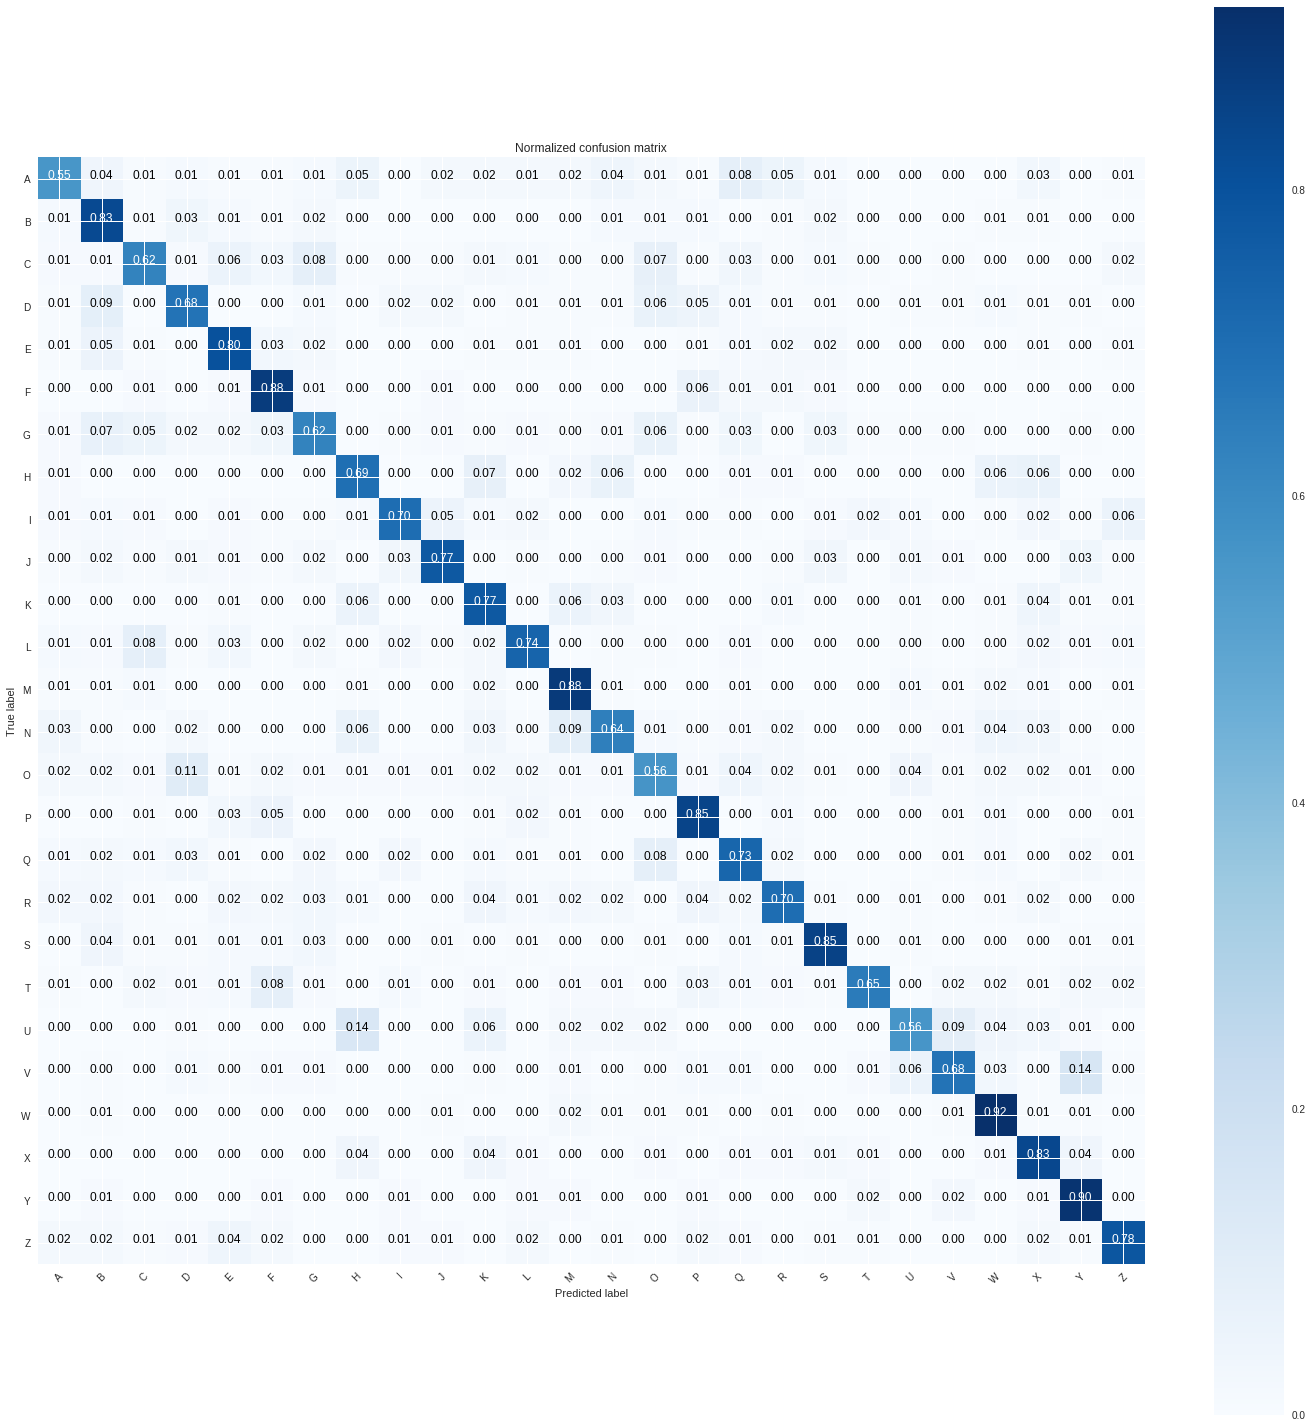

In [0]:
import itertools
plt.figure(figsize=(20, 20))
plot_confusion_matrix(cm, classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] ,normalize=True,
                      title='Normalized confusion matrix')

plt.show()